# Proyek Pertama : Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Alifia Mustika Sari
- Email: alifiamustika02@gmail.com
- ID Dicoding: alouvre

## Business Understanding

### **Latar Belakang**

Jaya Jaya Institut merupakan salah satu institusi pendidikan tinggi yang telah berdiri sejak tahun 2000. Selama lebih dari dua dekade, institusi ini telah meluluskan banyak mahasiswa berprestasi dan memiliki reputasi akademik yang sangat baik.

Namun demikian, seiring waktu, Jaya Jaya Institut menghadapi tantangan serius terkait tingginya angka mahasiswa yang tidak menyelesaikan studinya (dropout). Fenomena dropout ini tidak hanya berdampak pada citra institusi, tetapi juga berpengaruh pada efektivitas sistem pembelajaran, akreditasi program studi, dan efisiensi operasional.

Sebagai bentuk respons terhadap permasalahan tersebut, pihak manajemen institusi ingin mengambil langkah strategis untuk mengidentifikasi mahasiswa yang berisiko dropout sejak dini agar dapat diberikan intervensi dan bimbingan yang tepat sasaran.

### **Permasalahan Bisnis**

Bagaimana Jaya Jaya Institut dapat mengidentifikasi secara dini mahasiswa yang berisiko tinggi melakukan dropout, guna meningkatkan retensi dan kualitas pendidikan di lingkungan institusi?

Pertanyaan utama ini dapat diuraikan menjadi beberapa sub-permasalahan:
- Apa saja faktor utama yang berkontribusi terhadap keputusan mahasiswa untuk berhenti studi?
- Bagaimana karakteristik sosial, ekonomi, akademik, dan demografis memengaruhi kemungkinan mahasiswa melakukan dropout?
- Strategi pemantauan apa yang dapat digunakan untuk membantu pihak institusi dalam mengidentifikasi tren dropout secara visual dan informatif?
- Bagaimana model machine learning dapat digunakan untuk memprediksi risiko dropout mahasiswa secara akurat dan praktis?

### **Tujuan Proyek**

- Mengidentifikasi faktor-faktor utama yang berkontribusi terhadap risiko dropout mahasiswa di Jaya Jaya Institut.
- Menyediakan dashboard interaktif yang menampilkan tren dan indikator performa mahasiswa berdasarkan data historis.
- Mengembangkan model machine learning yang dapat memprediksi kemungkinan seorang mahasiswa mengalami dropout sejak dini.
- Memberikan rekomendasi tindakan (actionable insights) kepada pihak institusi berdasarkan hasil analisis dan prediksi.

### **Cakupan Proyek**

Untuk menjawab permasalahan di atas, proyek ini memiliki dua fokus utama:

- **📊 Pembuatan Business Dashboard**

  Dashboard ini akan menampilkan visualisasi faktor-faktor penting yang berhubungan dengan performa dan retensi mahasiswa. Visualisasi akan mencakup metrik seperti:
    - Distribusi nilai akademik,
    - Tingkat kehadiran,
    - Status pembayaran uang kuliah,
    - Kebutuhan khusus dalam pendidikan,
    - dan berbagai indikator sosio-demografis lainnya.

  Dashboard ini bertujuan untuk membantu pengelola akademik dan manajemen dalam mengawasi dan memahami kondisi mahasiswa secara lebih menyeluruh.

- **🤖 Pengembangan Model Machine Learning**

  Model prediktif akan dikembangkan menggunakan pendekatan machine learning untuk memprediksi kemungkinan mahasiswa mengalami dropout. Model ini bertujuan untuk:
    - Mengidentifikasi mahasiswa berisiko tinggi secara otomatis
    - Mendukung pengambilan keputusan dalam pemberian intervensi dini (bimbingan atau konseling),
    - Mengurangi tingkat dropout dalam jangka panjang.

  Prototipe dari sistem prediksi ini akan dikembangkan menggunakan Streamlit agar dapat digunakan langsung oleh pihak institusi, serta di-deploy pada Streamlit Community Cloud agar dapat diakses secara remote.

## **1. Persiapan Proyek**

### 1.1. Setup Environment

In [1]:
!pip install lazypredict
!pip install imbalanced-learn
!pip install pandas sqlalchemy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 9.6 MB/s eta 0:00:00


### 1.2. Menyiapkan Library

In [2]:
# ================================
# 🔗 Mount Google Drive & Navigasi
# ================================
from google.colab import drive
import os
import shutil
import joblib  # Untuk simpan/muat model
import pickle

# ================================
# ⚙️ Konfigurasi Umum & Reproducibility
# ================================
import pandas as pd
import numpy as np
import random
import warnings

# Supress warnings dan set seed
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

seed = 0
np.random.seed(seed)
random.seed(seed)

# ================================
# 📊 Visualisasi
# ================================
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# 🧠 Machine Learning & Preprocessing
# ================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Model & evaluasi
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# LazyPredict (jika ingin coba banyak model)
from lazypredict.Supervised import LazyClassifier

# Metrik evaluasi
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, accuracy_score,
    precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve
)

from imblearn.over_sampling import SMOTE

### 1.3. Menyiapkan Gdrive Proyek

In [3]:
# Mount Google Drive
drive.mount('/content/drive')

# Path tujuan proyek di Google Drive
target_path = '/content/drive/MyDrive/BPDS/Proyek_Akhir'

# Cek apakah path ada, lalu berpindah ke direktori tersebut
if os.path.exists(target_path):
    os.chdir(target_path)
    print(f"✅ Berhasil berpindah ke direktori: {os.getcwd()}")
else:
    print(f"❌ Path tidak ditemukan: {target_path}. Periksa kembali lokasi foldernya.")

Mounted at /content/drive
✅ Berhasil berpindah ke direktori: /content/drive/MyDrive/BPDS/Proyek_Akhir


### 1.4. Menyiapkan dan Memuat Dataset

Dataset diimpor ke dalam lingkungan kerja menggunakan pustaka Pandas dan disusun dalam format dataframe. Proses ini bertujuan untuk memastikan data dapat diakses dan diolah dengan lebih mudah dalam proses analisis selanjutnya.

In [4]:
pd.set_option('display.max_columns', None)

url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"

# Menyiapkan dataset dari GitHub Dicoding
df_student = pd.read_csv(
    url,
    sep=";",  # Specify the separator as semicolon
    encoding='utf-8-sig'  # Pakai utf-8-sig untuk menghilangkan karakter BOM
)


print("Jumlah data mahasiswa:", len(df_student.GDP))

Jumlah data mahasiswa: 4424


In [ ]:
df_student

Marital_status  Application_mode  Application_order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime_evening_attendance  Previous_qualification  \
0                              1                       1   
1                              1                       1   
2                              1                       1   
3                              1                       1   
4                              0                       1   
...                          ...                     ...   
4419                           1                       1   
4420                           1                       1   
4421                           1                       1   
4422                           1                       1   
4423                           1                       1   

      Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                           122.00            1                     19   
1                           160.00            1                      1   
2                           122.00            1                     37   
3                           122.00            1                     38   
4                           100.00            1                     37   
...                            ...          ...                    ...   
4419                        125.00            1                      1   
4420                        120.00          105                      1   
4421                        154.00            1                     37   
4422                        180.00            1                     37   
4423                        152.00           22                     38   

      Fathers_qualification  Mothers_occupation  Fathers_occupation  \
0                        12                   5                   9   
1                         3                   3                   3   
2                        37                   9                   9   
3                        37                   5                   3   
4                        38                   9                   9   
...                     ...                 ...                 ...   
4419                      1                   5                   4   
4420                      1                   9                   9   
4421                     37                   9                   9   
4422                     37                   7                   4   
4423                     37                   5                   9   

      Admission_grade  Displaced  Educational_special_needs  Debtor  \
0              127.30          1                          0       0   
1              142.50          1                          0       0   
2              124.80          1                          0       0   
3              119.60          1                          0       0   
4              141.50          0                          0       0   
...               ...        ...                        ...     ...   
4419           122.20          0                          0       0   
4420           119.00          1                          0       1   
4421           149.50          1                          0       0   
4422

## **2. Data Understanding**

### 2.1. Karakteristik Dataset

>Dataset ini dibuat oleh sebuah institusi pendidikan tinggi, dikumpulkan dari beberapa basis data yang terpisah, dan berkaitan dengan mahasiswa yang terdaftar dalam berbagai program sarjana seperti agronomi, desain, pendidikan, keperawatan, jurnalisme, manajemen, pelayanan sosial, dan teknologi.

Dataset berisi `4424 entri` dengan `37 kolom` yang mencakup berbagai  informasi yang diketahui pada saat mahasiswa mendaftar, seperti riwayat akademik, data demografis, dan faktor sosial-ekonomi. Selain itu, juga terdapat data mengenai performa akademik mahasiswa pada akhir semester pertama dan kedua. Data ini digunakan untuk membangun model klasifikasi guna memprediksi kemungkinan mahasiswa akan dropout (berhenti kuliah) atau berhasil secara akademik (misalnya, lulus). Berikut adalah rincian setiap kolom:

| Column Name                            | Description                                    | Data Type   | Label Mapping                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| -------------------------------------- | ---------------------------------------------- | ----------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| Marital status                         | Status pernikahan mahasiswa.                   | Kategorikal | 1 – lajang; 2 – menikah; 3 – duda/janda; 4 – bercerai; 5 – hidup bersama tanpa menikah; 6 – pisah secara hukum                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| Application mode                       | Jalur pendaftaran mahasiswa.                   | Kategorikal | 1 – Fase 1 - kontingen umum; 2 – Peraturan No. 612/93; 5 – Fase 1 - kontingen khusus (Azores); 7 – Pemegang gelar lain; 10 – Peraturan No. 854-B/99; 15 – Mahasiswa internasional (S1); 16 – Kontingen khusus Madeira; 17 – Fase 2 - umum; 18 – Fase 3 - umum; 26 – Peraturan No. 533-A/99, butir b2); 27 – Peraturan No. 533-A/99, butir b3); 39 – Usia > 23 tahun; 42 – Pindahan; 43 – Ganti jurusan; 44 – Pemegang diploma teknis; 51 – Pindah institusi/jurusan; 53 – Pemegang diploma pendek; 57 – Pindah institusi/jurusan (Internasional) |
| Application order                      | Urutan pilihan saat pendaftaran.               | Numerik     | 0 = pilihan pertama, hingga 9 = pilihan terakhir                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Course                                 | Program studi yang diambil.                    | Kategorikal | 33 – Teknologi Biofuel; 171 – Desain Animasi & Multimedia; 8014 – Pelayanan Sosial (kelas malam); 9003 – Agronomi; 9070 – Desain Komunikasi; 9085 – Keperawatan Hewan; 9119 – Teknik Informatika; 9130 – Equinculture; 9147 – Manajemen; 9238 – Pelayanan Sosial; 9254 – Pariwisata; 9500 – Keperawatan; 9556 – Kebersihan Mulut; 9670 – Manajemen Periklanan dan Pemasaran; 9773 – Jurnalisme dan Komunikasi; 9853 – Pendidikan Dasar; 9991 – Manajemen (kelas malam)                                                                           |
| Daytime/evening attendance             | Waktu kuliah.                                  | Kategorikal | 1 – Siang; 0 – Malam                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| Previous qualification                 | Pendidikan terakhir sebelum masuk kuliah.      | Kategorikal | 1 – SMA; 2 – Sarjana Muda; 3 – Gelar diploma; 4 – Magister; 5 – Doktor; 6 – Sedang kuliah; 9, 10, 12, 14, 15, 19, 38, 39, 40, 42, 43 – berbagai jenjang pendidikan lain                                                                                                                                                                                                                                                                                                                                                                          |
| Previous qualification (grade)         | Nilai dari pendidikan sebelumnya.              | Numerik     | Skala 0–200                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| Nacionality                            | Kewarganegaraan mahasiswa.                     | Kategorikal | 1 – Portugis; 2 – Jerman; 6 – Spanyol; 11 – Italia; 13 – Belanda; 14 – Inggris; 17 – Lithuania; 21 – Angola; 22 – Tanjung Verde; 24 – Guinea; 25 – Mozambik; 26 – São Tomé dan Príncipe; 32 – Turki; 41 – Brasil; 62 – Rumania; 100 – Moldova; 101 – Meksiko; 103 – Ukraina; 105 – Rusia; 108 – Kuba; 109 – Kolombia                                                                                                                                                                                                                             |
| Mother's qualification                 | Pendidikan terakhir ibu.                       | Kategorikal | 1 – SMA (kelas 12) atau sederajat; 2 – Sarjana Muda; 3 – Gelar diploma; …; 44 – Doktor (siklus ke-3)                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| Father's qualification                 | Pendidikan terakhir ayah.                      | Kategorikal | Sama seperti ibu (kode dan deskripsi sesuai file)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Mother's occupation                    | Pekerjaan ibu.                                 | Kategorikal | 0 – Pelajar; 1 – Eksekutif; 2 – Spesialis IPTEK; …; 194 – Asisten dapur                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| Father's occupation                    | Pekerjaan ayah.                                | Kategorikal | 0 – Pelajar; 1 – Eksekutif; 2 – Spesialis IPTEK; …; 195 – Pedagang kaki lima                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| Admission grade                        | Nilai masuk perguruan tinggi.                  | Numerik     | Skala 0–200                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| Displaced                              | Apakah mahasiswa berasal dari luar daerah.     | Kategorikal | 1 – Ya; 0 – Tidak                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Educational special needs              | Apakah mahasiswa memiliki kebutuhan khusus.    | Kategorikal | 1 – Ya; 0 – Tidak                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Debtor                                 | Apakah mahasiswa memiliki tunggakan.           | Kategorikal | 1 – Ya; 0 – Tidak                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Tuition fees up to date                | Status pembayaran uang kuliah.                 | Kategorikal | 1 – Sudah lunas; 0 – Belum                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| Gender                                 | Jenis kelamin mahasiswa.                       | Kategorikal | 1 – Laki-laki; 0 – Perempuan                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| Scholarship holder                     | Penerima beasiswa atau bukan.                  | Kategorikal | 1 – Ya; 0 – Tidak                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Age at enrollment                      | Usia saat mendaftar.                           | Numerik     | –                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| International                          | Mahasiswa internasional atau tidak.            | Kategorikal | 1 – Ya; 0 – Tidak                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Curricular units 1st sem (credited)    | Jumlah mata kuliah dikonversi pada semester 1. | Numerik     | –                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Curricular units 1st sem (enrolled)    | Mata kuliah yang diambil semester 1.           | Numerik     | –                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Curricular units 1st sem (evaluations) | Mata kuliah yang dievaluasi semester 1.        | Numerik     | –                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Curricular units 1st sem (approved)    | Mata kuliah yang lulus semester 1.             | Numerik     | –                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Curricular units 2st sem (credited)    | Jumlah mata kuliah dikonversi pada semester 2. | Numerik     | –                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Curricular units 2st sem (enrolled)    | Mata kuliah yang diambil semester 2.           | Numerik     | –                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Curricular units 2st sem (evaluations) | Mata kuliah yang dievaluasi semester 2.        | Numerik     | –                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Curricular units 2st sem (approved)    | Mata kuliah yang lulus semester 2.             | Numerik     | –                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |


### 2.2. Data Assessing

#### a. Menilai Data

In [ ]:
# Menampilkan ringkasan informasi dari dataset
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [ ]:
df_student.describe(include="all")

Marital_status  Application_mode  Application_order       Course  \
count      4424.000000       4424.000000        4424.000000  4424.000000   
unique             NaN               NaN                NaN          NaN   
top                NaN               NaN                NaN          NaN   
freq               NaN               NaN                NaN          NaN   
mean          1.178571         18.669078           1.727848  8856.642631   
std           0.605747         17.484682           1.313793  2063.566416   
min           1.000000          1.000000           0.000000    33.000000   
25%           1.000000          1.000000           1.000000  9085.000000   
50%           1.000000         17.000000           1.000000  9238.000000   
75%           1.000000         39.000000           2.000000  9556.000000   
max           6.000000         57.000000           9.000000  9991.000000   

        Daytime_evening_attendance  Previous_qualification  \
count                  4424.000000             4424.000000   
unique                         NaN                     NaN   
top                            NaN                     NaN   
freq                           NaN                     NaN   
mean                      0.890823                4.577758   
std                       0.311897               10.216592   
min                       0.000000                1.000000   
25%                       1.000000                1.000000   
50%                       1.000000                1.000000   
75%                       1.000000                1.000000   
max                       1.000000               43.000000   

        Previous_qualification_grade  Nacionality  Mothers_qualification  \
count                    4424.000000  4424.000000            4424.000000   
unique                           NaN          NaN                    NaN   
top                              NaN          NaN                    NaN   
freq                             NaN          NaN                    NaN   
mean                      132.613314     1.873192              19.561935   
std                        13.188332     6.914514              15.603186   
min                        95.000000     1.000000               1.000000   
25%                       125.000000     1.000000               2.000000   
50%                       133.100000     1.000000              19.000000   
75%                       140.000000     1.000000              37.000000   
max                       190.000000   109.000000              44.000000   

        Fathers_qualification  Mothers_occupation  Fathers_occupation  \
count             4424.000000         4424.000000         4424.000000   
unique                    NaN                 NaN                 NaN   
top                       NaN                 NaN                 NaN   
freq                      NaN                 NaN                 NaN   
mean                22.275316           10.960895           11.032324   
std                 15.343108           26.418253           25.263040   
min                  1.000000            0.000000            0.000000   
25%                  3.000000            4.000000            4.000000   
50%                 19.000000            5.000000            7.000000   
75%                 37.000000            9.000000            9.000000   
max                 44.000000          194.000000          195.000000   

        Admission_grade    Displaced  Educational_special_needs       Debtor  \
count       4424.000000  4424.000000                4424.000000  4424.000000   
unique              NaN          NaN                        NaN          NaN   
top                 NaN          NaN                        NaN          NaN   
freq                NaN          NaN                        NaN          NaN   
mean         126.978119     0.548373                   0.011528     0.113698   
std           14.482001     0.497711                   0.106760     0.317480   


In [ ]:
df_student.shape

(4424, 37)

Dari eksekusi method `df_student.shape` Terlihat:

| JUMLAH BARIS AWAL | JUMLAH KOLOM AWAL |
| ------ | ------ |
| 4424 | 37 |

<br>

#### b. Cek Nilai Unik

In [ ]:
for fitur in df_student:
  if df_student[fitur].dtype == "float":
    print(f"Nilai Unik dalam fitur `{fitur}`:")
    print(df_student[fitur].unique(),"\n")

Nilai Unik dalam fitur `Previous_qualification_grade`:
[122.  160.  100.  133.1 142.  119.  137.  138.  139.  136.  133.  110.
 149.  127.  135.  140.  125.  126.  151.  115.  150.  143.  130.  120.
 103.  154.  132.  167.  129.  141.  116.  148.  118.  106.  121.  114.
 124.  123.  113.  111.  131.  158.  146.  117.  153.  178.   99.  134.
 128.  170.  155.  145.  152.  112.  107.  156.  188.   96.  161.  166.
 147.  144.  102.  101.  180.  172.  105.  108.  165.  190.  162.  164.
 163.  159.  117.4 175.  133.8 176.  168.  139.3  97.  157.  140.8 184.4
 148.9 109.  174.  182.  138.6  95.  154.4 163.3 145.7 123.9 124.4 169.
 177.  138.7 119.1 118.9 126.6] 

Nilai Unik dalam fitur `Admission_grade`:
[127.3 142.5 124.8 119.6 141.5 114.8 128.4 113.1 129.3 123.  130.6 119.3
 130.2 111.8 137.1 120.7 137.4 136.3 124.6 120.3 121.8 125.5 114.9 123.9
 157.  116.4 131.  122.1 118.8 150.  130.  138.8 134.5 131.4 102.5 128.8
 122.9 113.9 120.  121.1 120.4 100.6 121.4 109.7 134.1 127.6 132.4 133.4


In [ ]:
for fitur in df_student:
  if df_student[fitur].dtype == "object":
    print(f"Nilai Unik dalam fitur `{fitur}`:")
    print(df_student[fitur].unique(),"\n")

Nilai Unik dalam fitur `Status`:
['Dropout' 'Graduate' 'Enrolled'] 



In [ ]:
for fitur in df_student:
  if df_student[fitur].dtype == "int":
    print(f"Nilai Unik dalam fitur `{fitur}`:")
    print(df_student[fitur].unique(),"\n")

Nilai Unik dalam fitur `Marital_status`:
[1 2 4 3 5 6] 

Nilai Unik dalam fitur `Application_mode`:
[17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27] 

Nilai Unik dalam fitur `Application_order`:
[5 1 2 4 3 6 9 0] 

Nilai Unik dalam fitur `Course`:
[ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119] 

Nilai Unik dalam fitur `Daytime_evening_attendance`:
[1 0] 

Nilai Unik dalam fitur `Previous_qualification`:
[ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14] 

Nilai Unik dalam fitur `Nacionality`:
[  1  62   6  41  26 103  13  25  21 101  11  22  32 100  24 109   2 108
 105  14  17] 

Nilai Unik dalam fitur `Mothers_qualification`:
[19  1 37 38  3  4 42  2 34 12 40  9  5 39 11 41 30 14 35 36  6 10 29 43
 18 22 27 26 44] 

Nilai Unik dalam fitur `Fathers_qualification`:
[12  3 37 38  1 19  5  4 34  2 39 11  9 36 26 40 14 20 35 41 22 13 29 43
 18 42 10  6 30 25 44 33 27 31] 

Nilai Unik dalam fitur `Mothers_occupation`:
[  5   3   9   7   4   

#### c. Cek Duplikasi Data

In [ ]:
# Cek duplikat
duplicate_student_data = df_student.duplicated().sum()

print("Jumlah data duplikat: ", duplicate_student_data)

Jumlah data duplikat:  0


Berdasarkan hasil pengecekan duplikasi dataframe `df_student`, dapat dilihat bahwa tidak terdapat duplikasi dataframe `df_student` yang berarti semua data bersifat unik.

#### d. Cek Missing Values

In [ ]:
# Memeriksa jumlah nilai yang hilang di setiap kolom:
print("Nissing values pada data.csv:")
print((df_student.isnull().sum()))

Nissing values pada data.csv:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment   

Dapat disimpulkan bahwa dataframe `df_student` tidak memiliki nilai yang hilang. Hal ini menunjukkan bahwa data yang tersedia tidak perlu dilakukan imputasi atau pembersihan tambahan terkait missing values.

#### e. Cek Outlier

Outlier dapat memengaruhi model secara negatif, terutama model yang berbasis jarak atau rata-rata. Perlunya memahami distribusi dari fitur numerik untuk mendeteksi adanya nilai ekstrim (outlier).

Untuk itu, dilakukan visualisasi `boplot` pada setiap fitur numerik menggunakan fungsi `plot_numeric_boxplots(df_student)`.

In [ ]:
def plot_numeric_boxplots(df, figsize_base=(12, 4)):
    """
    Menampilkan boxplot untuk semua fitur numerik dalam DataFrame.

    Parameters:
        df (DataFrame): DataFrame yang berisi data numerik.
        figsize_base (tuple): Ukuran dasar figure (lebar, tinggi per plot).
    """
    # Custom palette
    custom_palette = sns.color_palette("YlOrBr", 3)  # Ambil 3 warna

    # Ambil hanya kolom numerik
    numeric_cols = df.select_dtypes(include=['number']).columns
    n_cols = len(numeric_cols)

    # Set ukuran figure
    plt.figure(figsize=(figsize_base[0], figsize_base[1] * n_cols))

    # Plot boxplot untuk setiap kolom numerik
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_cols, 1, i)
        sns.boxplot(x=df[col], color=custom_palette[1])
        plt.title(f'Boxplot: {col}')
        plt.xlabel(col)
        plt.grid(axis='x', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

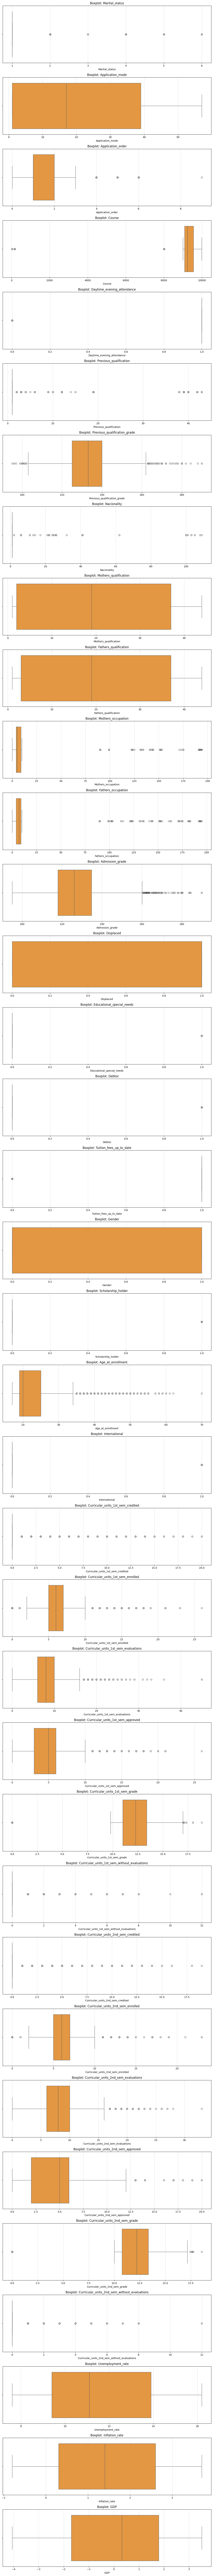

In [ ]:
plot_numeric_boxplots(df_student)

#### f. Menyimpan Data Asli

Data mahasiswa yang digunakan dalam proyek ini diambil dari platform GitHub, yang menyediakan dataset berisi informasi akademik, sosial, ekonomi, dan demografis mahasiswa untuk keperluan analisis performa studi dan prediksi dropout.

In [ ]:
os.makedirs("data", exist_ok=True)

df_student.to_csv("data/data_student.csv", index=False)

Dengan menyimpan file sebagai `data_student.csv`, dapat dipastikan bahwa data mentah (raw data) terdokumentasi dan tidak langsung diubah, sehingga bisa digunakan sebagai referensi dasar sebelum dilakukan proses `Exploratory Data Analysis (EDA)`, `pembuatan dashboard`, `preprocessing`, maupun `pelatihan model machine learning`. Langkah ini juga mendukung reproducibility dan manajemen data yang lebih baik selama siklus pengembangan proyek.

## **3. Exploratory Data Analysis**

In [ ]:
df_student_eda = df_student.copy()

#### 3.1. Mempersiapkan Data Sebelum Dianalisis

In [ ]:
df_student_eda = df_student_eda.rename(columns = {
        'Nacionality': 'Nationality',
        # 'Daytime_evening_attendance':'Attendance_time',
    })

In [ ]:
# Helper function untuk mengganti nilai numerik dengan label deskriptif
def replace_values(column, replacement_dict):
    return df_student_eda[column].replace(replacement_dict)

# Daftar kolom yang memerlukan konversi dan dictionary untuk mengganti nilainya
replacement_mappings = {
    'Marital_status': {
        1: 'Single',
        2: 'Married',
        3: 'Widower',
        4: 'Divorced',
        5: 'Facto Union',
        6: 'Legally Separated'
    },
    'Application_mode' : {
        1: '1st Phase - General Contingent',
        2: 'Ordinance No. 612/93',
        5: '1st Phase - Special Contingent (Azores Island)',
        7: 'Holders of Other Higher Courses',
        10: 'Ordinance No. 854-B/99',
        15: 'International Student (Bachelor)',
        16: '1st Phase - Special Contingent (Madeira Island)',
        17: '2nd Phase - General Contingent',
        18: '3rd Phase - General Contingent',
        26: 'Ordinance No. 533-A/99, Item B2 (Different Plan)',
        27: 'Ordinance No. 533-A/99, Item B3 (Other Institution)',
        39: 'Over 23 Years Old',
        42: 'Transfer',
        43: 'Change of Course',
        44: 'Technological Specialization Diploma Holders',
        51: 'Change of Institution/Course',
        53: 'Short Cycle Diploma Holders',
        57: 'Change of Institution/Course (International)'
    },
    'Course': {
        33: 'Biofuel Production Technologies',
        171: 'Animation and Multimedia Design',
        8014: 'Social Service (evening attendance)',
        9003: 'Agronomy',
        9070: 'Communication Design',
        9085: 'Veterinary Nursing',
        9119: 'Informatics Engineering',
        9130: 'Equinculture',
        9147: 'Management',
        9238: 'Social Service',
        9254: 'Tourism',
        9500: 'Nursing',
        9556: 'Oral Hygiene',
        9670: 'Advertising and Marketing Management',
        9773: 'Journalism and Communication',
        9853: 'Basic Education',
        9991: 'Management (evening attendance)'
    },
    'Nationality': {
        1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian', 13: 'Dutch',
        14: 'English', 17: 'Lithuanian', 21: 'Angolan', 22: 'Cape Verdean',
        24: 'Guinean', 25: 'Mozambican', 26: 'Santomean', 32: 'Turkish',
        41: 'Brazilian', 62: 'Romanian', 100: 'Moldova (Republic of)',
        101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban',
        109: 'Colombian'
    },
    'Previous_qualification': {
          1: 'Secondary Education - 12th Year of Schooling or Eq.',
          2: "Higher Education - Bachelor's Degree",
          3: 'Higher Education - Degree',
          4: "Higher Education - Master's",
          5: 'Higher Education - Doctorate',
          6: 'Frequency of Higher Education',
          9: '12th Year of Schooling - Not Completed',
          10: '11th Year of Schooling - Not Completed',
          11: '7th Year (Old)',
          12: 'Other - 11th Year of Schooling',
          13: '2nd Year Complementary High School Course',
          14: '10th Year of Schooling',
          15: '10th Year of Schooling - Not Completed',
          18: 'General Commerce Course',
          19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
          20: 'Complementary High School Course',
          22: 'Technical - Professional Course',
          25: 'Complementary High School Course - Not Concluded',
          26: '7th Year of Schooling',
          27: '2nd Cycle of the General High School Course',
          29: '9th Year of Schooling - Not Completed',
          30: '8th Year of Schooling',
          31: 'General Course of Administration and Commerce',
          33: 'Supplementary Accounting and Administration',
          34: 'Unknown',
          35: "Can't Read or Write",
          36: 'Can Read Without Having a 4th Year of Schooling',
          37: 'Basic Education 1st Cycle (4th/5th Year) or Equiv.',
          38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
          39: 'Technological Specialization Course',
          40: 'Higher Education - Degree (1st Cycle)',
          41: 'Specialized Higher Studies Course',
          42: 'Professional Higher Technical Course',
          43: 'Higher Education - Master (2nd Cycle)',
          44: 'Higher Education - Doctorate (3rd Cycle)'
    },
    'Mothers_qualification': {
        1: 'Secondary Education - 12th Year of Schooling or Eq.',
        2: 'Higher Education - Bachelor\'s Degree',
        3: 'Higher Education - Degree',
        4: 'Higher Education - Master\'s',
        5: 'Higher Education - Doctorate',
        6: 'Frequency of Higher Education',
        9: '12th Year of Schooling - Not Completed',
        10: '11th Year of Schooling - Not Completed',
        11: '7th Year (Old)',
        12: 'Other - 11th Year of Schooling',
        14: '10th Year of Schooling',
        18: 'General commerce course',
        19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
        22: 'Technical-professional course',
        26: '7th year of schooling',
        27: '2nd cycle of the general high school course',
        29: '9th Year of Schooling - Not Completed',
        30: '8th year of schooling',
        34: 'Unknown',
        35: 'Can\'t read or write',
        36: 'Can read without having a 4th year of schooling',
        37: 'Basic education 1st cycle (4th/5th year) or equiv.',
        38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
        39: 'Technological specialization course',
        40: 'Higher education - degree (1st cycle)',
        41: 'Specialized higher studies course',
        42: 'Professional higher technical course',
        43: 'Higher Education - Master (2nd cycle)',
        44: 'Higher Education - Doctorate (3rd cycle)'
    },
    'Mothers_occupation': {
        0: 'Student', 1: 'Legislative Power and Executive Bodies',
        2: 'Specialists in Intellectual and Scientific Activities',
        3: 'Intermediate Level Technicians and Professions',
        4: 'Administrative staff',
        5: 'Personal Services, Security and Safety Workers and Sellers',
        6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
        7: 'Skilled Workers in Industry, Construction and Craftsmen',
        8: 'Installation and Machine Operators and Assembly Workers',
        9: 'Unskilled Workers',
        10: 'Armed Forces Professions',
        90: 'Other Situation',
        99: '(blank)',
        122: 'Health professionals',
        123: 'Teachers',
        125: 'Specialists in ICT',
        131: 'Intermediate level science and engineering technicians',
        132: 'Intermediate level technicians of health',
        134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
        141: 'Office workers, secretaries and data processing operators',
        143: 'Data, accounting, statistical, financial services and registry-related operators',
        144: 'Other administrative support staff',
        151: 'Personal service workers',
        152: 'Sellers',
        153: 'Personal care workers and the like',
        171: 'Skilled construction workers, except electricians',
        173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans',
        175: 'Workers in food processing, woodworking, clothing and other industries',
        191: 'Cleaning workers',
        192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
        193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
        194: 'Meal preparation assistants'
    },
    'Fathers_qualification': {
        1: 'Secondary Education - 12th Year of Schooling or Eq.',
        2: 'Higher Education - Bachelor\'s Degree',
        3: 'Higher Education - Degree',
        4: 'Higher Education - Master\'s',
        5: 'Higher Education - Doctorate',
        6: 'Frequency of Higher Education',
        9: '12th Year of Schooling - Not Completed',
        10: '11th Year of Schooling - Not Completed',
        11: '7th Year (Old)',
        12: 'Other - 11th Year of Schooling',
        13: '2nd year complementary high school course',
        14: '10th Year of Schooling',
        18: 'General commerce course',
        19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
        20: 'Complementary High School Course',
        22: 'Technical-professional course',
        25: 'Complementary High School Course - not concluded',
        26: '7th year of schooling',
        27: '2nd cycle of the general high school course',
        29: '9th Year of Schooling - Not Completed',
        30: '8th year of schooling',
        31: 'General Course of Administration and Commerce',
        33: 'Supplementary Accounting and Administration',
        34: 'Unknown',
        35: 'Can\'t read or write',
        36: 'Can read without having a 4th year of schooling',
        37: 'Basic education 1st cycle (4th/5th year) or equiv.',
        38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
        39: 'Technological specialization course',
        40: 'Higher education - degree (1st cycle)',
        41: 'Specialized higher studies course',
        42: 'Professional higher technical course',
        43: 'Higher Education - Master (2nd cycle)',
        44: 'Higher Education - Doctorate (3rd cycle)'
    },
    'Fathers_occupation': {
        0: 'Student',
        1: 'Legislative Power and Executive Bodies',
        2: 'Specialists in Intellectual and Scientific Activities',
        3: 'Intermediate Level Technicians and Professions',
        4: 'Administrative staff',
        5: 'Personal Services, Security and Safety Workers and Sellers',
        6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
        7: 'Skilled Workers in Industry, Construction and Craftsmen',
        8: 'Installation and Machine Operators and Assembly Workers',
        9: 'Unskilled Workers',
        10: 'Armed Forces Professions',
        90: 'Other Situation',
        99: '(blank)',
        101: 'Armed Forces Officers',
        102: 'Armed Forces Sergeants',
        103: 'Other Armed Forces personnel',
        112: 'Directors of administrative and commercial services',
        114: 'Hotel, catering, trade and other services directors',
        121: 'Specialists in the physical sciences, mathematics, engineering and related techniques',
        122: 'Health professionals',
        123: 'Teachers',
        124: 'Specialists in finance, accounting, administrative organization, public and commercial relations',
        131: 'Intermediate level science and engineering technicians and professions',
        132: 'Intermediate level technicians of health',
        134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
        135: 'Information and communication technology technicians',
        141: 'Office workers, secretaries in general and data processing operators',
        143: 'Data, accounting, statistical, financial services and registry-related operators',
        144: 'Other administrative support staff',
        151: 'Personal service workers',
        152: 'Sellers',
        153: 'Personal care workers and the like',
        154: 'Protection and security services personnel',
        161: 'Market-oriented farmers and skilled agricultural and animal production workers',
        163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence',
        171: 'Skilled construction workers and the like, except electricians',
        172: 'Skilled workers in metallurgy, metalworking and similar',
        174: 'Skilled workers in electricity and electronics',
        175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
        181: 'Fixed plant and machine operators',
        182: 'Assembly workers',
        183: 'Vehicle drivers and mobile equipment operators',
        192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
        193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
        194: 'Meal preparation assistants',
        195: 'Street vendors (except food) and street service providers'
    },
    'Daytime_evening_attendance': {
        0: 'Evening',
        1: 'Daytime'
    },
    'Gender': {
        1: 'Male',
        0: 'Female'
    },
    'Scholarship_holder': {
        1: 'Yes',
        0: 'No'
    },
    'Displaced': {
        1: 'Yes',
        0: 'No'
    },
    'International': {
        1: 'Yes',
        0: 'No'
    }
}

# Terapkan fungsi replace_values pada kolom-kolom yang relevan
for col, mapping in replacement_mappings.items():
    df_student_eda[col] = replace_values(col, mapping)

# Daftar kolom numerik yang sebenarnya bersifat kategorikal
categorical_columns = ['Marital_status', 'Course', 'Nationality', 'Previous_qualification', 'Mothers_qualification',
                       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
                       'Gender', 'Scholarship_holder', 'International']

# Ubah kolom-kolom tersebut menjadi tipe data 'category'
for col in categorical_columns:
    df_student_eda[col] = df_student_eda[col].astype('category')

In [ ]:
df_student_eda

Marital_status                  Application_mode  Application_order  \
0            Single    2nd Phase - General Contingent                  5   
1            Single  International Student (Bachelor)                  1   
2            Single    1st Phase - General Contingent                  5   
3            Single    2nd Phase - General Contingent                  2   
4           Married                 Over 23 Years Old                  1   
...             ...                               ...                ...   
4419         Single    1st Phase - General Contingent                  6   
4420         Single    1st Phase - General Contingent                  2   
4421         Single    1st Phase - General Contingent                  1   
4422         Single    1st Phase - General Contingent                  1   
4423         Single            Ordinance No. 854-B/99                  1   

                                   Course Daytime_evening_attendance  \
0         Animation and Multimedia Design                    Daytime   
1                                 Tourism                    Daytime   
2                    Communication Design                    Daytime   
3            Journalism and Communication                    Daytime   
4     Social Service (evening attendance)                    Evening   
...                                   ...                        ...   
4419         Journalism and Communication                    Daytime   
4420         Journalism and Communication                    Daytime   
4421                              Nursing                    Daytime   
4422                           Management                    Daytime   
4423         Journalism and Communication                    Daytime   

                                 Previous_qualification  \
0     Secondary Education - 12th Year of Schooling o...   
1     Secondary Education - 12th Year of Schooling o...   
2     Secondary Education - 12th Year of Schooling o...   
3     Secondary Education - 12th Year of Schooling o...   
4     Secondary Education - 12th Year of Schooling o...   
...                                                 ...   
4419  Secondary Education - 12th Year of Schooling o...   
4420  Secondary Education - 12th Year of Schooling o...   
4421  Secondary Education - 12th Year of Schooling o...   
4422  Secondary Education - 12th Year of Schooling o...   
4423  Secondary Education - 12th Year of Schooling o...   

      Previous_qualification_grade   Nationality  \
0                            122.0    Portuguese   
1                            160.0    Portuguese   
2                            122.0    Portuguese   
3                            122.0    Portuguese   
4                            100.0    Portuguese   
...                            ...           ...   
4419                         125.0    Portuguese   
4420                         120.0       Russian   
4421                         154.0    Portuguese   
4422                         180.0    Portuguese   
4423                         152.0  Cape Verdean   

                                  Mothers_qualification  \
0     Basic Education 3rd Cycle (9th/10th/11th Year)...   
1     Secondary Education - 12th Year of Schooling o...   
2     Basic education 1st cycle (4th/5th year) or eq...   
3     Basic Education 2nd Cycle (6th/7th/8th Year) o...   
4     Basic education 1st cycle (4th/5th year) or eq...   
...                                                 ...   
4419  Secondary Education - 12th Year of Schooling o...   
4420  Secondary Education - 12th Year of Schooling o...   
4421  Basic education 1st cycle (4th/5th year) or eq...   
4422  Basic education 1st cycle (4th/5th year) or eq...   
4423  Basic Education 2nd Cycle (6th/7th/8th Year) o...   

                                  Fathers_qualification  \
0                        Other - 11th Year of Schooling   
1                             Higher Education - Degree   
2     B

### **3.2. Univariate Analysis**

In [ ]:
def plot_kategori(df, feature, warna='purple', palette=None):
    """
    Menampilkan jumlah dan persentase kategori serta plot batang dari suatu kolom kategorikal.

    Parameters:
    df (DataFrame): DataFrame yang berisi data.
    feature (str): Nama kolom kategorikal.
    warna (str): Warna tunggal untuk bar chart (jika palette tidak digunakan).
    palette (str or list): Nama palette seaborn atau list warna untuk digunakan.
    """
    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)
    df_summary = pd.DataFrame({
        'Jumlah Sampel': count,
        'Persentase (%)': percent.round(1)
    })

    print(f"\nRingkasan untuk kolom: {feature}")
    print(df_summary)
    print("\n")

    print("Visualisasi:")
    plt.figure(figsize=(8, 6))
    kategori = count.index
    jumlah = count.values

    # Gunakan seaborn untuk barplot agar bisa menggunakan palette
    sns.barplot(x=kategori, y=jumlah, palette=palette if palette else [warna]*len(kategori))

    plt.title(f"Distribusi {feature}")
    plt.ylabel("Jumlah")
    plt.xticks(rotation=45)

    # Tambahkan nilai di atas batang
    for i, val in enumerate(jumlah):
        plt.text(i, val + max(jumlah)*0.01, str(val), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_histogram_semua_kolom(df, bins=50, figsize=(12, 25), color='purple'):
    """
    Menampilkan histogram dari semua kolom numerik di dalam dataframe menggunakan seaborn.histplot.

    Parameters:
    df (DataFrame): DataFrame yang akan diplot.
    bins (int): Jumlah bin pada histogram.
    figsize (tuple): Ukuran figure.
    color (str): Warna histogram.
    """
    numeric_cols = df.select_dtypes(include=['number']).columns
    n_cols = len(numeric_cols)
    n_rows = (n_cols + 2) // 3  # 3 kolom per baris

    plt.figure(figsize=figsize)
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_rows, 3, i)
        sns.histplot(df[col], bins=bins, kde=True, color=color)
        plt.title(f'Histogram: {col}')
        plt.xlabel(col)
        plt.ylabel('Frekuensi')
        plt.tight_layout()
    plt.show()

#### **a. Analisis Variabel Target (Status)**


Ringkasan untuk kolom: Status
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9


Visualisasi:


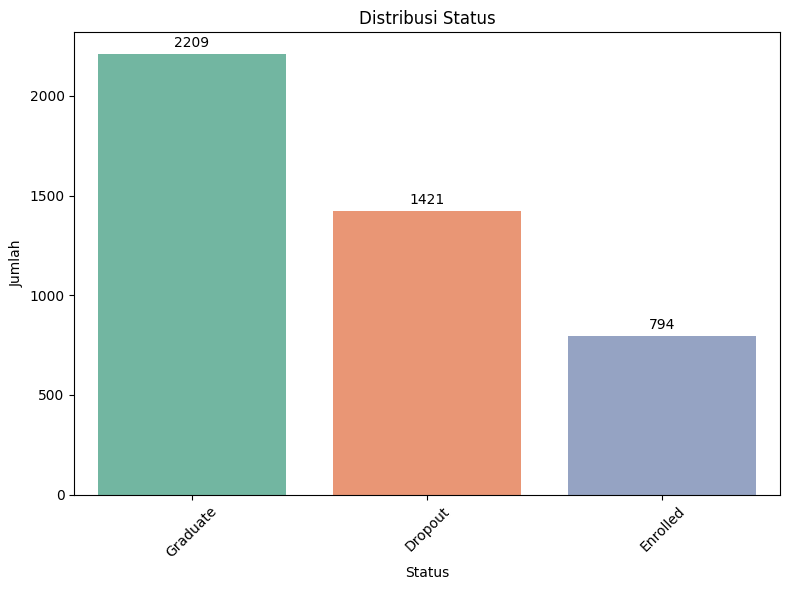

In [ ]:
plot_kategori(df_student_eda, 'Status', palette='Set2')

In [ ]:
# Menggabungkan Enrolled dan Graduate menjadi Not Dropout
df_student_eda['Status_Binary'] = df_student_eda['Status'].replace({
    'Dropout': 0,
    'Enrolled': 1,
    'Graduate': 1  # Enrolled dan Graduate digabung sebagai "Not Dropout"
})

In [ ]:
df_student_eda.Status_Binary.value_counts()

Status_Binary
1    3003
0    1421
Name: count, dtype: int64

🧠 **Insight**:
- **Masalah Mahasiswa Dropout**: Sekitar 1 per 3 mahasiswa mengalami dropout (putus kuliah), yaitu 32.1%, yang cukup tinggi dan sejalan dengan latar belakang masalah.
- **Mayoritas Mahasiswa Lulus**: Sebagian besar mahasiswa berhasil lulus (49.9%), ini bisa jadi indikator bahwa model yang baik dapat membantu meningkatkan angka kelulusan lebih lanjut.
- **Mahasiswa Aktif (Enrolled)**: Sekitar 17.9% mahasiswa masih aktif. Ini kelompok yang bisa diawasi lebih dekat karena bisa berubah menjadi lulus atau dropout.

#### **b. Distribusi Semua Fitur Numerik**

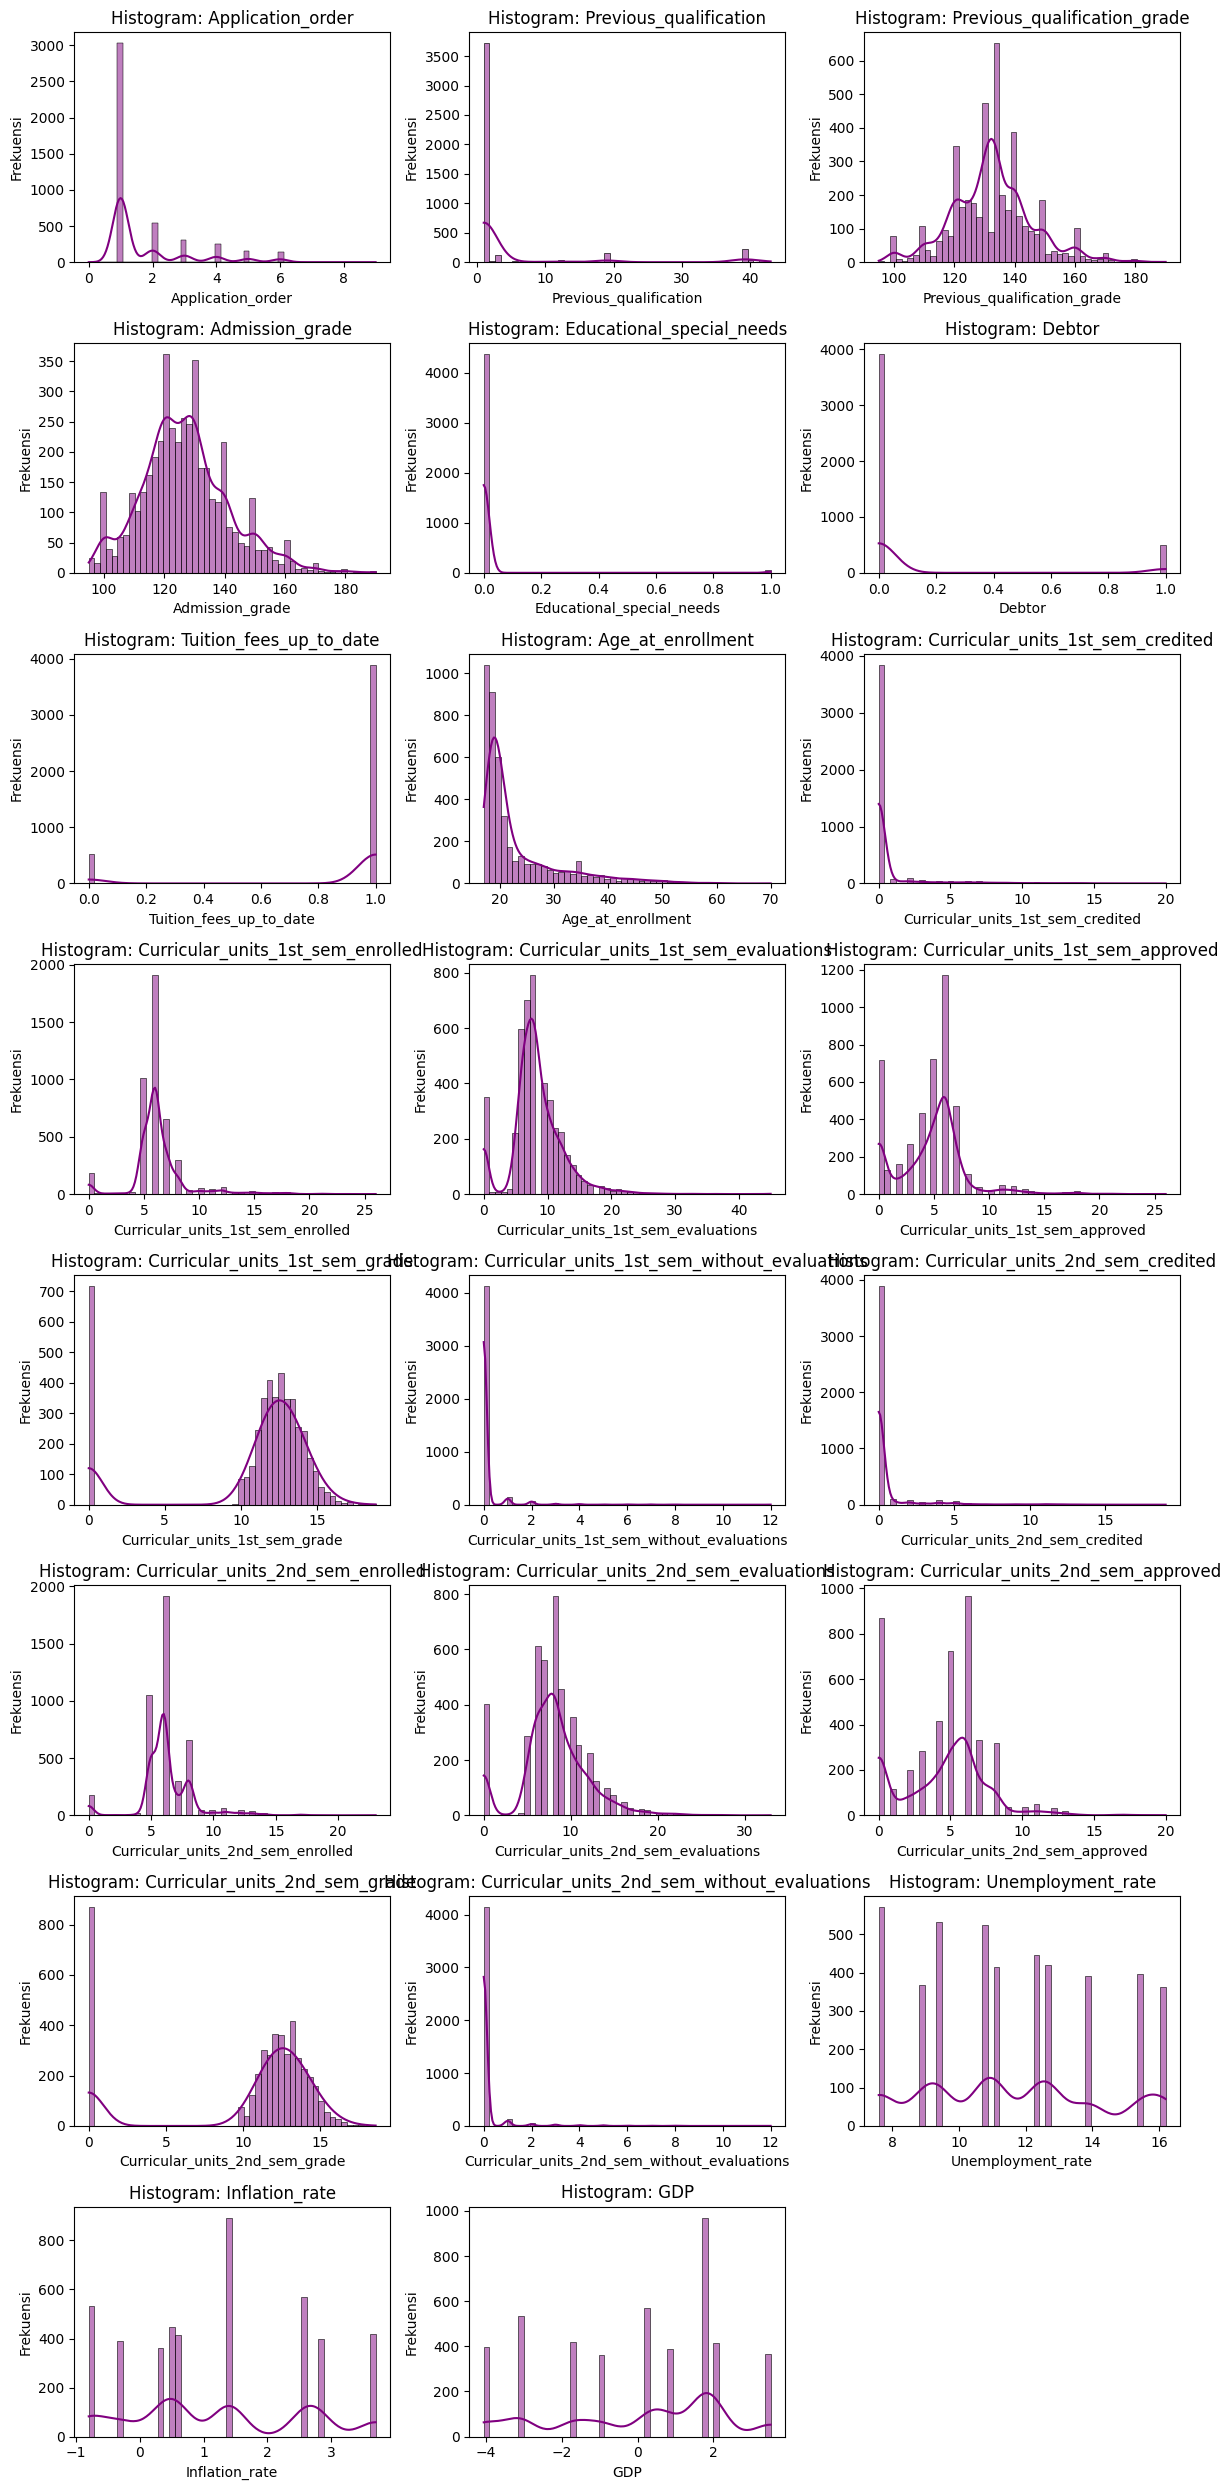

In [ ]:
plot_histogram_semua_kolom(df_student_eda)

### **3.3. Bivariate Analysis**

In [ ]:
def plot_histogram(df, x, hue='Attrition', bins=20, group_by=None, group_value=None):
    """
    Menampilkan histogram variabel numerik dengan pewarnaan berdasarkan kategori hue.
    Juga menampilkan ringkasan frekuensi, persentase, dan statistik deskriptif (describe) berdasarkan hue.

    Parameters:
    df (DataFrame): DataFrame yang berisi data
    x (str): Nama kolom numerik yang ingin diplot di sumbu x
    hue (str): Nama kolom kategori untuk membedakan warna (default: 'Attrition')
    bins (int): Jumlah bin untuk histogram (default: 20)
    group_by (str, optional): Kolom kategori untuk menyaring data (misalnya 'Gender')
    group_value (str, optional): Nilai spesifik dari kolom group_by untuk difilter (misalnya 'Male')
    """

    # Filter data jika group_by dan group_value diberikan
    if group_by and group_value:
        df = df[df[group_by] == group_value]

    # Ringkasan frekuensi dan persentase
    summary = df[hue].value_counts().to_frame(name='Jumlah Sampel')
    summary['Persentase (%)'] = round(summary['Jumlah Sampel'] / summary['Jumlah Sampel'].sum() * 100, 1)

    if group_by and group_value:
        print(f"\nRingkasan Kategorikal untuk {group_by} = {group_value}")
    else:
        print("\nRingkasan Kategorikal (tanpa filter tambahan)")
    print(summary)

    # Ringkasan statistik deskriptif numerik berdasarkan hue
    print(f"\nRingkasan Statistik '{x}' berdasarkan '{hue}':")
    print(df.groupby(hue)[x].describe().round(2))
    print("\n")

    print("Visualisasi:")
    # Plot histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=x, hue=hue, multiple='stack', kde=True, bins=bins, palette='Set2')
    title = f'{hue} vs {x}'
    if group_by and group_value:
        title += f' (Filtered: {group_by} = {group_value})'
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_pie_chart(df, x, hue, palette=None):
    """
    Menampilkan ringkasan dan visualisasi pie chart berdasarkan nilai unik dari kolom x,
    dengan distribusi kategori berdasarkan kolom hue.

    Parameters:
    df (DataFrame): Dataset
    x (str): Kolom kategorikal utama (misalnya Gender, Department, dsb)
    hue (str): Kolom kategorikal kedua untuk dibandingkan (misalnya Attrition)
    palette (str or list, optional): Nama palette seaborn (misal 'Set2') atau list warna kustom.
    """
    unique_vals = df[x].unique()
    n = len(unique_vals)
    rows = (n + 2) // 3  # Maksimal 3 pie chart per baris

    # Tentukan warna (gunakan urutan kategori hue agar konsisten)
    hue_categories = sorted(df[hue].dropna().unique())
    if palette:
        if isinstance(palette, str):
            colors = sns.color_palette(palette, len(hue_categories))
        else:
            colors = palette  # diasumsikan list warna
    else:
        colors = sns.color_palette("Set3", len(hue_categories))

    # Ringkasan
    for val in unique_vals:
        subset = df[df[x] == val]
        counts = subset[hue].value_counts().sort_index()
        total = counts.sum()
        percentages = (counts / total * 100).round(1)

        summary_df = pd.DataFrame({
            'Jumlah Sampel': counts,
            'Persentase (%)': percentages
        })
        print(f"\nRingkasan untuk {x} = {val}")
        print(summary_df)

    # Pie chart
    print("\nVisualisasi:")
    plt.figure(figsize=(16, 5 * rows))
    for i, val in enumerate(unique_vals, 1):
        subset = df[df[x] == val]
        counts = subset[hue].value_counts().sort_index()
        percentages = (counts / counts.sum() * 100).round(1)

        plt.subplot(rows, 3, i)
        plt.pie(
            counts,
            labels=[f"{idx} ({p}%)" for idx, p in percentages.items()],
            autopct='%1.1f%%',
            startangle=90,
            colors=colors
        )
        plt.title(f'Distribusi {x} = {val} berdasarkan {hue}')

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_kategori_bivariate(df, x, hue='Attrition', colors=None):
    """
    Menampilkan jumlah dan persentase kategori serta stacked bar chart dengan hue dari suatu kolom kategorikal.

    Parameters:
    df (DataFrame): DataFrame yang berisi data.
    x (str): Nama kolom kategorikal utama.
    hue (str): Nama kolom kategorikal kedua (default = 'Attrition').
    colors (list): Daftar warna untuk setiap kategori hue.
    """
    # Crosstab
    crosstab = pd.crosstab(df[x], df[hue])
    percent = crosstab.div(crosstab.sum(axis=0), axis=1) * 100

    # Tampilkan ringkasan
    print(f"\nRingkasan untuk kolom: {x}")
    summary_df = pd.concat([
        crosstab.rename(columns=lambda val: f"Jumlah {hue}={val}"),
        percent.rename(columns=lambda val: f"Persentase {hue}={val} (%)").round(1)
    ], axis=1)
    print(summary_df)

    print("\nVisualisasi:")

    # Plot stacked bar chart
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
    plt.title(f"Distribusi {x} berdasarkan {hue}")
    plt.ylabel("Jumlah")
    plt.xlabel(x)
    plt.xticks(rotation=45)
    plt.legend(title=hue)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_top_categories_stacked(df, column_name, top_n=10, hue_column=None,
                                 normalize=False, order_by_hue=None, palette='Set2'):
    """
    Membuat stacked horizontal bar chart untuk N kategori teratas dari kolom tertentu,
    dibedakan berdasarkan hue_column, dengan opsi mengurutkan berdasarkan nilai hue tertentu.

    Parameters:
    - df: DataFrame input.
    - column_name: Kolom kategori utama (string).
    - top_n: Jumlah kategori teratas yang ditampilkan (default=10).
    - hue_column: Kolom untuk kategori pembeda warna (opsional).
    - normalize: Jika True, menampilkan dalam bentuk persentase (stacked 100%).
    - order_by_hue: Nama kategori pada hue_column yang ingin dijadikan dasar pengurutan (string).
    - palette: Nama colormap seaborn (string) atau list warna kustom.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    top_categories = df[column_name].value_counts().nlargest(top_n).index
    df_filtered = df[df[column_name].isin(top_categories)]

    if hue_column is not None:
        crosstab = pd.crosstab(df_filtered[column_name], df_filtered[hue_column])
        if normalize:
            crosstab = crosstab.div(crosstab.sum(axis=1), axis=0)

        # Urutkan berdasarkan hue yang diinginkan
        if order_by_hue and order_by_hue in crosstab.columns:
            crosstab = crosstab.sort_values(by=order_by_hue, ascending=True)
        else:
            crosstab = crosstab.sort_values(by=crosstab.columns[0], ascending=True)

        # Ambil warna
        if isinstance(palette, str):
            colors = sns.color_palette(palette, len(crosstab.columns))
        else:
            colors = palette  # daftar warna custom

        crosstab.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)
        plt.xlabel('Proporsi' if normalize else 'Jumlah')
        plt.ylabel(column_name)
        plt.title(f'Top {top_n} {column_name}' + f' berdasarkan {hue_column}'
                  + (f' (urut: {order_by_hue})' if order_by_hue else ''))
        plt.legend(title=hue_column)

    plt.tight_layout()
    plt.show()

#### **a. Analisis Faktor Demografis Mahasiswa**

```
Tujuan Analisis:
1. Bagaimana distribusi status mahasiswa (Dropout vs Non-Dropout) ditinjau dari karakteristik demografis mereka?
2. Apakah terdapat pola yang mencolok atau ketimpangan tertentu pada kelompok demografis spesifik yang berkaitan dengan tingkat dropout?
3. Apakah fitur tertentu pada demografis mahasiswa berpotensi sebagai variabel prediktif dalam model machine learning untuk memprediksi risiko dropout?
```

| **Fitur**             | **Pertanyaan Analisis**                                                                           |
| ------------------------------------- | ---------------------------------------------------------------------------------------- |
| `Gender`                              | Apakah terdapat perbedaan tingkat dropout antara mahasiswa pria dan wanita?              |
| `Age at enrollment`                   | Apakah usia saat mendaftar berpengaruh terhadap kemungkinan dropout?                     |
| `Marital status`                      | Apakah status pernikahan berkaitan dengan tingkat dropout mahasiswa?                     |
| `Displaced`, `International`          | Apakah mahasiswa dari luar daerah atau luar negeri memiliki risiko dropout lebih tinggi? |
| `Mother’s` & `Father’s qualification` | Apakah tingkat pendidikan orang tua memengaruhi kemungkinan mahasiswa dropout?           |
| `Nacionality`                         | Apakah kewarganegaraan berkaitan dengan risiko dropout mahasiswa?                        |
| `Daytime_evening_attendance`          | Apakah mahasiswa program malam lebih berisiko mengalami dropout dibanding program siang? |
| **Visualisasi**                       | Menggunakan barplot, histogram, dan boxplot berdasarkan status mahasiswa                 |


##### 📌 **JENIS KELAMIN (Gender)**


Ringkasan untuk Gender = Male
          Jumlah Sampel  Persentase (%)
Status                                 
Dropout             701            45.1
Enrolled            307            19.7
Graduate            548            35.2

Ringkasan untuk Gender = Female
          Jumlah Sampel  Persentase (%)
Status                                 
Dropout             720            25.1
Enrolled            487            17.0
Graduate           1661            57.9

Visualisasi:


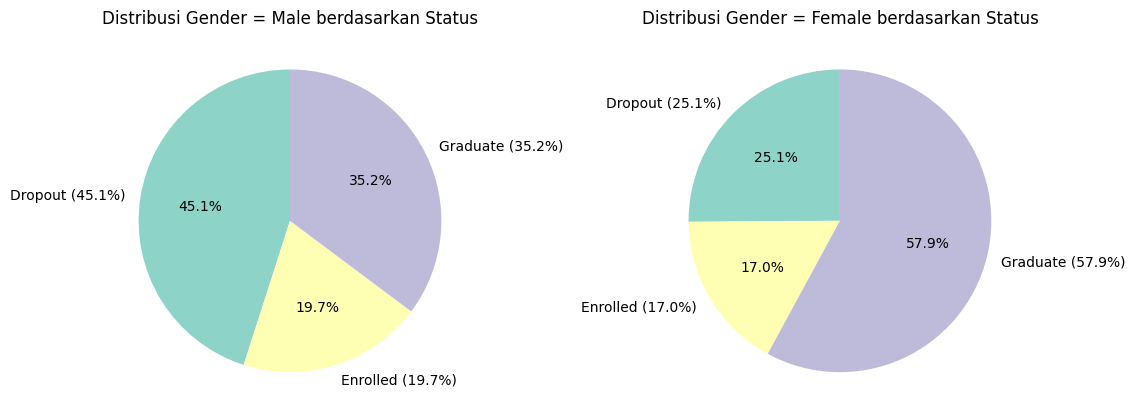

In [ ]:
plot_pie_chart(df_student_eda, x='Gender', hue='Status')

>**Berdasarkan hasil ringkasan dan visualisasi pie chart terhadap fitur `Gender`:**
- Terlihat adanya perbedaan yang cukup mencolok dalam tingkat dropout antara mahasiswa pria dan wanita. Dari `total mahasiswa laki-laki, sebanyak 45,1% mengalami dropout`, sementara hanya 25,1% mahasiswa perempuan yang mengalami hal serupa. Sebaliknya, `proporsi mahasiswa yang berhasil lulus (Graduate) jauh lebih tinggi pada kelompok perempuan, yaitu 57,9%`, dibandingkan dengan laki-laki yang hanya 35,2%.
- Hal ini mengindikasikan bahwa `mahasiswa perempuan cenderung memiliki tingkat kelulusan yang lebih tinggi dan risiko dropout yang lebih rendah dibandingkan mahasiswa laki-laki`. Selain itu, proporsi mahasiswa yang masih aktif terdaftar (Enrolled) relatif seimbang di antara keduanya, yaitu sekitar 17%–19%.

**Insight:**
- Temuan ini menunjukkan bahwa jenis kelamin dapat menjadi salah satu faktor demografis yang berkaitan dengan perbedaan keberhasilan akademik mahasiswa, di mana mahasiswa perempuan menunjukkan performa akademik yang lebih stabil.

##### 📌 **UMUR (Age at enrollment)**


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Age_at_enrollment' berdasarkan 'Status':
           count   mean   std   min   25%   50%   75%   max
Status                                                     
Dropout   1421.0  26.07  8.70  18.0  19.0  23.0  30.0  70.0
Enrolled   794.0  22.37  6.30  17.0  19.0  20.0  23.0  54.0
Graduate  2209.0  21.78  6.69  17.0  18.0  19.0  21.0  62.0


Visualisasi:


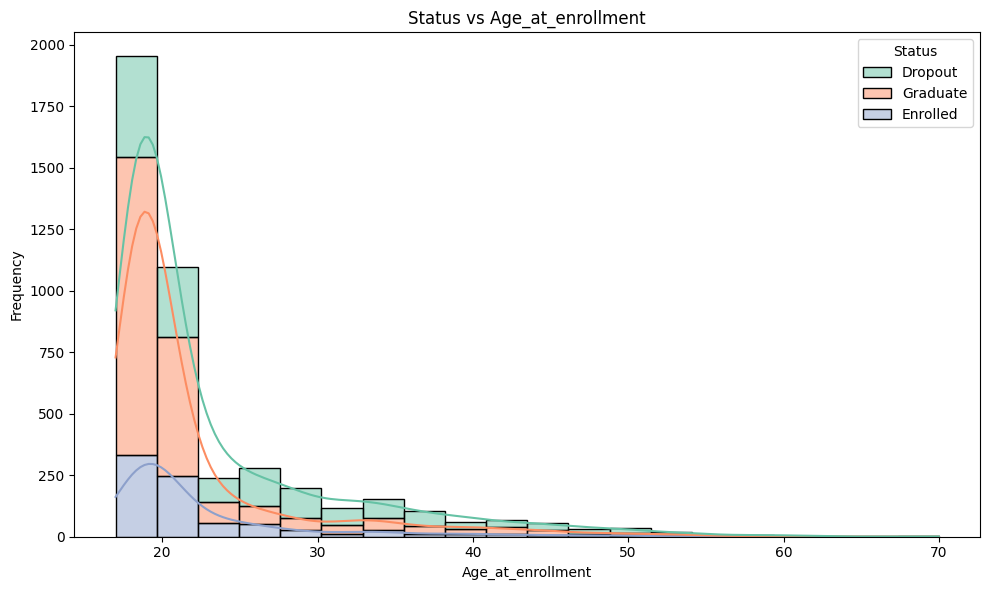

In [ ]:
plot_histogram(df_student_eda, x='Age_at_enrollment', hue='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Age_at_enrollment`:**
- Terlihat bahwa fitur umur saat mendaftar (Age at enrollment) menunjukkan adanya hubungan antara usia mahasiswa dan status akademiknya. `Mayoritas mahasiswa yang lulus (Graduate)` berada pada rentang `usia 17 hingga sekitar 22 tahun`, dengan puncak kepadatan distribusi sekitar usia 18–19 tahun. Ini menunjukkan bahwa mahasiswa yang `memulai kuliah di usia muda cenderung lebih besar peluangnya untuk menyelesaikan studi dan lulus tepat waktu`.
- Sebaliknya, distribusi `mahasiswa dropout cenderung melebar ke usia yang lebih tua`, dengan puncak yang lebih datar dan ekor yang memanjang hingga usia di atas 40 tahun. Hal ini mengindikasikan bahwa `mahasiswa yang mendaftar pada usia lebih tua memiliki kemungkinan lebih besar untuk tidak menyelesaikan kuliah`. Ini juga terlihat dari data statistik sebelumnya, di mana rata-rata usia dropout (26,07 tahun) jauh lebih tinggi dibanding graduate (21,78 tahun).
- `Mahasiswa yang masih terdaftar (Enrolled) tampak lebih terkonsentrasi pada rentang usia yang lebih muda (sekitar 18–22 tahun)`, mirip dengan distribusi graduate, meskipun jumlahnya lebih sedikit. Ini bisa mengindikasikan bahwa `banyak dari mereka masih dalam tahap awal studi`.
- Secara keseluruhan, tren visual dan statistik mendukung bahwa `semakin bertambah usia saat mendaftar, semakin tinggi pula risiko dropout`, mungkin karena faktor pekerjaan, tanggung jawab keluarga, atau ketidaksesuaian waktu studi dengan fase kehidupan.

**Insight:**
- Temuan ini menunjukkan bahwa usia saat pendaftaran merupakan variabel penting dalam memahami kemungkinan mahasiswa untuk dropout. Mahasiswa yang memulai studi di usia lebih tua tampaknya menghadapi tantangan yang lebih besar dalam menyelesaikan pendidikan mereka.

##### 📌 **STATUS PERNIKAHAN (Marital Status)**


Ringkasan untuk Marital_status = Single
          Jumlah Sampel  Persentase (%)
Status                                 
Dropout            1184            30.2
Enrolled            720            18.4
Graduate           2015            51.4

Ringkasan untuk Marital_status = Married
          Jumlah Sampel  Persentase (%)
Status                                 
Dropout             179            47.2
Enrolled             52            13.7
Graduate            148            39.1

Ringkasan untuk Marital_status = Divorced
          Jumlah Sampel  Persentase (%)
Status                                 
Dropout              42            46.2
Enrolled             16            17.6
Graduate             33            36.3

Ringkasan untuk Marital_status = Widower
          Jumlah Sampel  Persentase (%)
Status                                 
Dropout               1            25.0
Enrolled              2            50.0
Graduate              1            25.0

Ringkasan untuk Marital_status 

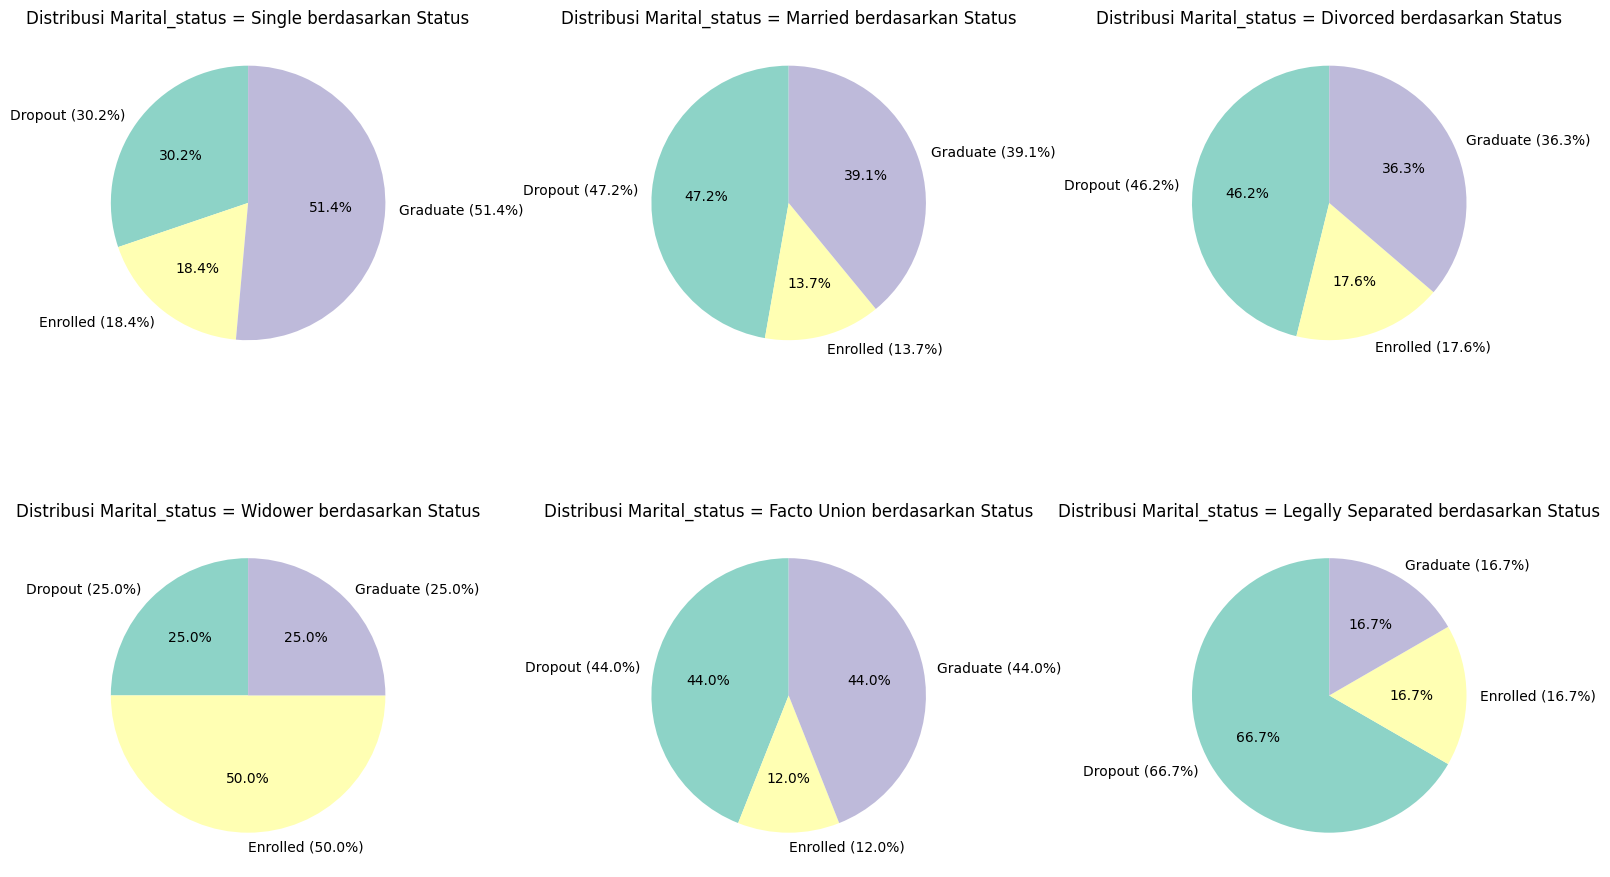

In [ ]:
plot_pie_chart(df_student_eda, x='Marital_status', hue='Status')

>**Berdasarkan hasil ringkasan dan visualisasi pie chart terhadap fitur `Marital_Status`:**
- Terlihat bahwa terdapat variasi yang cukup signifikan dalam distribusi status akademik mahasiswa berdasarkan status pernikahan mereka, yang mengindikasikan adanya kemungkinan hubungan antara status pernikahan dan tingkat dropout.
- Mahasiswa dengan `status Single merupakan kelompok terbesar dan memiliki proporsi dropout sebesar 30.2%`, dengan mayoritas (51.4%) berhasil lulus. Ini menunjukkan bahwa `mahasiswa yang belum menikah cenderung memiliki peluang lebih tinggi untuk menyelesaikan studi mereka`. Sebaliknya, `mahasiswa yang sudah menikah (Married)` menunjukkan `tingkat dropout yang lebih tinggi, yakni 47.2%`, dan hanya 39.1% yang berhasil lulus. Hal serupa juga terlihat pada mahasiswa yang `berstatus bercerai (Divorced), dengan tingkat dropout 46.2%`, dan lulusan hanya 36.3%.
- Kelompok `Facto Union dan Legally Separated`, meskipun jumlahnya jauh lebih kecil, menunjukkan tren serupa: `tingkat dropout tinggi (masing-masing 44% dan 66.7%)`, dan `tingkat kelulusan yang lebih rendah`. Sementara itu, kelompok `Widower` tidak dapat dianalisis secara bermakna karena hanya terdiri dari 4 sampel, sehingga `tidak cukup representatif untuk disimpulkan`.
- Secara umum, analisis ini menunjukkan bahwa `mahasiswa yang memiliki tanggung jawab tambahan seperti pernikahan atau telah melalui pengalaman pernikahan (cerai, berpisah, atau hubungan formal lainnya) cenderung memiliki tingkat dropout yang lebih tinggi dibandingkan mahasiswa lajang`. Hal ini kemungkinan disebabkan oleh faktor eksternal seperti tanggung jawab keluarga, beban finansial, dan keterbatasan waktu yang mengganggu fokus studi.

**Insight:**
- Status pernikahan tampaknya berkorelasi dengan kemungkinan dropout, di mana mahasiswa yang belum menikah (single) memiliki peluang lebih tinggi untuk lulus dibanding mereka yang sudah atau pernah menikah. Temuan ini dapat menjadi pertimbangan penting dalam penyusunan kebijakan dukungan akademik bagi mahasiswa dengan status pernikahan tertentu.

##### 📌 **MAHASISWA LUAR DAERAH (Displaced)**


Ringkasan untuk Displaced = Yes
          Jumlah Sampel  Persentase (%)
Status                                 
Dropout             669            27.6
Enrolled            433            17.8
Graduate           1324            54.6

Ringkasan untuk Displaced = No
          Jumlah Sampel  Persentase (%)
Status                                 
Dropout             752            37.6
Enrolled            361            18.1
Graduate            885            44.3

Visualisasi:


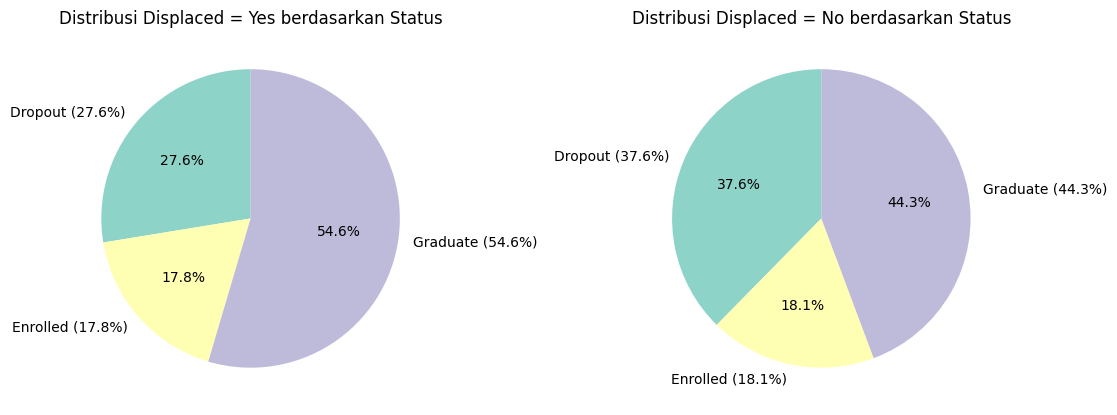

In [ ]:
plot_pie_chart(df_student_eda, x='Displaced', hue='Status')

>**Berdasarkan hasil ringkasan dan visualisasi pie chart terhadap fitur `Displaced`:**
- Terlihat adanya perbedaan signifikan dalam distribusi status akademik antara mahasiswa lokal dan mahasiswa luar daerah.
- Mahasiswa yang berasal dari `luar daerah (Displaced = Yes)` memiliki `tingkat dropout sebesar 27.6%`, sedangkan 54.6% di antaranya berhasil lulus. Sementara itu, mahasiswa yang berasal dari `daerah lokal (Displaced = No)` menunjukkan `tingkat dropout yang lebih tinggi, yaitu 37.6%`, dan hanya 44.3% yang berhasil menyelesaikan studi mereka.
- `Temuan ini cukup menarik karena berlawanan dengan asumsi umum bahwa mahasiswa dari luar daerah mungkin menghadapi lebih banyak tantangan, seperti adaptasi lingkungan, jarak dari keluarga, dan kesulitan finansial`. Namun, data justru menunjukkan bahwa `mahasiswa luar daerah memiliki proporsi kelulusan yang lebih tinggi dan dropout yang lebih rendah dibandingkan dengan mahasiswa lokal`.
- Salah satu kemungkinan penjelasan dari fenomena ini adalah bahwa `mahasiswa luar daerah mungkin memiliki motivasi yang lebih kuat untuk menyelesaikan pendidikan mereka karena pengorbanan yang lebih besar (seperti merantau, biaya hidup, dan keterbatasan dukungan sosial langsung)`. Mereka `mungkin juga lebih terfokus dalam akademik karena tinggal jauh dari distraksi lingkungan keluarga atau sosial` yang biasa mereka temui di daerah asal.

**Insight:**
- Mahasiswa dari luar daerah tidak memiliki risiko dropout lebih tinggi, justru sebaliknya mereka menunjukkan tingkat kelulusan yang lebih tinggi dan dropout yang lebih rendah dibandingkan mahasiswa lokal. Ini menunjukkan bahwa latar geografis bukanlah hambatan utama, dan mahasiswa luar daerah bahkan cenderung lebih berhasil menyelesaikan studinya.

##### 📌 **MAHASISWA LUAR NEGERI (International)**


Ringkasan untuk International = No
          Jumlah Sampel  Persentase (%)
Status                                 
Dropout            1389            32.2
Enrolled            770            17.8
Graduate           2155            50.0

Ringkasan untuk International = Yes
          Jumlah Sampel  Persentase (%)
Status                                 
Dropout              32            29.1
Enrolled             24            21.8
Graduate             54            49.1

Visualisasi:


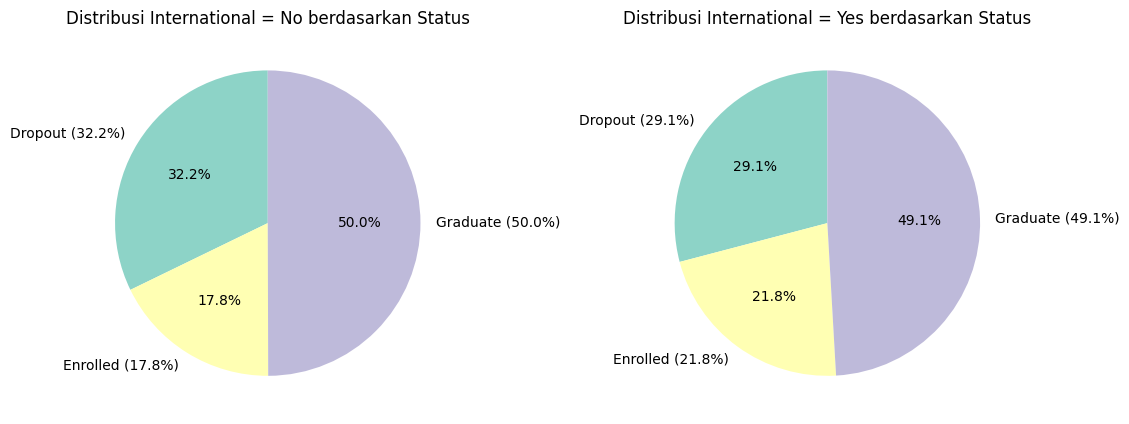

In [ ]:
plot_pie_chart(df_student_eda, x='International', hue='Status')

>**Berdasarkan hasil ringkasan dan visualisasi pie chart terhadap fitur `International`:**
- Diperoleh gambaran bahwa `tingkat dropout mahasiswa internasional tidak secara signifikan lebih tinggi dibandingkan mahasiswa lokal`. Untuk mahasiswa `non-internasional (International = No), tingkat dropout tercatat sebesar 32.2%`, sementara tingkat kelulusan mencapai 50.0%. Di sisi lain, mahasiswa `internasional (International = Yes) memiliki tingkat dropout sedikit lebih rendah, yaitu 29.1%`, dengan tingkat kelulusan sebesar 49.1%. Meski terdapat sedikit perbedaan, persentase ini relatif sebanding antara kedua kelompok, terutama dalam hal kelulusan.
- Meskipun mahasiswa internasional cenderung menghadapi tantangan tambahan seperti perbedaan budaya, bahasa, dan adaptasi terhadap sistem pendidikan yang berbeda, data menunjukkan bahwa mereka mampu bersaing setara dengan mahasiswa lokal dalam hal penyelesaian studi. Salah satu kemungkinan penyebabnya adalah bahwa mahasiswa internasional biasanya telah melalui proses seleksi yang ketat atau memiliki motivasi dan dukungan yang kuat dari sponsor, pemerintah, atau keluarga mereka.
- Namun, `perlu dicatat bahwa jumlah mahasiswa internasional dalam data ini jauh lebih sedikit dibandingkan mahasiswa lokal, sehingga kesimpulan ini harus diinterpretasikan dengan hati-hati`. Perbedaan kecil dalam persentase dapat dipengaruhi oleh ukuran sampel yang kecil.

**Insight:**
- Mahasiswa internasional tidak menunjukkan risiko dropout yang lebih tinggi dibandingkan mahasiswa lokal. Tingkat kelulusan dan dropout mereka relatif setara, meskipun mereka menghadapi tantangan yang unik. Ini menunjukkan bahwa dengan dukungan dan motivasi yang tepat, mahasiswa internasional dapat beradaptasi dan berhasil menyelesaikan studi mereka dengan baik.

##### 📌 **KEWARGANEGARAAN (Nationality)**


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Nationality' berdasarkan 'Status':
         count unique         top  freq
Status                                 
Dropout   1421     13  Portuguese  1389
Enrolled   794     12  Portuguese   770
Graduate  2209     14  Portuguese  2155


Visualisasi:


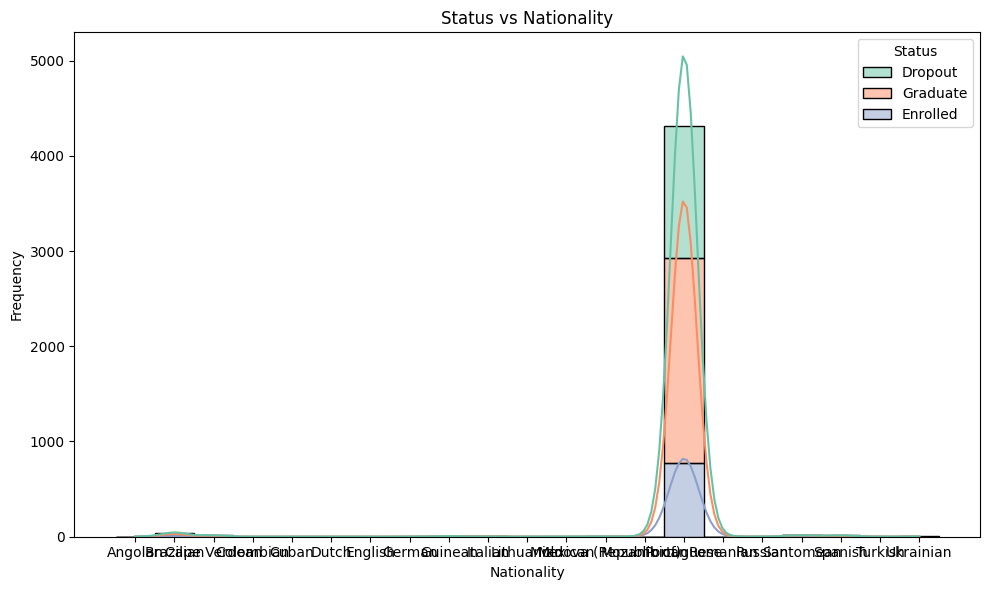

In [ ]:
plot_histogram(df_student_eda, x='Nationality', hue='Status')

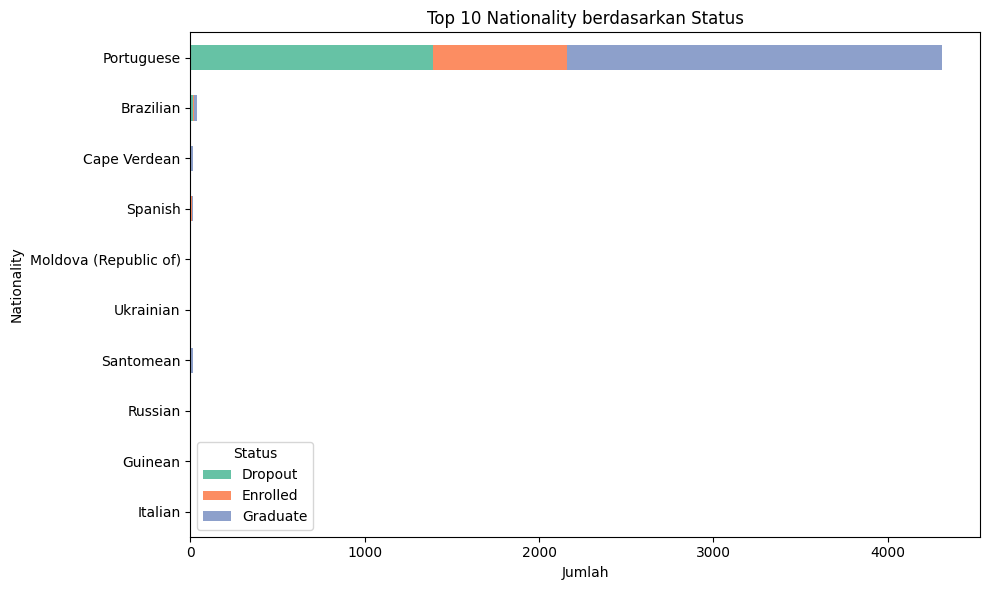

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Nationality', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Nationality`:**
- Grafik menunjukkan bahwa mayoritas besar mahasiswa berasal dari Portugal, yang mendominasi total jumlah mahasiswa dengan jumlah lebih dari 4000 orang. Pada kategori Portuguese ini, distribusi status mahasiswa (Dropout, Enrolled, Graduate) terlihat cukup merata, dengan proporsi lulusan (Graduate) paling tinggi, diikuti oleh dropout dan enrolled.
- Sementara itu, kewarganegaraan selain Portuguese seperti Brazilian, Cape Verdean, Spanish, Ukrainian, dan lainnya memiliki jumlah mahasiswa yang sangat sedikit—umumnya kurang dari 50 orang. Meskipun ada variasi kecil dalam distribusi status pada beberapa kewarganegaraan minoritas (seperti adanya proporsi dropout pada Brazilian atau enrolled pada Spanish), skala yang sangat kecil dari kelompok ini membuat generalisasi atau penarikan kesimpulan statistik menjadi tidak cukup kuat.

**Insight:**
- Walaupun grafik ini menampilkan distribusi berdasarkan status untuk 10 kewarganegaraan terbanyak, ketimpangan jumlah sampel masih sangat mencolok. Portuguese mendominasi jumlah keseluruhan mahasiswa, sementara kewarganegaraan lainnya terlalu kecil secara jumlah untuk dapat dianalisis secara representatif. Oleh karena itu, tidak ada bukti yang cukup kuat bahwa kewarganegaraan merupakan faktor signifikan yang memengaruhi risiko dropout dalam dataset ini.

##### 📌 **PROGRAM PERKULIAHAN (Daytime_evening_attendance)**


Ringkasan untuk Daytime_evening_attendance = Daytime
          Jumlah Sampel  Persentase (%)
Status                                 
Dropout            1214            30.8
Enrolled            719            18.2
Graduate           2008            51.0

Ringkasan untuk Daytime_evening_attendance = Evening
          Jumlah Sampel  Persentase (%)
Status                                 
Dropout             207            42.9
Enrolled             75            15.5
Graduate            201            41.6

Visualisasi:


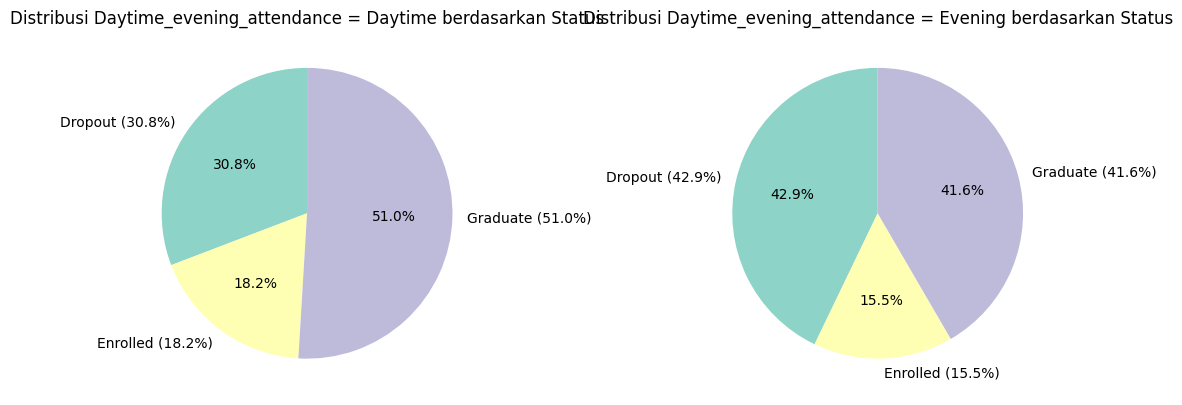

In [ ]:
plot_pie_chart(df_student_eda, x='Daytime_evening_attendance', hue='Status')

>**Berdasarkan hasil ringkasan dan visualisasi pie chart terhadap fitur `Daytime_evening_attendance`:**
- Terlihat adanya perbedaan yang cukup mencolok dalam distribusi status mahasiswa antara program siang (Daytime) dan malam (Evening). Mahasiswa yang mengikuti kelas siang menunjukkan tingkat kelulusan tertinggi, yaitu sebesar 51%, dan tingkat dropout sebesar 30.8%. Sebaliknya, pada mahasiswa kelas malam, tingkat dropout mencapai 42.9%, yang berarti hampir setengah dari mahasiswa malam tidak menyelesaikan studi mereka, sementara tingkat kelulusan hanya 41.6%.
- Perbedaan ini mengindikasikan bahwa mahasiswa program malam cenderung memiliki risiko dropout yang lebih tinggi dibandingkan dengan mahasiswa program siang. Hal ini mungkin disebabkan oleh sejumlah faktor, seperti keterbatasan waktu belajar karena bekerja di siang hari, kelelahan, atau tanggung jawab keluarga yang lebih besar. Meskipun total jumlah mahasiswa malam jauh lebih sedikit dibandingkan dengan mahasiswa siang, proporsi dropout yang lebih tinggi menunjukkan bahwa kelas malam merupakan kelompok yang rentan dan perlu mendapatkan perhatian khusus dalam intervensi akademik maupun dukungan sosial.

**Insight:**
- Program perkuliahan terbukti berkorelasi dengan tingkat dropout, dan ini dapat menjadi pertimbangan penting bagi institusi pendidikan dalam merancang kebijakan atau dukungan tambahan untuk mahasiswa malam agar dapat meningkatkan tingkat kelulusan mereka.

#### **b. Analisis Latar Belakang Pendidikan**

```
Tujuan:
1. Bagaimana hubungan antara latar belakang pendidikan sebelumnya dengan status mahasiswa (Dropout vs. Non-Dropout)?
2. Apakah terdapat kecenderungan tertentu dalam tingkat dropout berdasarkan jenis latar belakang pendidikan tersebut?
3. Apakah fitur tertentu pada latar belakang pendidikan berpotensi sebagai variabel prediktif dalam model machine learning untuk memprediksi risiko dropout?
```

| **Fitur**                       | **Pertanyaan Analisis**                                                          |
| ------------------------------- | ----------------------------------------------------------------------------------------------------- |
| `Previous_qualification`        | Apakah terdapat pola tertentu dalam tingkat dropout berdasarkan latar belakang pendidikan sebelumnya? |
| `Previous_qualification_grade`  | Apakah nilai akademik dari pendidikan sebelumnya berkorelasi dengan kemungkinan dropout mahasiswa?    |
| `Mothers_qualification`         | Apakah tingkat pendidikan ibu memengaruhi peluang mahasiswa untuk dropout?                            |
| `Fathers_qualification`         | Apakah pendidikan terakhir ayah berkaitan dengan risiko dropout mahasiswa?                                     |
| `Mothers_occupation`            | Apakah jenis pekerjaan ibu memiliki keterkaitan dengan status kelulusan mahasiswa?                    |
| `Fathers_occupation`            | Apakah pekerjaan ayah berperan dalam memengaruhi kemungkinan mahasiswa mengalami dropout?             |
| `Application_mode`              | Apakah jalur masuk mahasiswa berdampak pada tingkat dropout?                                          |
| `Application_order`             | Apakah urutan pilihan program studi saat mendaftar berkaitan dengan risiko dropout mahasiswa?         |
| `Course`                        | Apakah terdapat program studi tertentu dengan tingkat dropout yang lebih tinggi dibanding yang lain?  |
| `Admission_grade`               | Apakah nilai masuk (admission grade) yang lebih rendah meningkatkan kemungkinan dropout?              |
| **Visualisasi yang Disarankan** | Boxplot, histogram, dan stacked bar chart berdasarkan kategori `Status` (Dropout, Enrolled, Graduate) |


##### 📌 **PENDIDIKAN SEBELUMNYA (Previous_qualification)** DONE


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Previous_qualification' berdasarkan 'Status':
         count unique                                                top  freq
Status                                                                        
Dropout   1421     17  Secondary Education - 12th Year of Schooling o...  1078
Enrolled   794     11  Secondary Education - 12th Year of Schooling o...   698
Graduate  2209     14  Secondary Education - 12th Year of Schooling o...  1941


Visualisasi:


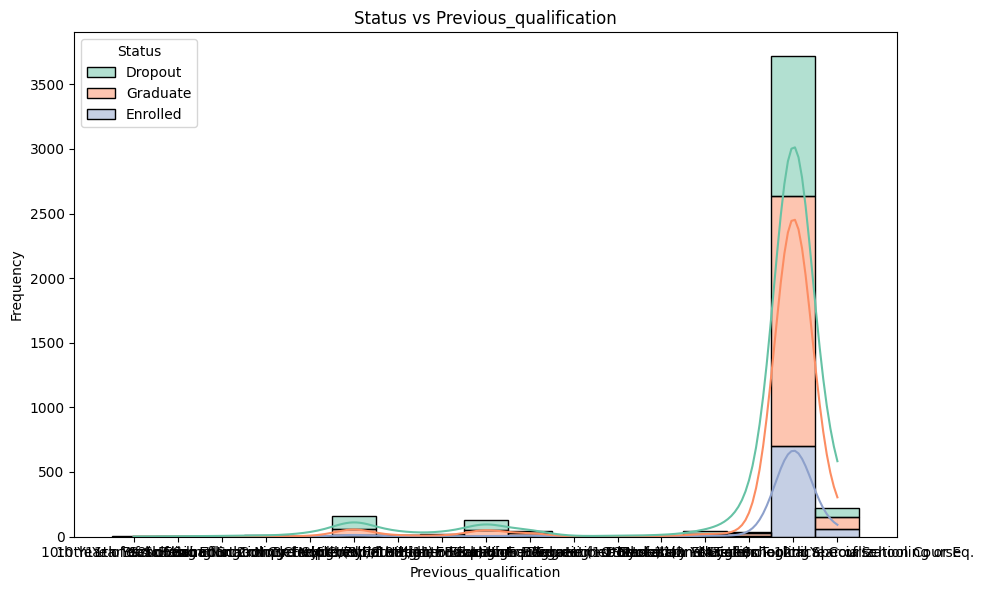

In [ ]:
plot_histogram(df_student_eda, x='Previous_qualification', hue='Status')

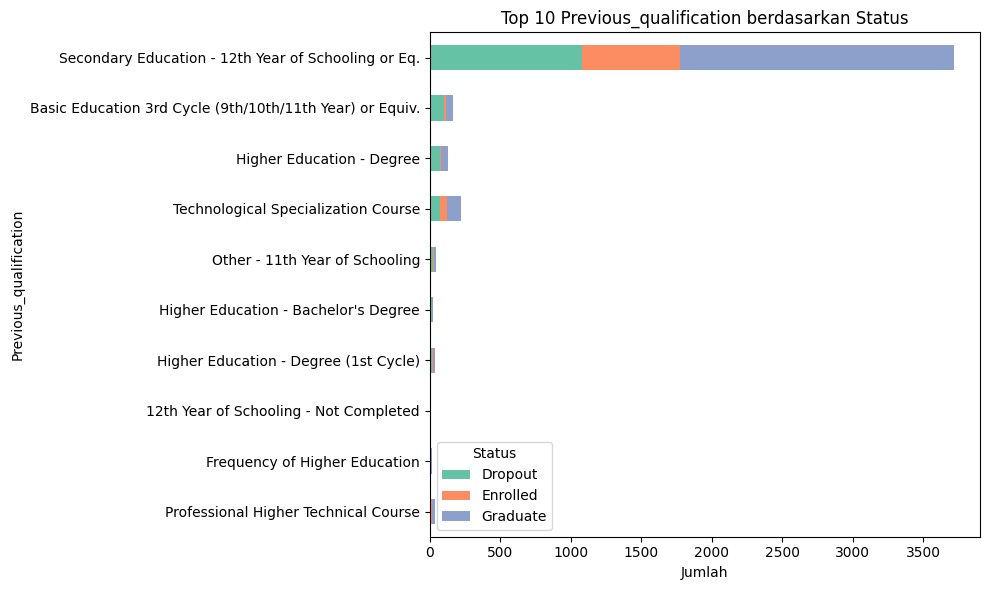

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Previous_qualification', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Previous_qualification`:**
- Tampaknya mayoritas mahasiswa dalam ketiga kategori status akademik—baik yang lulus (graduate), putus kuliah (dropout), maupun masih aktif (enrolled) memiliki latar belakang dari "Secondary Education - 12th Year of Schooling or Equivalent". Hal ini menunjukkan bahwa jenjang pendidikan menengah atas merupakan jalur paling umum sebelum melanjutkan ke pendidikan tinggi dalam dataset ini.
- Namun, jika dilihat dari distribusinya, proporsi mahasiswa dropout dengan latar belakang ini tergolong tinggi, yaitu sekitar 75,9% dari total dropout (1.078 dari 1.421), dibandingkan dengan 87,9% dari total enrolled dan 87,9% dari total graduate. Artinya, meskipun sebagian besar mahasiswa berasal dari jenjang pendidikan menengah atas, mereka tetap memiliki risiko dropout yang signifikan.
- Visualisasi histogram stacked dan kurva KDE turut memperlihatkan bahwa pola distribusi latar belakang pendidikan untuk mahasiswa dropout sedikit lebih tersebar ke beberapa jenis kualifikasi lain (seperti Technological Specialization Course atau Professional Education), meskipun dalam jumlah yang jauh lebih kecil. Hal ini bisa mengindikasikan bahwa mahasiswa dengan latar belakang selain pendidikan menengah atas memiliki keragaman hasil akademik yang lebih tinggi, termasuk kemungkinan dropout yang juga bervariasi.
- Secara keseluruhan, meskipun mayoritas mahasiswa dropout berasal dari latar belakang pendidikan menengah atas, hal ini lebih mencerminkan proporsi dominan latar belakang tersebut secara umum dalam populasi. Oleh karena itu, tidak ditemukan pola ketimpangan ekstrem, tetapi penting untuk mengamati interaksi latar belakang pendidikan ini dengan fitur-fitur lain seperti previous grade atau admission grade untuk memahami risiko dropout secara lebih mendalam.

**Insight:**
- Latar belakang pendidikan "Secondary Education - 12th Year" adalah jalur masuk dominan ke pendidikan tinggi, dan menyumbang proporsi dropout terbesar secara absolut. Namun, jika dilihat dari kelompok kecil lain, tampak bahwa beberapa kategori seperti yang tidak menyelesaikan pendidikan menengah atas atau berasal dari jalur non-tradisional memiliki risiko dropout yang relatif lebih tinggi jika dilihat dari distribusi internal mereka. Ini bisa menjadi indikasi perlunya pendekatan dukungan tambahan bagi mahasiswa dari jalur pendidikan alternatif atau kurang mapan secara akademik.

##### 📌 **NILAI AKADEMIK DARI PENDIDIKAN SEBELUMNYA (Previous_qualification_grade)** DONE


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Previous_qualification_grade' berdasarkan 'Status':
           count    mean    std   min    25%    50%    75%    max
Status                                                           
Dropout   1421.0  131.11  12.87  95.0  122.0  133.1  137.0  190.0
Enrolled   794.0  131.21  12.87  96.0  123.0  130.0  139.0  190.0
Graduate  2209.0  134.08  13.34  97.0  126.0  133.1  141.0  184.4


Visualisasi:


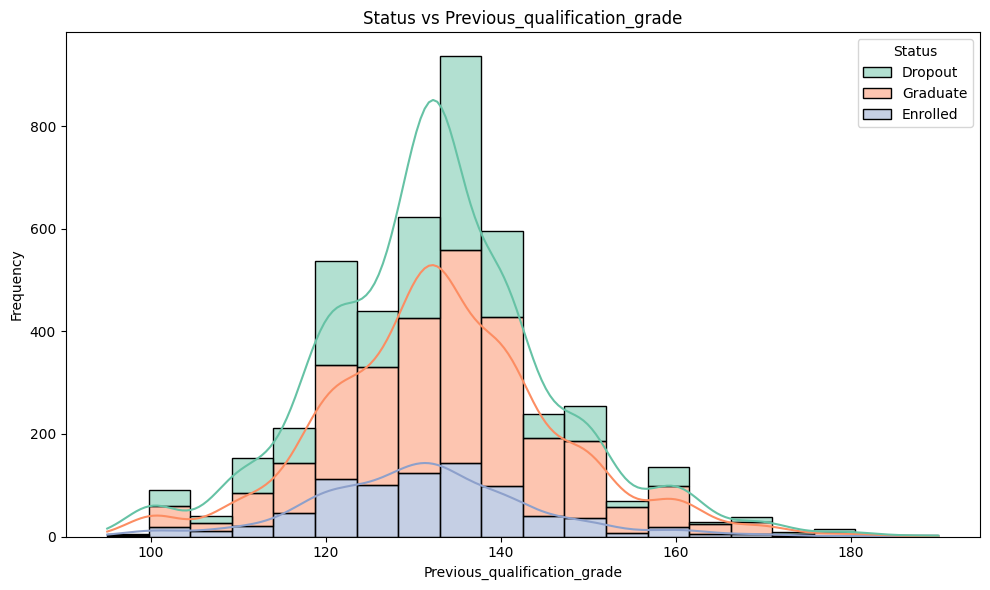

In [ ]:
plot_histogram(df_student_eda, x='Previous_qualification_grade', hue='Status')

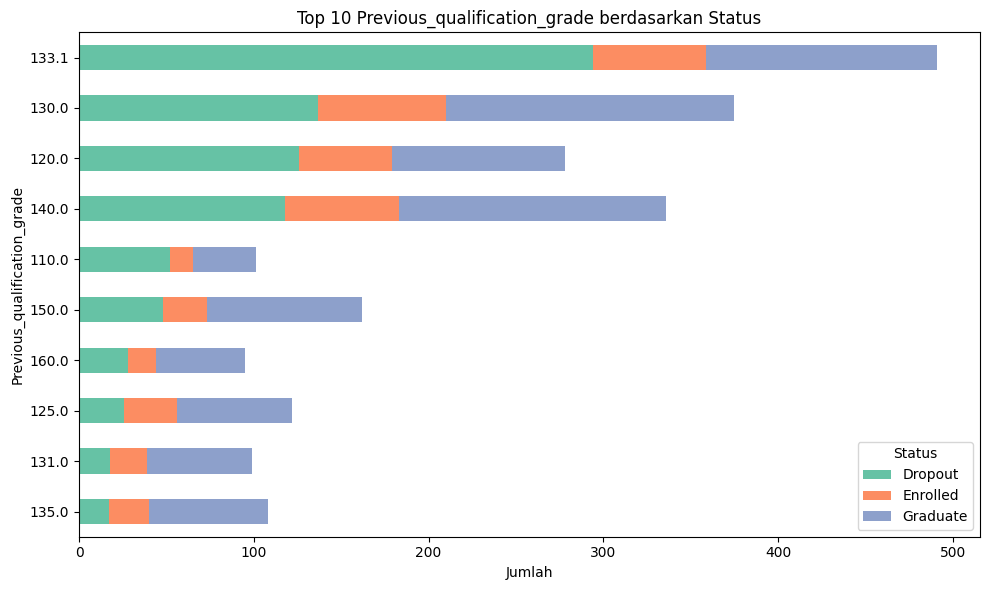

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Previous_qualification_grade', hue_column='Status')

>**Berdasarkan hasil ringkasan, visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Previous_qualification_grade	`:**
- Terdapat indikasi yang cukup jelas bahwa nilai akademik dari pendidikan sebelumnya berkorelasi dengan status akademik mahasiswa saat ini. Mahasiswa dengan status Graduate cenderung memiliki nilai akademik awal (previous qualification grade) yang lebih tinggi dibandingkan mahasiswa yang Dropout atau masih Enrolled. Hal ini menunjukkan bahwa performa akademik sebelum memasuki jenjang pendidikan tinggi bisa menjadi indikator awal keberhasilan studi.
- Distribusi nilai juga menunjukkan pola yang menarik: pada kelompok Graduate, kuartil pertama hingga kuartil ketiga (126.0 – 141.0) berada pada rentang nilai yang lebih tinggi dibandingkan dua kelompok lainnya. Kurva KDE memperlihatkan bahwa puncak distribusi nilai Graduate bergeser ke kanan, mencerminkan kecenderungan berada di rentang nilai lebih tinggi. Sementara itu, distribusi nilai pada Dropout cenderung lebih menyebar dan lebih banyak pada rentang nilai menengah ke bawah.
- Visualisasi bar horizontal stacked terhadap 10 nilai terbanyak juga memperkuat temuan ini. Nilai-nilai yang paling sering muncul seperti 133.1, 130.0, dan 120.0 banyak diisi oleh mahasiswa Graduate, menunjukkan bahwa nilai menengah ke atas lebih sering dikaitkan dengan kelulusan. Bahkan pada nilai yang lebih tinggi seperti 150.0 dan 160.0, mayoritas mahasiswa berasal dari kelompok Graduate, sedangkan mahasiswa Dropout relatif lebih dominan pada nilai yang lebih rendah. Ini menunjukkan proporsi mahasiswa Dropout cenderung menurun seiring dengan meningkatnya nilai, sementara Graduate justru meningkat. Ini menunjukkan bahwa mahasiswa dengan nilai awal yang kurang kuat mungkin membutuhkan dukungan tambahan untuk menyelesaikan studi.
- Dengan kata lain, ada kecenderungan bahwa mahasiswa dengan nilai akademik awal yang lebih tinggi memiliki peluang kelulusan yang lebih besar, sedangkan mahasiswa dengan nilai yang lebih rendah memiliki risiko lebih besar untuk dropout. Namun demikian, perlu dicatat bahwa nilai bukan satu-satunya penentu keberhasilan akademik. Terdapat mahasiswa dengan nilai tinggi yang tetap dropout, serta mahasiswa dengan nilai sedang yang tetap berhasil lulus. Oleh karena itu, analisis lanjutan dengan mempertimbangkan variabel non-akademik seperti kondisi ekonomi bisa memberikan gambaran yang lebih utuh tentang faktor-faktor yang memengaruhi keberhasilan studi.

**Insight:**
- Meskipun sebagian besar mahasiswa dengan nilai tinggi berhasil Graduate, terdapat beberapa mahasiswa dengan nilai tinggi (misalnya 150 atau 160) yang tetap mengalami dropout. Ini mengindikasikan bahwa nilai tinggi bukan jaminan, namun meningkatkan peluang untuk menyelesaikan studi. Mengingat adanya pola distribusi yang cukup jelas antar status mahasiswa, `Previous_qualification_grade` dapat menjadi fitur penting untuk digunakan dalam model prediksi dropout atau kelulusan mahasiswa.
- Mahasiswa dengan nilai akademik awal yang rendah lebih berisiko mengalami dropout. Intervensi dini, seperti program remedial, mentoring, atau dukungan psikologis, mungkin dapat membantu mereka mempertahankan studi.

##### 📌 **TINGKAT PENDIDIKAN IBU (Mothers_qualification)** DONE


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Mothers_qualification' berdasarkan 'Status':
         count unique                                                top freq
Status                                                                       
Dropout   1421     27  Basic education 1st cycle (4th/5th year) or eq...  383
Enrolled   794     13  Secondary Education - 12th Year of Schooling o...  204
Graduate  2209     26  Secondary Education - 12th Year of Schooling o...  565


Visualisasi:


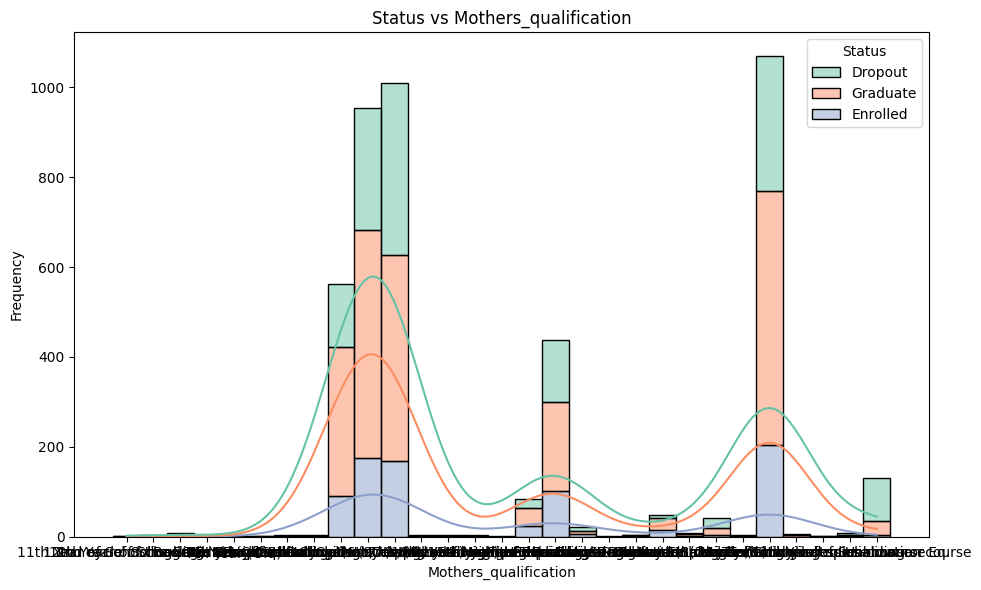

In [ ]:
plot_histogram(df_student_eda, x='Mothers_qualification', hue='Status')

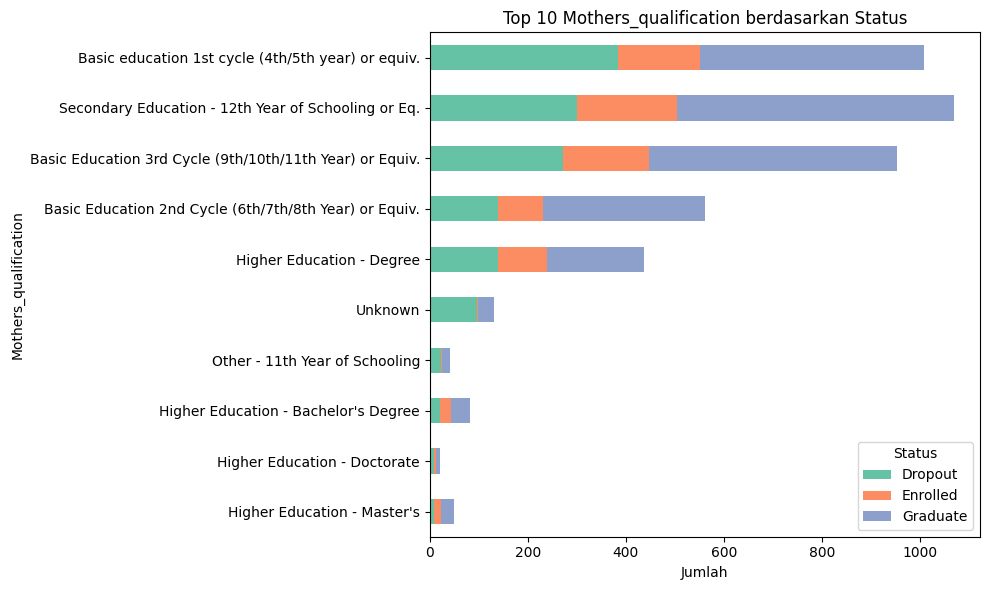

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Mothers_qualification', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Mothers_qualification`:**
- Tampak bahwa `tingkat pendidikan ibu memiliki pengaruh terhadap kemungkinan mahasiswa mengalami dropout`. Hal ini terlihat dari distribusi status mahasiswa pada kategori tingkat pendidikan tertentu, sebagaimana divisualisasikan melalui histogram bertumpuk berdasarkan status (dropout, graduate, enrolled).
- Pada `kelompok mahasiswa dropout, tingkat pendidikan ibu yang paling dominan adalah "Basic education 1st cycle (4th/5th year) or equivalent", dengan jumlah sebanyak 383 mahasiswa`. Ini menunjukkan bahwa mahasiswa yang ibunya hanya menyelesaikan pendidikan dasar memiliki kemungkinan lebih tinggi untuk mengalami dropout.
- Sebaliknya, `pada kelompok mahasiswa yang lulus (graduate), tingkat pendidikan ibu yang paling banyak adalah "Secondary Education - 12th Year of Schooling or equivalent", sebanyak 565 mahasiswa`. Hal ini mengindikasikan bahwa mahasiswa yang berasal dari ibu dengan pendidikan menengah atas memiliki kemungkinan lebih besar untuk menyelesaikan studi mereka. Tren serupa juga terlihat pada `mahasiswa yang masih terdaftar (enrolled), di mana tingkat pendidikan ibu yang dominan juga berada pada kategori pendidikan menengah`.
- Secara keseluruhan, analisis ini menunjukkan bahwa `semakin tinggi tingkat pendidikan ibu, semakin kecil kemungkinan mahasiswa mengalami dropout`. Pendidikan ibu yang lebih tinggi kemungkinan besar berkontribusi terhadap dukungan akademik dan motivasi yang lebih kuat bagi anak dalam menyelesaikan pendidikannya. Selain itu, ibu dengan pendidikan lebih tinggi mungkin juga memiliki pemahaman yang lebih baik tentang pentingnya pendidikan tinggi dan dapat mendorong anak untuk tetap berkomitmen dalam perkuliahan.

**Insight:**
- Tingkat pendidikan ibu tampaknya berkorelasi negatif dengan risiko mahasiswa mengalami dropout. Mahasiswa dengan ibu berpendidikan rendah cenderung memiliki risiko dropout lebih tinggi, sedangkan mereka yang ibunya memiliki pendidikan menengah atau lebih tinggi memiliki peluang kelulusan yang lebih besar. Insight ini dapat menjadi bahan pertimbangan dalam intervensi sosial atau akademik terhadap mahasiswa berisiko.

##### 📌 **TINGKAT PENDIDIKAN AYAH (Fathers_qualification)** DONE


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Fathers_qualification' berdasarkan 'Status':
         count unique                                                top freq
Status                                                                       
Dropout   1421     32  Basic education 1st cycle (4th/5th year) or eq...  432
Enrolled   794     13  Basic education 1st cycle (4th/5th year) or eq...  199
Graduate  2209     20  Basic education 1st cycle (4th/5th year) or eq...  578


Visualisasi:


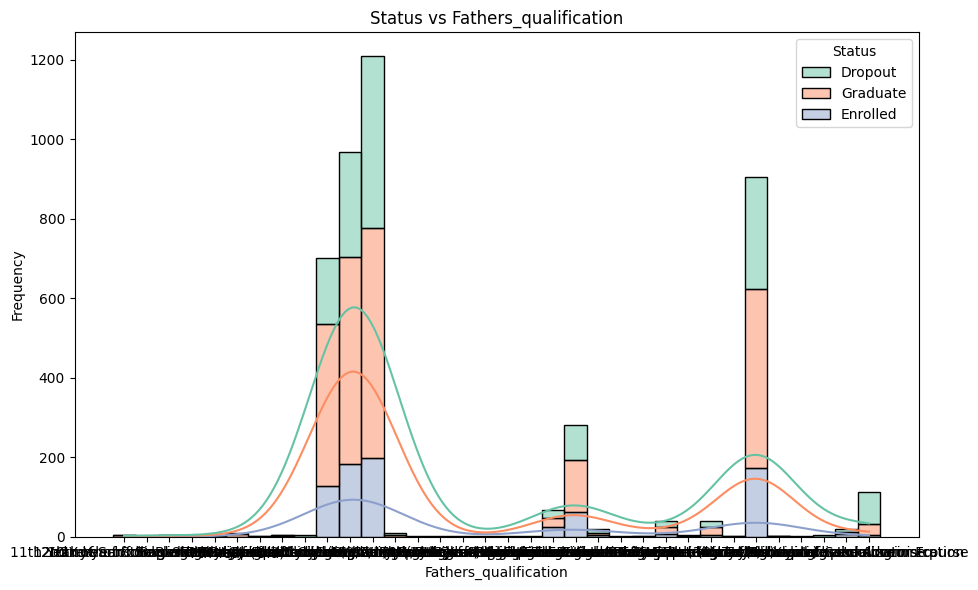

In [ ]:
plot_histogram(df_student_eda, x='Fathers_qualification', hue='Status')

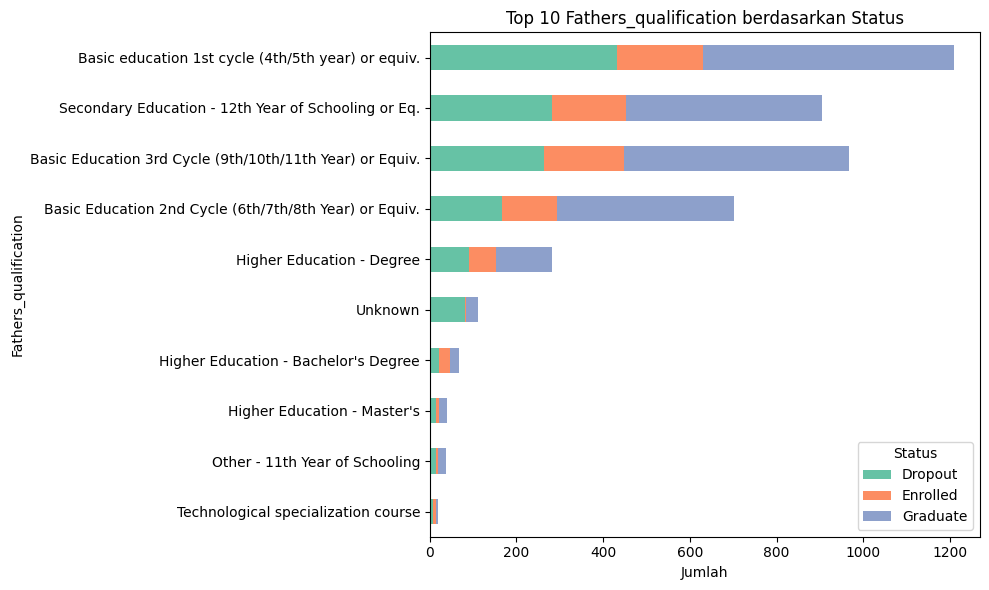

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Fathers_qualification', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Fathers_qualification`:**
- Terlihat bahwa tingkat pendidikan ayah turut berpengaruh terhadap kemungkinan mahasiswa mengalami dropout. Visualisasi berupa histogram bertumpuk menunjukkan bahwa pada semua kategori status mahasiswa—baik yang lulus, dropout, maupun masih terdaftar—kategori pendidikan ayah yang paling dominan adalah "Basic education 1st cycle (4th/5th year) or equivalent".
- Secara lebih spesifik, pada kelompok mahasiswa dropout, sebanyak 432 orang berasal dari ayah dengan latar pendidikan dasar ini, dan pada kelompok mahasiswa enrolled, jumlahnya mencapai 199 orang. Menariknya, pada kelompok mahasiswa graduate, pendidikan ayah yang dominan tetap berada di tingkat pendidikan dasar, bahkan lebih tinggi jumlahnya yaitu 578 orang. Hal ini mengindikasikan bahwa meskipun pendidikan ayah pada tingkat dasar adalah yang paling umum dalam semua kelompok, proporsinya terhadap total mahasiswa tetap berbeda.
- Untuk melihat pengaruhnya terhadap dropout, penting mempertimbangkan proporsi dalam konteks total masing-masing status. Meskipun banyak mahasiswa lulusan berasal dari ayah berpendidikan rendah, proporsi mahasiswa dropout yang berasal dari ayah berpendidikan rendah juga cukup tinggi, menunjukkan adanya kecenderungan bahwa pendidikan ayah yang rendah mungkin menjadi salah satu faktor risiko dropout. Namun, dibandingkan dengan temuan pada pendidikan ibu, pengaruh pendidikan ayah tampaknya tidak sekuat pengaruh pendidikan ibu terhadap status kelulusan mahasiswa.

**Insight:**
- Tingkat pendidikan ayah, khususnya pada level pendidikan dasar, merupakan kategori yang paling umum di seluruh status mahasiswa. Namun, jumlah mahasiswa dropout yang tinggi dari kelompok ini menunjukkan potensi hubungan antara rendahnya pendidikan ayah dan meningkatnya risiko dropout. Meski demikian, hubungan ini tampak tidak sekuat hubungan antara pendidikan ibu dan dropout, sehingga faktor lain kemungkinan juga turut memengaruhi. Insight ini tetap penting untuk dipertimbangkan dalam perumusan dukungan akademik berbasis latar belakang keluarga.

##### 📌 **JENIS PEKERJAAN IBU (Mothers_occupation)** DONE


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Mothers_occupation' berdasarkan 'Status':
         count unique                top freq
Status                                       
Dropout   1421     18  Unskilled Workers  490
Enrolled   794     27  Unskilled Workers  264
Graduate  2209     29  Unskilled Workers  823


Visualisasi:


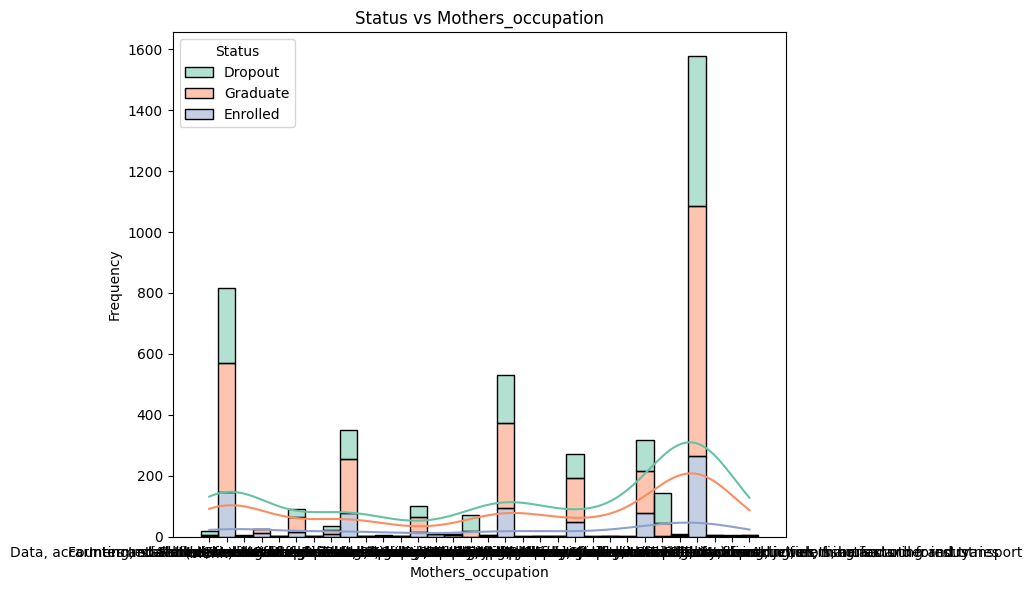

In [ ]:
plot_histogram(df_student_eda, x='Mothers_occupation', hue='Status')

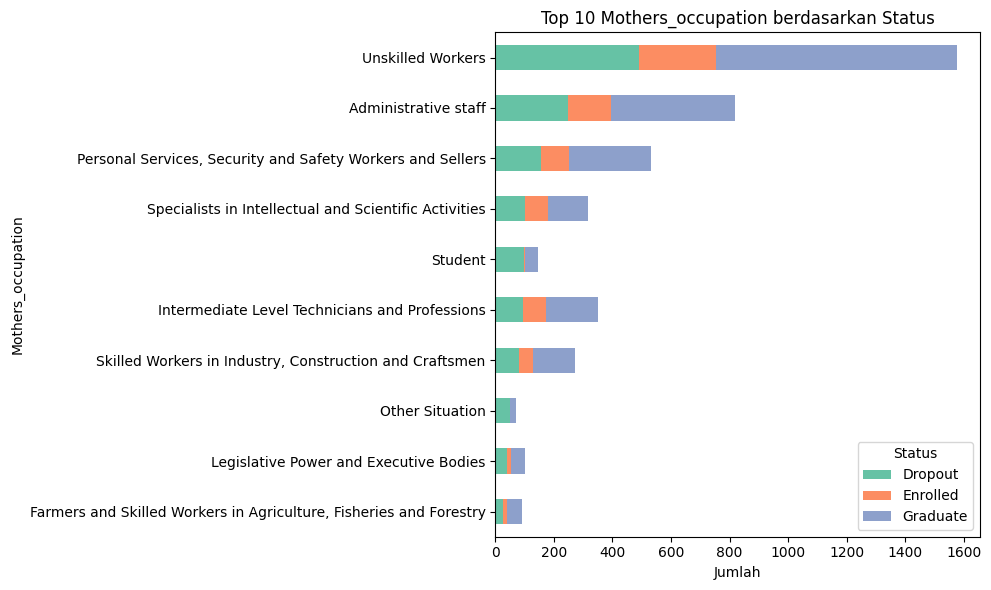

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Mothers_occupation', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Mothers_occupation`:**
- Terdapat variasi pekerjaan ibu yang cukup luas di antara mahasiswa dengan status akademik yang berbeda, dengan jumlah kategori unik mencapai 29 pada kelompok mahasiswa yang lulus (Graduate), 27 pada kelompok Enrolled, dan 18 pada kelompok Dropout. Ini menunjukkan bahwa mahasiswa yang berhasil lulus cenderung berasal dari latar belakang yang lebih beragam dalam hal pekerjaan ibu.
- Dari sisi frekuensi, kategori "Unskilled Workers" (pekerja tidak terampil) mendominasi pada ketiga kelompok status. Sebanyak 823 mahasiswa Graduate (sekitar 37% dari total Graduate), 490 Dropout, dan 264 Enrolled berasal dari ibu yang bekerja sebagai pekerja tidak terampil. Ini menunjukkan bahwa latar belakang pekerjaan ibu sebagai pekerja tidak terampil merupakan yang paling umum di seluruh populasi, tanpa memperhatikan status kelulusan.
- Selanjutnya, pekerjaan ibu di kategori "Administrative staff" dan "Personal Services, Security and Safety Workers and Sellers" juga memiliki jumlah lulusan (Graduate) yang lebih tinggi dibanding dropout, menunjukkan bahwa jenis pekerjaan dengan keterampilan menengah mungkin memberikan dukungan sosial ekonomi yang lebih stabil, yang bisa berdampak positif pada keberlangsungan studi anak.
- Sebaliknya, pada kategori seperti "Other Situation", "Student", atau "Legislative Power and Executive Bodies", meskipun jumlah totalnya jauh lebih sedikit, distribusi statusnya relatif merata atau bahkan didominasi oleh Graduate, yang bisa menunjukkan adanya peran faktor lain seperti pendidikan atau dukungan sosial dalam rumah tangga yang mungkin lebih tinggi.

**Insight:**
- Jenis pekerjaan ibu dapat berperan sebagai indikator tidak langsung terhadap potensi keberhasilan akademik mahasiswa. Oleh karena itu, fitur `Mothers_occupation` memiliki potensi sebagai variabel prediktif dalam model machine learning untuk mengidentifikasi mahasiswa dengan risiko dropout. Tentunya, untuk mengkonfirmasi kekuatan prediktifnya, perlu dilakukan pengujian lebih lanjut melalui teknik feature selection atau model interpretability seperti SHAP atau permutation importance.

##### 📌 **JENIS PEKERJAAN AYAH (Fathers_occupation)** DONE


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Fathers_occupation' berdasarkan 'Status':
         count unique                top freq
Status                                       
Dropout   1421     18  Unskilled Workers  323
Enrolled   794     33  Unskilled Workers  163
Graduate  2209     40  Unskilled Workers  524


Visualisasi:


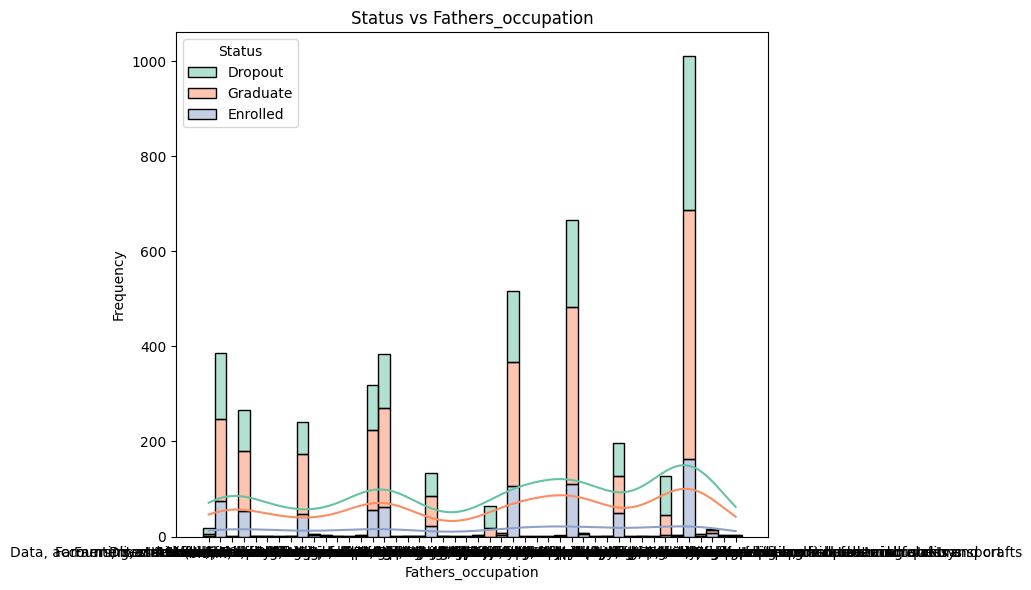

In [ ]:
plot_histogram(df_student_eda, x='Fathers_occupation', hue='Status')

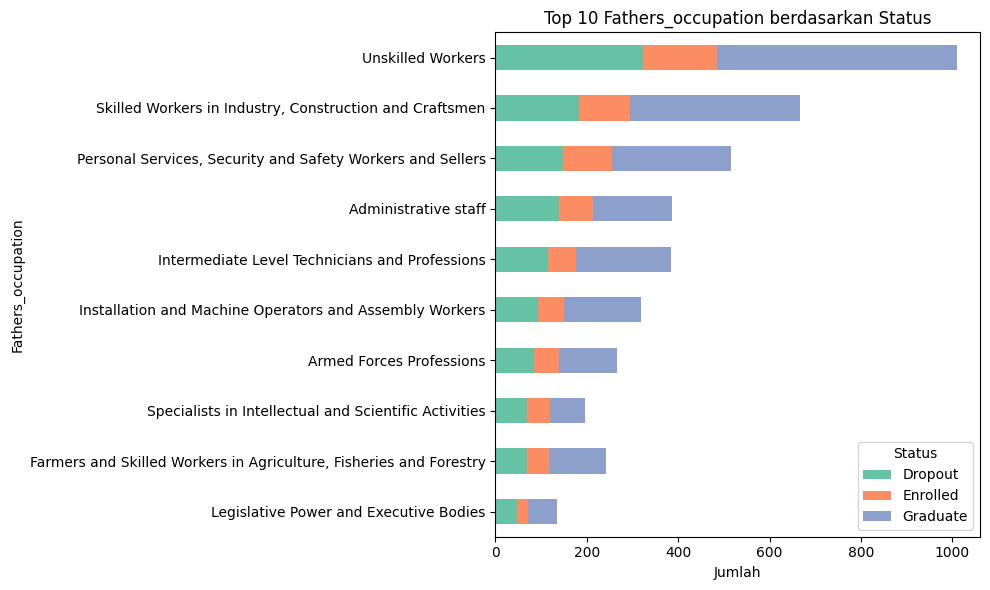

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Fathers_occupation', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Fathers_occupation`:**
- Terlihat bahwa kategori pekerjaan "Unskilled Workers" muncul sebagai jenis pekerjaan yang paling umum di semua kelompok status, dengan frekuensi tertinggi pada mahasiswa yang lulus (Graduate) sebanyak 524 orang, diikuti oleh Dropout (323) dan Enrolled (163). Ini menunjukkan bahwa meskipun banyak mahasiswa yang lulus berasal dari ayah yang bekerja di sektor tidak terampil, proporsi dropout dalam kategori ini juga cukup tinggi—sekitar 22,7% dari total Dropout berasal dari kelompok ini. Artinya, faktor ekonomi atau keterbatasan dukungan akademik di lingkungan rumah mempengaruhi kelangsungan studi mereka.
- Selain itu, pekerjaan seperti "Skilled Workers in Industry, Construction and Craftsmen" serta "Personal Services, Security and Safety Workers and Sellers" juga memiliki distribusi yang cukup besar untuk mahasiswa dropout. Ketiga kategori ini didominasi oleh pekerjaan dengan karakteristik tenaga kerja kasar atau layanan yang mungkin tidak memberikan ekspektasi atau tekanan akademik tinggi kepada anak-anaknya, atau justru terbebani oleh kebutuhan ekonomi.
- Sebaliknya, kategori pekerjaan seperti "Specialists in Intellectual and Scientific Activities" dan "Legislative Power and Executive Bodies" menunjukkan jumlah dropout yang jauh lebih sedikit dibandingkan lulusan, meskipun total frekuensinya lebih rendah. Ini mengindikasikan bahwa pekerjaan ayah di bidang profesional atau birokrasi tinggi mungkin memberikan pengaruh positif pada aspirasi pendidikan dan stabilitas dukungan belajar, yang berdampak pada peluang kelulusan lebih tinggi.
- Jumlah kategori unik pekerjaan ayah meningkat pada status Graduate (40 kategori), dibanding Dropout (18) dan Enrolled (33). Ini menunjukkan bahwa mahasiswa yang berasal dari latar belakang pekerjaan ayah yang lebih beragam termasuk pekerjaan profesional atau teknis cenderung memiliki peluang lebih besar untuk menyelesaikan studi mereka. Keberagaman ini juga mencerminkan kemungkinan adanya pengaruh positif dari latar belakang sosial ekonomi yang lebih stabil.

**Insight:**
- Fitur `Fathers_occupation` memiliki potensi yang cukup kuat untuk dijadikan variabel prediktif dalam model machine learning. Kategori pekerjaan dapat membantu mengindikasikan tingkat risiko mahasiswa mengalami dropout, terutama jika dikombinasikan dengan fitur sosiodemografis lainnya seperti pekerjaan ibu, pendidikan orang tua, atau dukungan finansial. Informasi ini sangat berguna untuk strategi intervensi preventif atau pemberian beasiswa berbasis risiko sosial-ekonomi.

##### 📌 **METODE PENDAFTARAN (Application_mode)** DONE


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Application_mode' berdasarkan 'Status':
         count unique                             top  freq
Status                                                     
Dropout   1421     17               Over 23 Years Old   435
Enrolled   794     13  1st Phase - General Contingent   300
Graduate  2209     16  1st Phase - General Contingent  1063


Visualisasi:


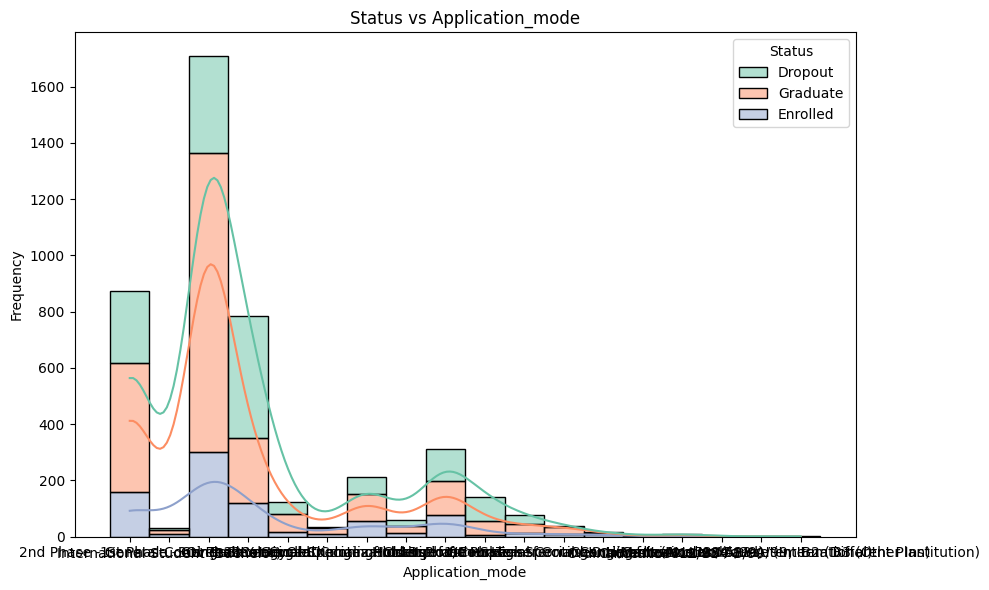

In [ ]:
plot_histogram(df_student_eda, x='Application_mode', hue='Status')

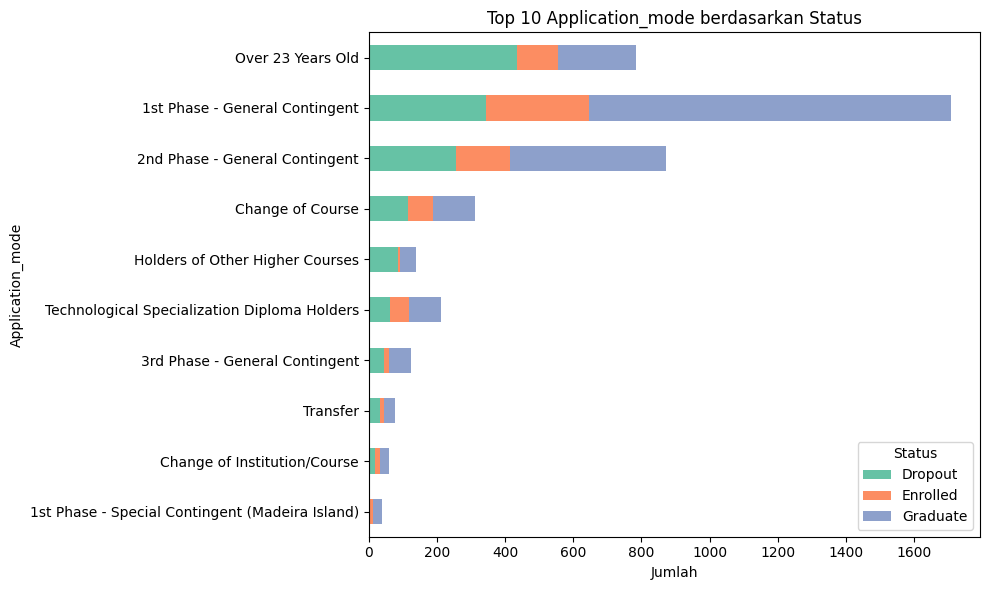

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Application_mode', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Application_mode`:**
- Tampaknya jalur masuk mahasiswa memiliki hubungan yang cukup signifikan terhadap status kelulusan, khususnya terhadap kemungkinan mahasiswa mengalami dropout. Dari ringkasan statistik, diketahui bahwa jalur "Over 23 Years Old" menjadi metode pendaftaran paling umum di antara mahasiswa yang dropout (sebesar 435 dari 1.421 mahasiswa dropout), sementara jalur "1st Phase - General Contingent" mendominasi jumlah mahasiswa yang lulus (1.063 dari 2.209 mahasiswa graduate).
- Hal ini mengindikasikan bahwa mahasiswa yang masuk melalui jalur "Over 23 Years Old" cenderung memiliki risiko putus kuliah lebih tinggi. Hal ini dapat disebabkan oleh berbagai faktor, seperti tanggung jawab keluarga, pekerjaan tetap, atau keterbatasan waktu dan sumber daya belajar karena usia dan komitmen lain di luar kampus. Sebaliknya, mahasiswa yang diterima melalui jalur reguler "1st Phase - General Contingent" menunjukkan tingkat kelulusan yang jauh lebih tinggi, yang bisa dikaitkan dengan kesiapan akademik yang lebih baik, usia yang lebih muda, dan kemungkinan besar baru saja menyelesaikan pendidikan menengah.
- Selain itu, metode pendaftaran seperti "1st Phase - General Contingent" juga cukup dominan pada mahasiswa enrolled, meskipun tidak sebanyak pada graduate, menunjukkan bahwa mahasiswa dari jalur ini cenderung menyelesaikan pendidikan tepat waktu atau masih aktif melanjutkan studinya.

**Insight:**
- Fitur `Application_mode` berpotensi menjadi variabel prediktif yang cukup kuat dalam model machine learning untuk memprediksi status mahasiswa (dropout, graduate, enrolled). Jalur masuk mahasiswa merupakan faktor penting yang dapat memengaruhi keberhasilan studi, dan strategi pencegahan dropout sebaiknya difokuskan pada mahasiswa yang diterima melalui jalur alternatif seperti "Over 23 Years Old", misalnya dengan dukungan akademik tambahan atau fleksibilitas waktu studi.

##### 📌 **URUTAN PREFERENSI PENDAFTARAN (Application_order)** DONE


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Application_order' berdasarkan 'Status':
           count  mean   std  min  25%  50%  75%  max
Status                                               
Dropout   1421.0  1.59  1.22  1.0  1.0  1.0  2.0  6.0
Enrolled   794.0  1.63  1.21  1.0  1.0  1.0  2.0  9.0
Graduate  2209.0  1.85  1.40  0.0  1.0  1.0  2.0  6.0


Visualisasi:


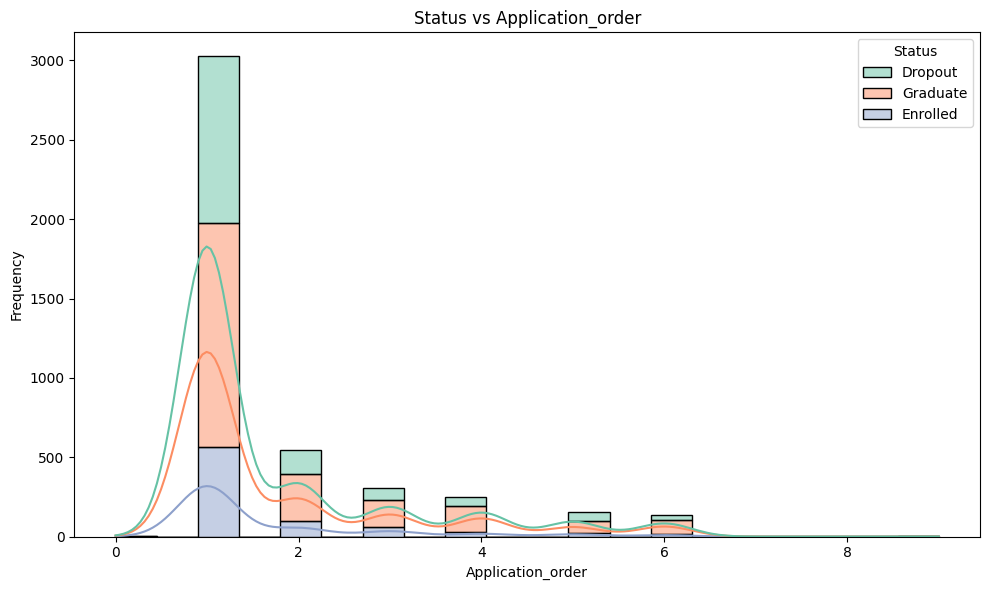

In [ ]:
plot_histogram(df_student_eda, x='Application_order', hue='Status')

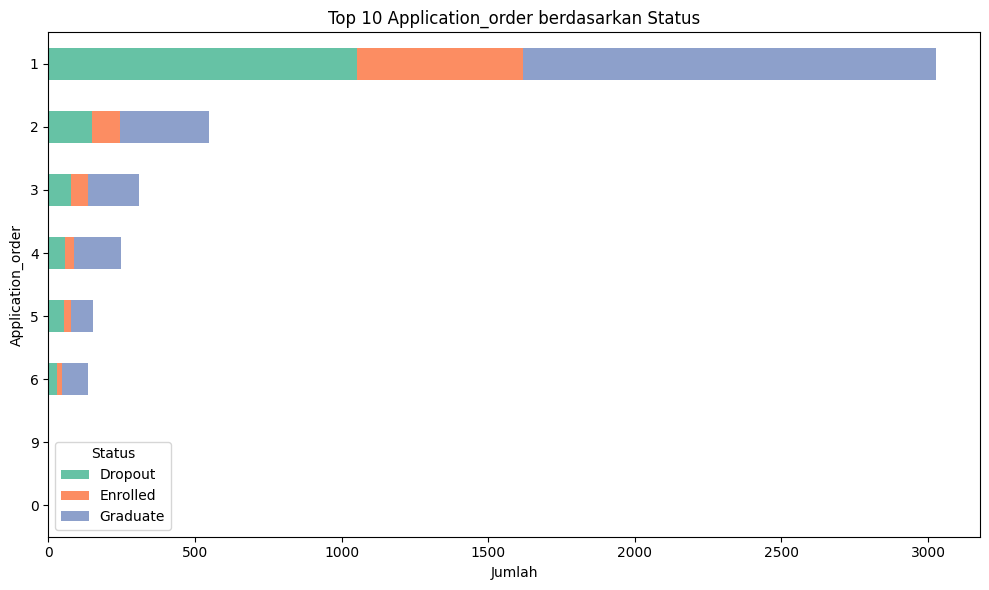

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Application_order', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Application_order`:**
- Terdapat indikasi bahwa urutan pilihan memang memiliki keterkaitan dengan risiko dropout mahasiswa, meskipun hubungan tersebut tidak terlalu kuat secara statistik. Sebagian besar mahasiswa memiliki Application_order = 1, artinya mereka diterima pada program studi pilihan utama. Mahasiswa yang memilih program studi sebagai pilihan utama (order = 1) tampaknya lebih mungkin untuk menyelesaikan studi, terbukti dari tingginya jumlah lulusan pada nilai tersebut.
- Sementara itu, mahasiswa Dropout menunjukkan penurunan drastis setelah urutan 1 dan 2. Hal ini mengindikasikan bahwa mahasiswa yang masuk ke program bukan pilihan utama mereka berisiko lebih tinggi mengalami dropout.
- Peningkatan angka Dropout terlihat pada urutan selanjutnya (2 hingga 5), meskipun masih didominasi oleh lulusan. Ini mengindikasikan bahwa mahasiswa yang tidak diterima pada pilihan pertama dan akhirnya masuk ke pilihan ke-2, ke-3, dst, mungkin memiliki komitmen atau minat yang lebih rendah terhadap program studi yang mereka jalani, yang berkontribusi terhadap kemungkinan dropout.
- Secara keseluruhan, meskipun terdapat perbedaan rata-rata dan penyebaran nilai Application_order antar kelompok status mahasiswa, perbedaannya tidak terlalu besar secara statistik. Namun, pola distribusi yang muncul melalui visualisasi memberikan indikasi bahwa urutan pilihan program studi dapat menjadi sinyal risiko dropout, terutama jika mahasiswa tidak masuk ke pilihan utamanya.

**Insight:**
- Urutan pilihan program studi berhubungan dengan risiko dropout. Mahasiswa yang masuk pada program pilihan utama (urutan 1) memiliki kemungkinan lebih tinggi untuk menyelesaikan pendidikan. Fitur `Application_order` tetap relevan untuk digunakan dalam model prediksi, khususnya sebagai variabel ordinal yang bisa menangkap kecenderungan dropout jika dikombinasikan dengan fitur lain yang lebih kuat secara prediktif

##### 📌 **PROGRAM STUDI (Course)** DONE


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Course' berdasarkan 'Status':
         count unique                              top freq
Status                                                     
Dropout   1421     17  Management (evening attendance)  136
Enrolled   794     17                       Management  108
Graduate  2209     17                          Nursing  548


Visualisasi:


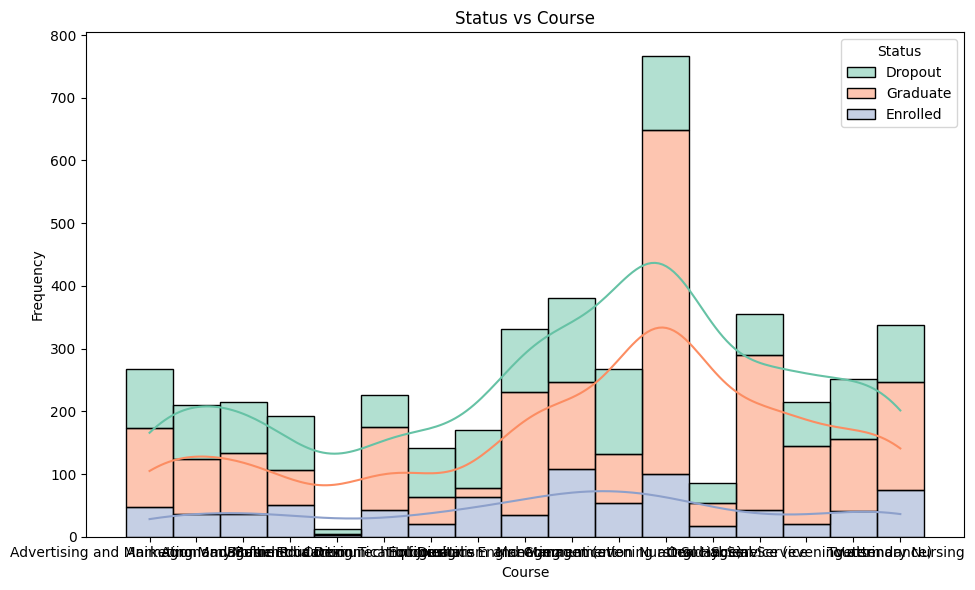

In [ ]:
plot_histogram(df_student_eda, x='Course', hue='Status')

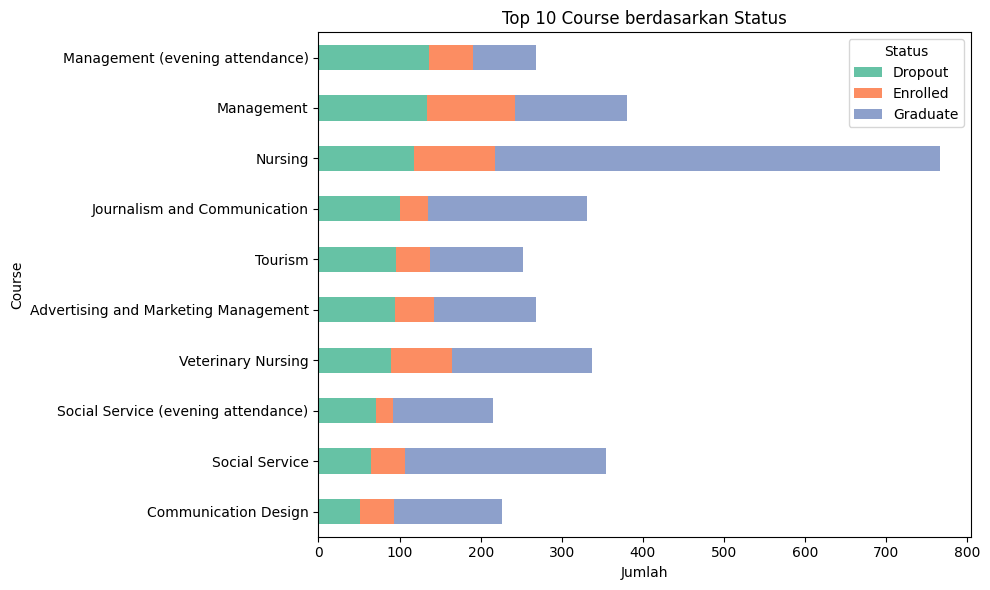

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Course', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Course`:**
- Terlihat bahwa terdapat variasi tingkat dropout yang cukup mencolok antar program studi, yang dapat memberikan insight penting dalam pemodelan prediksi keberhasilan studi mahasiswa. Secara umum, dari total 4424 data, mahasiswa dengan status Graduate mendominasi dengan persentase sebesar 49.9%, disusul oleh Dropout sebesar 32.1%, dan Enrolled sebesar 17.9%. Namun, ketika dilihat lebih dalam berdasarkan program studi, tampak adanya distribusi yang berbeda untuk tiap status.
- Pada mahasiswa yang dropout, program studi dengan jumlah dropout tertinggi adalah Management (evening attendance), yang mencapai 136 mahasiswa. Hal ini menunjukkan bahwa program studi tersebut memiliki kontribusi signifikan terhadap jumlah total dropout dan bisa menjadi perhatian khusus. Pola ini dapat disebabkan oleh berbagai faktor, seperti beban kerja ganda karena kelas malam, mahasiswa yang bekerja sambil kuliah, atau tingkat kesiapan akademik yang berbeda.
- Sementara itu, mahasiswa yang enrolled paling banyak berasal dari program studi Management dengan 108 mahasiswa. Ini menunjukkan bahwa Management (reguler) masih memiliki jumlah mahasiswa aktif cukup tinggi, namun juga bisa mengindikasikan adanya potensi dropout atau kelulusan di masa mendatang tergantung pada faktor-faktor lanjutan.
- Menariknya, mahasiswa Graduate paling banyak berasal dari program studi Nursing, dengan jumlah kelulusan mencapai 548 mahasiswa. Hal ini mencerminkan bahwa program studi ini cenderung memiliki tingkat kelulusan yang tinggi dan mungkin didukung oleh sistem pembelajaran, seleksi masuk, atau motivasi mahasiswa yang lebih baik.
- Visualisasi tambahan seperti stacked histogram dan kurva KDE memperkuat temuan ini dengan menunjukkan bahwa distribusi dropout dan graduate memang tidak merata di seluruh program studi. Beberapa program studi memiliki kecenderungan dropout yang lebih tinggi dibanding yang lain, terutama pada kelas-kelas malam seperti Management (evening attendance).

**Insight:**
- Program studi tertentu memiliki tingkat dropout yang lebih tinggi dibanding yang lain, khususnya pada program evening attendance. Oleh karena itu, fitur Course sangat relevan untuk dimasukkan dalam model prediksi status mahasiswa, karena memberikan informasi yang kuat terkait kecenderungan keberhasilan atau kegagalan studi.

##### 📌 **NILAI MASUK MAHASISWA (Admission_grade)** DONE


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Admission_grade' berdasarkan 'Status':
           count    mean    std   min    25%    50%     75%    max
Status                                                            
Dropout   1421.0  124.96  15.13  95.0  115.0  123.6  133.00  190.0
Enrolled   794.0  125.53  13.79  95.0  117.0  124.1  133.28  190.0
Graduate  2209.0  128.79  14.07  95.0  119.7  127.4  136.40  190.0


Visualisasi:


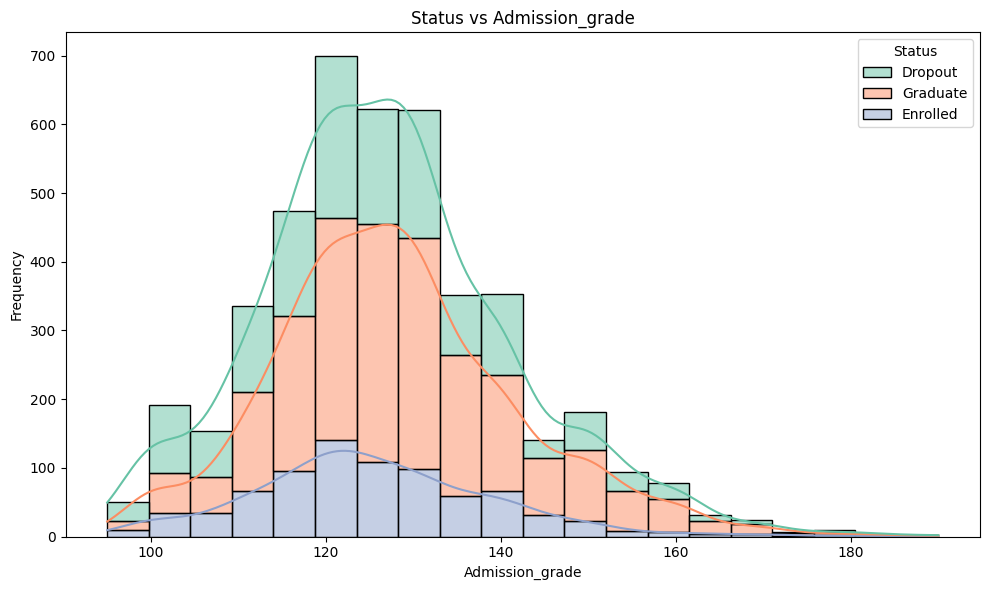

In [ ]:
plot_histogram(df_student_eda, x='Admission_grade', hue='Status')

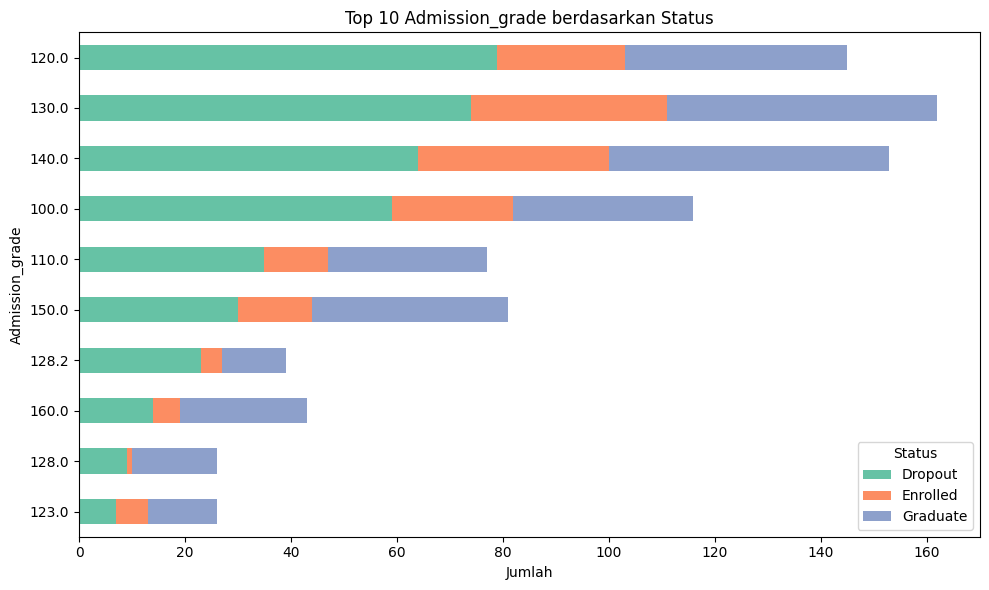

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Admission_grade', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Admission_grade`:**
- Terlihat adanya hubungan yang cukup jelas antara tingkat nilai masuk dan status mahasiswa (dropout, graduate, enrolled). Mahasiswa yang dropout memiliki nilai masuk rata-rata paling rendah, yaitu 124.96, dibandingkan dengan mahasiswa yang masih aktif (125.53) maupun yang berhasil lulus (128.79). Selain itu, nilai median dan kuartil bawah (25%) pada kelompok dropout juga lebih rendah dibandingkan dua kelompok lainnya, yang menunjukkan bahwa distribusi nilai mereka cenderung lebih rendah secara keseluruhan.
- Visualisasi stacked histogram dan kurva KDE mendukung temuan ini, di mana kurva untuk status dropout cenderung bergeser ke kiri, menunjukkan konsentrasi pada nilai-nilai yang lebih rendah. Sebaliknya, kurva untuk graduate cenderung berada lebih ke kanan, mengindikasikan nilai masuk yang relatif lebih tinggi pada mahasiswa yang berhasil menyelesaikan studi mereka.

**Insight:**
- Nilai masuk yang lebih rendah tampaknya berkontribusi pada peningkatan risiko dropout. Hal ini dapat disebabkan oleh beberapa faktor, seperti kesiapan akademik yang kurang, kemampuan adaptasi yang rendah terhadap tuntutan perkuliahan, atau motivasi belajar yang tidak stabil. Fitur `Admission_grade` terbukti sebagai indikator penting dalam memahami pola keberhasilan akademik mahasiswa dan sangat relevan untuk dimasukkan dalam model prediktif untuk mengidentifikasi potensi dropout sejak awal masa studi.

#### **c. Analisis Performa Akademik**

```
Tujuan:
1. Bagaimana distribusi status mahasiswa (Dropout vs Not Dropout) jika dilihat dari kinerja akademik mereka?
2. Apakah terdapat pola atau ketimpangan tertentu pada tingkat kinerja akademik yang berkaitan dengan kemungkinan mahasiswa mengalami dropout?
3. Apakah fitur tertentu pada performa akademik berpotensi sebagai variabel prediktif dalam model machine learning untuk memprediksi risiko dropout?
```

| **Fitur**                                | **Pertanyaan Analisis**                                                                        |
| ---------------------------------------- | ---------------------------------------------------------------------------------------------- |
| `Curricular units 1st sem (enrolled)`    | Apakah mahasiswa yang mengambil lebih banyak mata kuliah di semester 1 lebih berisiko dropout? |
| `Curricular units 1st sem (evaluations)` | Apakah jumlah evaluasi yang diikuti di semester 1 berkaitan dengan status dropout?             |
| `Curricular units 1st sem (approved)`    | Apakah mahasiswa yang tidak banyak meluluskan mata kuliah di semester 1 cenderung dropout?     |
| `Curricular units 1st sem (grade)`       | Apakah nilai akademik semester 1 memiliki korelasi dengan kemungkinan dropout?                 |
| `Curricular units 2nd sem (enrolled)`    | Apakah jumlah mata kuliah yang diambil di semester 2 memengaruhi tingkat dropout?              |
| `Curricular units 2nd sem (evaluations)` | Apakah keterlibatan dalam evaluasi semester 2 berhubungan dengan risiko dropout?               |
| `Curricular units 2nd sem (approved)`    | Apakah mahasiswa yang tidak banyak lulus mata kuliah di semester 2 lebih berpotensi dropout?   |
| `Curricular units 2nd sem (grade)`       | Apakah performa akademik semester 2 memengaruhi kemungkinan dropout?                           |
| `Scholarship holder`                     | Apakah penerima beasiswa memiliki tingkat dropout yang lebih rendah dibanding non-penerima?    |
| `Educational special needs`              | Apakah mahasiswa dengan kebutuhan khusus memiliki kecenderungan lebih tinggi untuk dropout?    |
| **Visualisasi**                          | Boxplot, violin plot, heatmap korelasi, dan stacked histogram berdasarkan status mahasiswa     |


In [ ]:
df_student_eda.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nationality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

##### 📌 **MATA KULIAH YANG DIAMBIL DI SEMESTER 1 (Curricular_units_1st_sem_enrolled)**


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Curricular_units_1st_sem_enrolled' berdasarkan 'Status':
           count  mean   std  min  25%  50%  75%   max
Status                                                
Dropout   1421.0  5.82  2.33  0.0  5.0  6.0  6.0  21.0
Enrolled   794.0  5.96  1.99  0.0  5.0  6.0  6.0  17.0
Graduate  2209.0  6.67  2.66  0.0  6.0  6.0  7.0  26.0


Visualisasi:


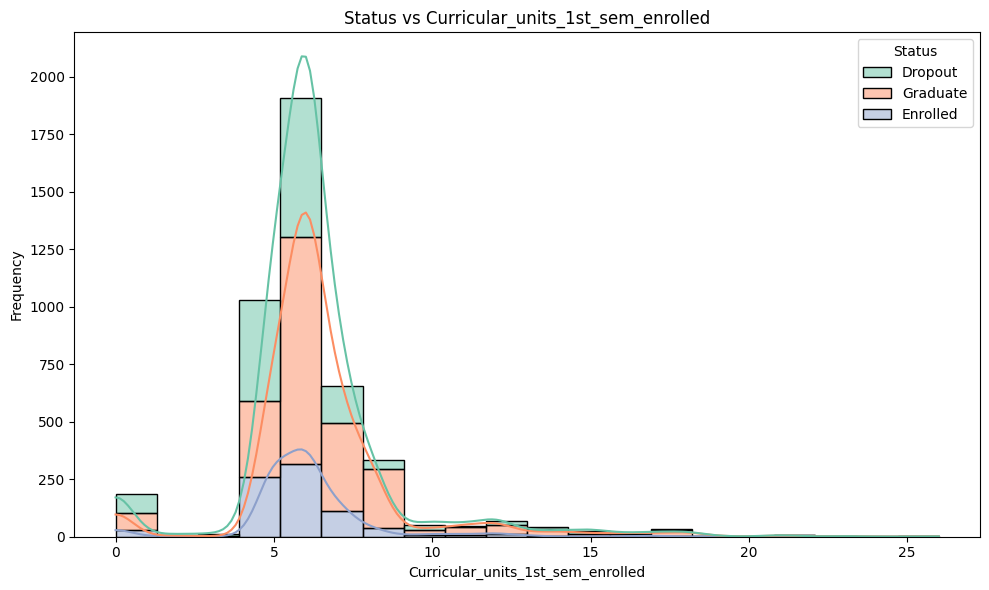

In [ ]:
plot_histogram(df_student_eda, x='Curricular_units_1st_sem_enrolled', hue='Status')

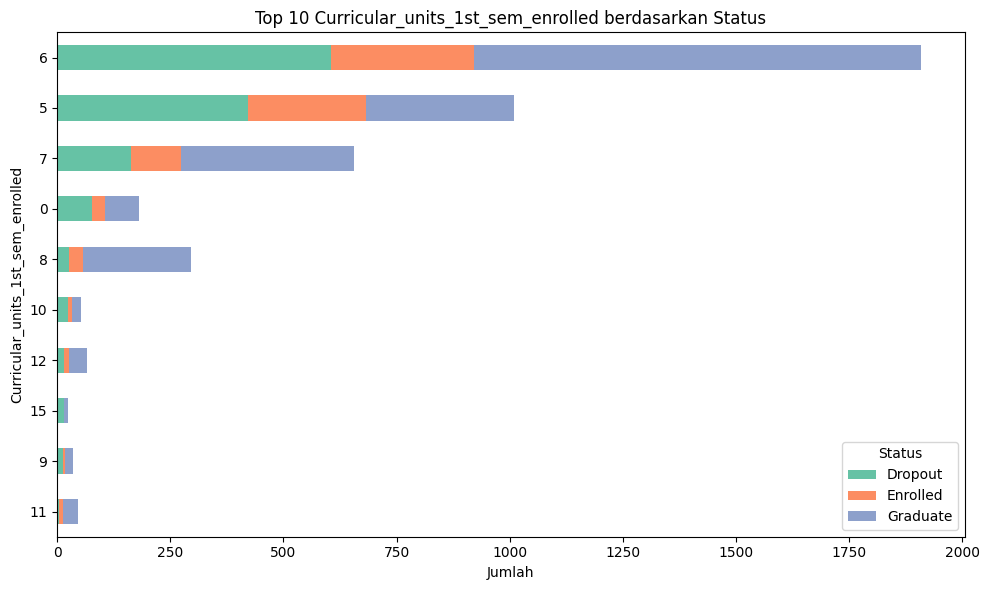

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Curricular_units_1st_sem_enrolled', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Curricular_units_1st_sem_enrolled`:**
- Terdapat indikasi yang cukup kuat bahwa jumlah mata kuliah yang diambil berkaitan dengan status akhir mahasiswa. Mahasiswa yang dropout tercatat mengambil rata-rata 5,82 mata kuliah, lebih sedikit dibandingkan mahasiswa yang masih enrolled (5,96) maupun yang graduate (6,67). Selisih ini, meskipun tampak tidak besar secara numerik, tetap memberikan gambaran bahwa mahasiswa yang mengambil lebih sedikit mata kuliah cenderung memiliki risiko dropout yang lebih tinggi.
- Distribusi statistik juga mendukung temuan ini. Kuartil bawah (Q1) hingga median (Q2) untuk kelompok dropout tetap pada angka 5 hingga 6 mata kuliah, sedangkan pada kelompok graduate, median dan kuartil atas mencapai 6 hingga 7 mata kuliah, menunjukkan bahwa lulusan cenderung mengambil beban akademik yang sedikit lebih tinggi sejak awal. Hal ini mungkin mencerminkan kesiapan, motivasi, atau strategi belajar yang lebih baik dari mahasiswa yang berhasil menyelesaikan studi.
- Terlihat bahwa kurva mahasiswa graduate lebih condong ke kanan (jumlah mata kuliah lebih banyak), sementara kurva dropout lebih tersebar ke kiri, terutama pada rentang mata kuliah yang lebih sedikit. Kondisi ini memperkuat dugaan bahwa mahasiswa yang mengambil beban akademik rendah sejak semester pertama bisa jadi kurang terlibat secara aktif dalam kegiatan perkuliahan, atau mungkin memiliki hambatan non-akademik seperti adaptasi atau kendala pribadi yang membuat mereka membatasi jumlah mata kuliah.

**Insight:**
- Fitur `Curricular_units_1st_sem_enrolled` berpotensi menjadi indikator prediktif yang signifikan dalam model machine learning untuk mengidentifikasi mahasiswa yang berisiko dropout. Beban akademik awal yang rendah bisa menjadi sinyal peringatan dini yang layak untuk dianalisis lebih lanjut dalam sistem intervensi dini di perguruan tinggi.

##### 📌 **MATA KULIAH YANG DINILAI DI SEMESTER 1 (Curricular_units_1st_sem_evaluations)**


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Curricular_units_1st_sem_evaluations' berdasarkan 'Status':
           count  mean   std  min  25%  50%   75%   max
Status                                                 
Dropout   1421.0  7.75  4.92  0.0  5.0  8.0  11.0  31.0
Enrolled   794.0  9.34  3.46  0.0  7.0  9.0  11.0  24.0
Graduate  2209.0  8.28  3.81  0.0  6.0  8.0   9.0  45.0


Visualisasi:


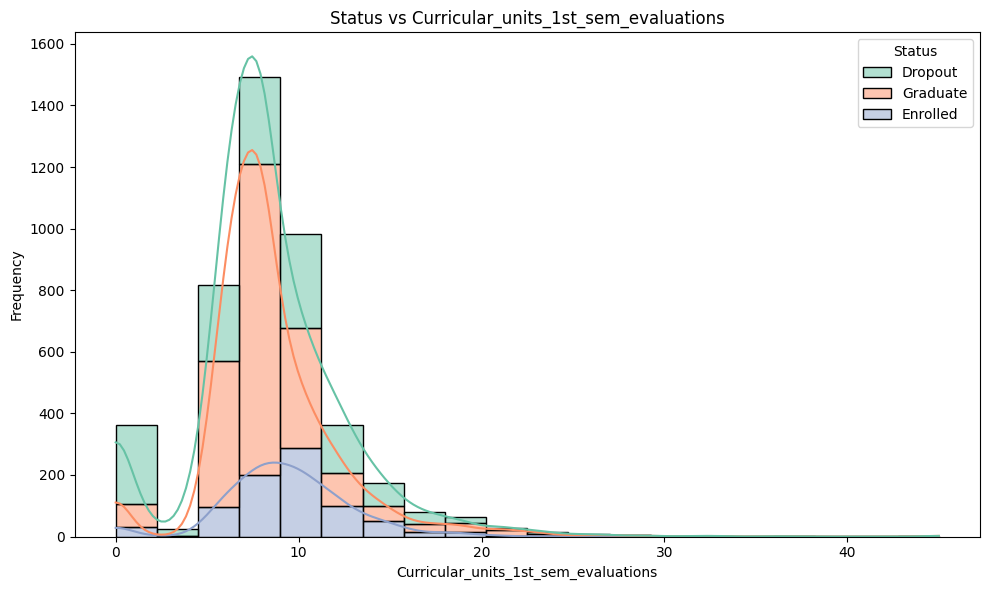

In [ ]:
plot_histogram(df_student_eda, x='Curricular_units_1st_sem_evaluations', hue='Status')

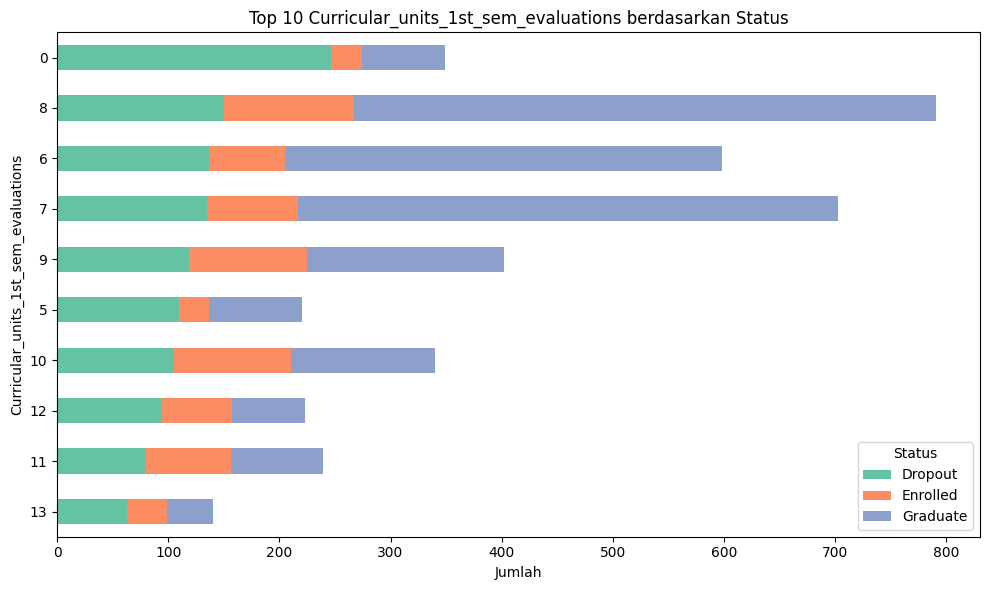

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Curricular_units_1st_sem_evaluations', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Curricular_units_1st_sem_enrolled`:**
- Terlihat bahwa terdapat hubungan yang cukup jelas antara partisipasi mahasiswa dalam nilai akademik awal dan status akhir mereka. Mahasiswa yang dropout memiliki rata-rata jumlah nilai sebesar 7,75, lebih rendah dibandingkan mahasiswa yang masih enrolled (9,34) maupun yang graduate (8,28). Hal ini mengindikasikan bahwa mahasiswa yang menjalani lebih sedikit penilaian akademik di semester pertama berpotensi memiliki risiko lebih tinggi untuk dropout.
- Kelompok dropout memiliki kuartil bawah sebesar 5 dan median 8, sedangkan kelompok graduate memiliki median yang sama (8), namun dengan distribusi yang lebih sempit (kuartil atas 9) dan nilai maksimum yang lebih tinggi (45, dibandingkan dengan 31 pada dropout). Menariknya, meskipun mahasiswa enrolled memiliki rata-rata tertinggi (9,34), hal ini bisa jadi disebabkan oleh keberadaan mahasiswa yang masih aktif dan memiliki beban nilai yang tinggi namun belum lulus, sehingga masih belum dapat diklasifikasikan secara final.
- Kurva distribusi mahasiswa dropout lebih menyebar ke kiri, menandakan banyaknya mahasiswa dropout dengan sedikit mata kuliah yang dinilai. Sebaliknya, kurva graduate dan enrolled lebih terkonsentrasi pada rentang nilai yang lebih tinggi, menunjukkan keterlibatan yang lebih besar dalam kegiatan akademik semester awal.

**Insight:**
- Tingkat partisipasi dalam nilai semester awal berkaitan erat dengan keberlangsungan studi mahasiswa. Mahasiswa yang tidak mengikuti atau menyelesaikan banyak nilai akademik di semester pertama kemungkinan menghadapi kesulitan dalam adaptasi akademik atau mengalami masalah non-akademik yang memengaruhi keikutsertaan mereka. Oleh karena itu, fitur `Curricular_units_1st_sem_evaluations` merupakan indikator yang penting dan layak digunakan dalam model prediksi dropout untuk mendeteksi potensi risiko secara dini.

##### 📌 **MATA KULIAH YANG LULUS DI SEMESTER 1 (Curricular_units_1st_sem_approved)**


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Curricular_units_1st_sem_approved' berdasarkan 'Status':
           count  mean   std  min  25%  50%  75%   max
Status                                                
Dropout   1421.0  2.55  2.86  0.0  0.0  2.0  4.0  21.0
Enrolled   794.0  4.32  2.29  0.0  3.0  5.0  6.0  15.0
Graduate  2209.0  6.23  2.58  0.0  5.0  6.0  7.0  26.0


Visualisasi:


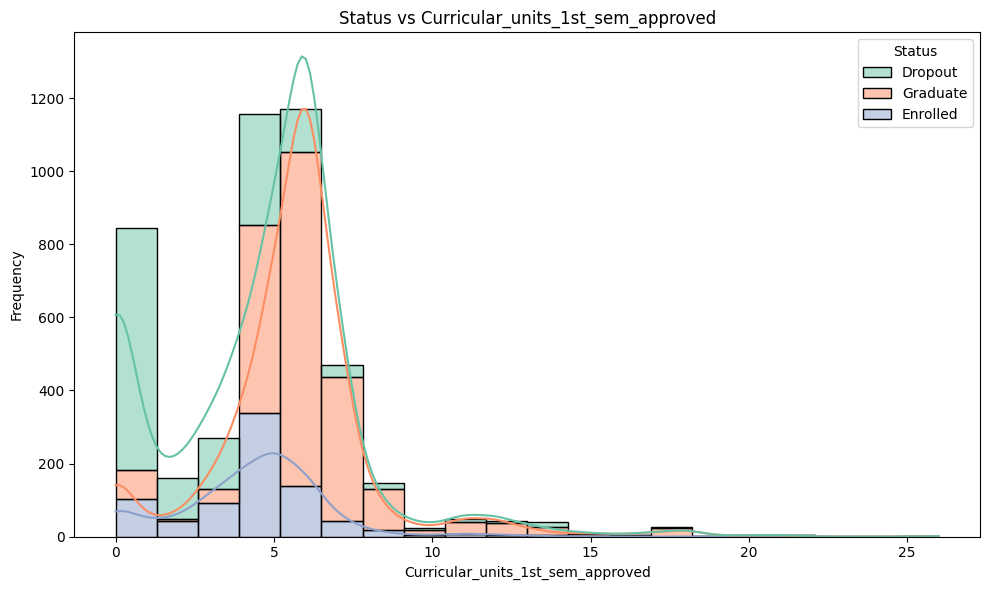

In [ ]:
plot_histogram(df_student_eda, x='Curricular_units_1st_sem_approved', hue='Status')

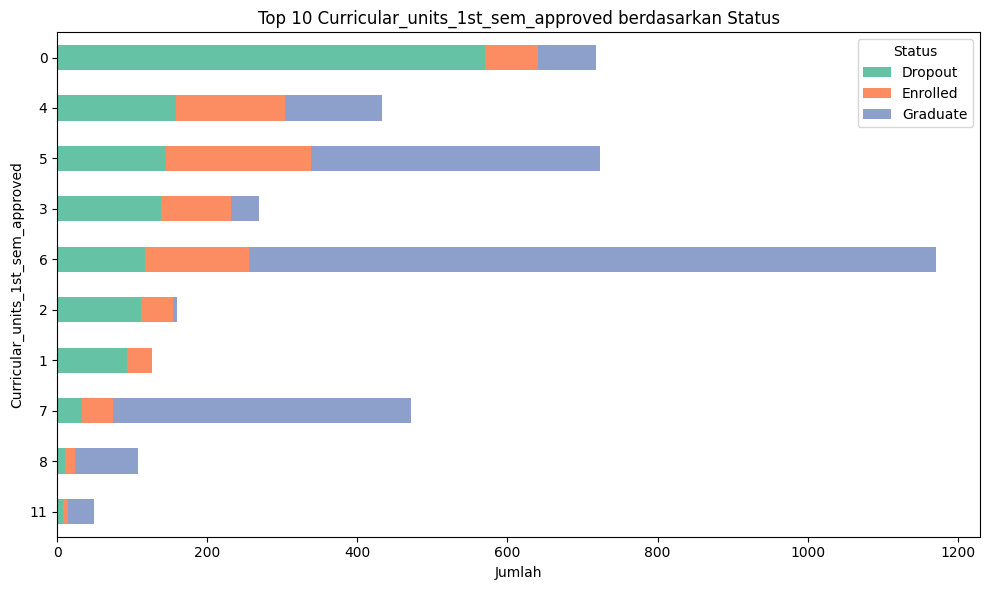

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Curricular_units_1st_sem_approved', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Curricular_units_1st_sem_approved`:**
- Terlihat adanya hubungan yang kuat antara kemampuan mahasiswa dalam meluluskan mata kuliah awal dengan status akademik akhir mereka. Mahasiswa yang dropout memiliki rata-rata kelulusan mata kuliah semester pertama sebesar 2,55, jauh lebih rendah dibandingkan mahasiswa enrolled (4,32) maupun graduate (6,23). Ini menunjukkan bahwa mahasiswa yang gagal meluluskan banyak mata kuliah sejak awal cenderung lebih berisiko untuk keluar dari studi.
- Sebanyak 25% mahasiswa dropout tidak meluluskan satu mata kuliah pun, dan median kelulusan mereka hanya 2 mata kuliah, menandakan rendahnya pencapaian akademik di awal studi. Sementara itu, mahasiswa yang lulus (graduate) memiliki median 6 mata kuliah dengan kuartil bawah di angka 5, menunjukkan pencapaian yang jauh lebih baik dan stabil. Mahasiswa enrolled berada di tengah-tengah kedua kelompok, yang logis mengingat mereka masih menjalani studi dan belum memiliki hasil akhir yang pasti.
- Distribusi mahasiswa dropout sangat terkonsentrasi di nilai rendah, terutama pada nilai kelulusan 0 hingga 3. Sebaliknya, mahasiswa graduate mendominasi pada nilai kelulusan 5 ke atas, dan kurva distribusinya jauh bergeser ke kanan. Hal ini mencerminkan bahwa kemampuan menyelesaikan dan meluluskan mata kuliah di semester pertama merupakan indikator kuat keberhasilan studi.

**Insight:**
- Fitur `Curricular_units_1st_sem_approved` sangat informatif dan memiliki potensi prediktif tinggi terhadap risiko dropout. Mahasiswa yang menunjukkan performa buruk sejak semester pertama, terutama dalam bentuk gagalnya meluluskan mata kuliah, patut mendapat perhatian lebih dini dari pihak kampus, seperti pendampingan akademik atau intervensi konseling, untuk meningkatkan kemungkinan mereka bertahan dan berhasil dalam studi.

##### 📌 **RATA-RATA MATA KULIAH DI SEMESTER 1 (Curricular_units_1st_sem_grade)**


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Curricular_units_1st_sem_grade' berdasarkan 'Status':
           count   mean   std  min    25%    50%    75%    max
Status                                                        
Dropout   1421.0   7.26  6.03  0.0   0.00  10.93  12.20  18.00
Enrolled   794.0  11.13  3.68  0.0  11.00  12.00  12.86  17.00
Graduate  2209.0  12.64  2.70  0.0  12.12  13.00  13.86  18.88


Visualisasi:


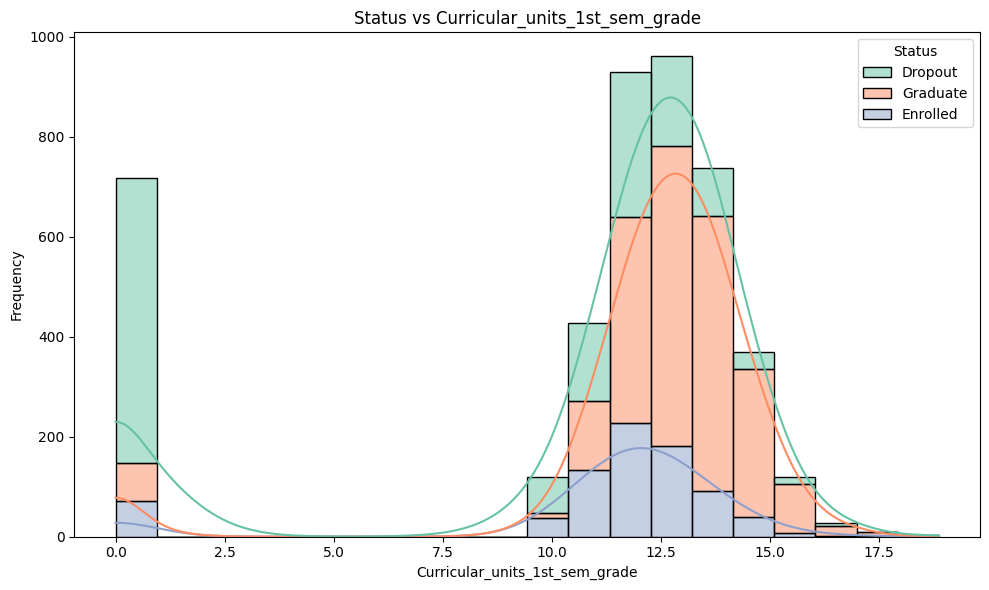

In [ ]:
plot_histogram(df_student_eda, x='Curricular_units_1st_sem_grade', hue='Status')

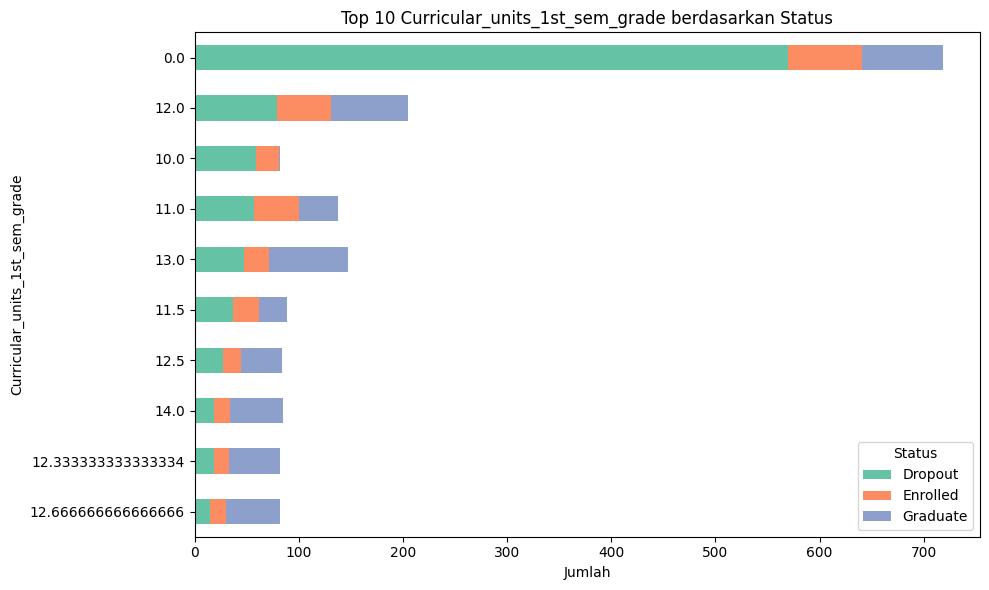

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Curricular_units_1st_sem_grade', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Curricular_units_1st_sem_grade`:**
- Terlihat adanya korelasi yang cukup kuat antara performa akademik awal mahasiswa dengan status akademik akhir, khususnya dalam hal risiko dropout. Mahasiswa yang mengalami dropout memiliki rata-rata nilai yang paling rendah, yakni 7.26, disertai standar deviasi yang tinggi (6.03), yang mengindikasikan adanya variasi besar—beberapa mahasiswa mendapat nilai sangat rendah, bahkan 0.0, sedangkan sebagian kecil lainnya mendapat nilai cukup tinggi.
- Sebaliknya, mahasiswa yang graduate menunjukkan rata-rata nilai yang jauh lebih tinggi, yakni 12.64, dengan penyebaran nilai yang lebih sempit (standar deviasi 2.70), menandakan konsistensi performa akademik yang baik di semester awal. Mahasiswa enrolled berada di tengah dengan nilai rata-rata 11.13, menunjukkan kecenderungan yang lebih dekat ke kelompok graduate daripada dropout, namun tetap menunjukkan potensi ketidakpastian dalam hasil akhirnya.
- 50% mahasiswa dropout memiliki nilai di bawah 10.93, bahkan 25%-nya memiliki nilai 0.0, yang dapat diartikan sebagai ketidakhadiran, kegagalan total, atau tidak mengikuti ujian sama sekali. Sementara mahasiswa graduate menunjukkan nilai median sebesar 13.0, dan 75%-nya memiliki nilai di atas 12.12, yang mencerminkan pencapaian akademik yang baik sejak awal studi.
- Mahasiswa dropout sangat terkonsentrasi pada nilai rendah, sementara mahasiswa graduate mendominasi di bagian kanan distribusi (nilai tinggi). Kurva mahasiswa enrolled tampak menyebar namun tetap mengikuti pola tengah.

**Insight:**
- Fitur `Curricular_units_1st_sem_grade` sangat berpotensi kuat sebagai variabel prediktif dalam model machine learning untuk memprediksi risiko dropout. Mahasiswa dengan rata-rata nilai rendah di semester pertama secara signifikan lebih berisiko untuk tidak menyelesaikan studi.

##### 📌 **MATA KULIAH YANG DIAMBIL DI SEMESTER 2 (Curricular_units_2nd_sem_enrolled)**


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Curricular_units_2nd_sem_enrolled' berdasarkan 'Status':
           count  mean   std  min  25%  50%  75%   max
Status                                                
Dropout   1421.0  5.78  2.11  0.0  5.0  6.0  6.0  18.0
Enrolled   794.0  5.94  1.83  0.0  5.0  6.0  6.0  17.0
Graduate  2209.0  6.63  2.30  0.0  6.0  6.0  8.0  23.0


Visualisasi:


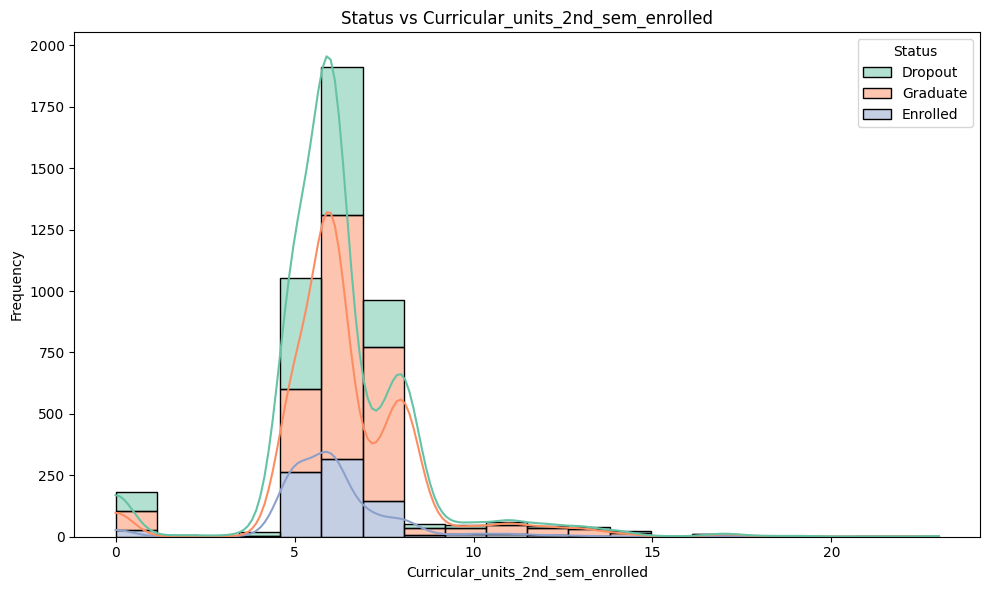

In [ ]:
plot_histogram(df_student_eda, x='Curricular_units_2nd_sem_enrolled', hue='Status')

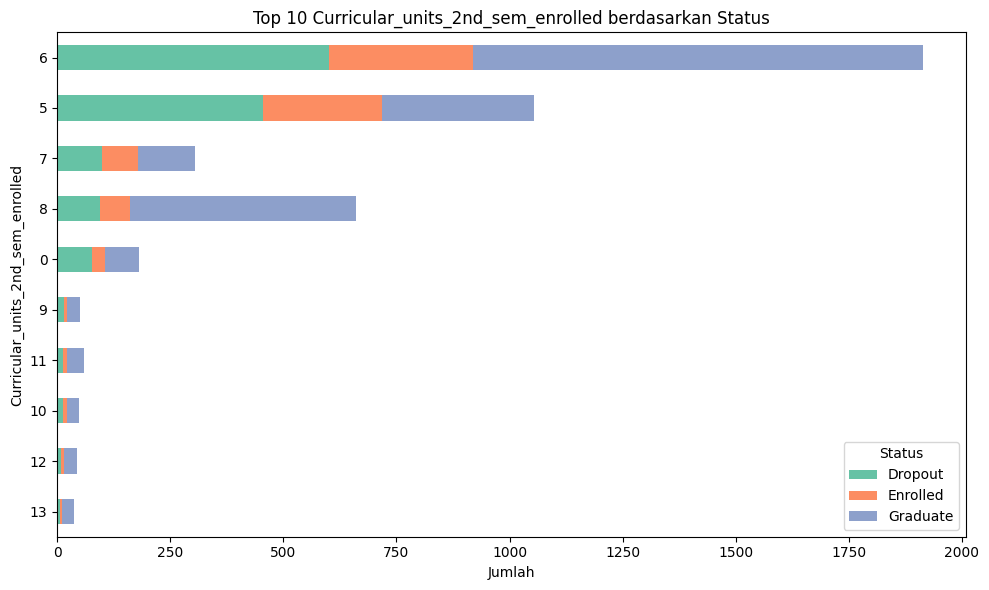

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Curricular_units_2nd_sem_enrolled', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Curricular_units_2nd_sem_enrolled`:**
- Terlihat adanya pola yang konsisten dengan temuan di semester pertama, yaitu mahasiswa yang mengambil lebih banyak mata kuliah cenderung memiliki peluang kelulusan yang lebih tinggi, sementara mereka yang mengambil lebih sedikit mata kuliah tampak lebih berisiko mengalami dropout.
- Mahasiswa yang graduate tercatat memiliki rata-rata jumlah mata kuliah tertinggi, yaitu 6.63 mata kuliah, dengan kuartil ketiga mencapai 8 mata kuliah, yang menunjukkan bahwa banyak dari mereka mengambil beban studi yang lebih penuh atau bahkan lebih dari standar. Sebaliknya, mahasiswa dropout mengambil lebih sedikit mata kuliah, dengan rata-rata 5.78, dan kuartil ketiga yang hanya sampai 6 mata kuliah, mengindikasikan beban studi yang lebih ringan. Kelompok enrolled berada di tengah dengan rata-rata 5.94, mirip dengan kelompok dropout namun sedikit lebih tinggi.
- Mahasiswa graduate mendominasi pada nilai enrollment yang lebih tinggi, sedangkan dropout lebih terkonsentrasi pada jumlah mata kuliah yang lebih sedikit. Ini memperkuat dugaan bahwa beban studi yang diambil mahasiswa dapat menjadi indikator motivasi, kesiapan akademik, atau keterlibatan dalam studi mereka.

**Insight:**
- Walaupun selisih rata-rata antara kelompok tidak terlalu ekstrem, tren yang konsisten dan distribusi yang berbeda antar kelompok menjadikan fitur ini relevan dalam analisis prediktif. Mahasiswa yang mengambil sedikit mata kuliah bisa jadi menghadapi hambatan akademik, finansial, atau pribadi yang memengaruhi komitmen studi mereka. Oleh karena itu, fitur ini berpotensi berguna dalam model prediksi dropout, terutama jika digabungkan dengan indikator performa akademik seperti jumlah mata kuliah yang lulus atau nilai rata-rata semester.

##### 📌 **MATA KULIAH YANG DINILAI DI SEMESTER 2 (Curricular_units_2nd_sem_evaluations)**


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Curricular_units_2nd_sem_evaluations' berdasarkan 'Status':
           count  mean   std  min  25%  50%   75%   max
Status                                                 
Dropout   1421.0  7.17  4.82  0.0  5.0  7.0  10.0  25.0
Enrolled   794.0  9.44  3.57  0.0  8.0  9.0  11.0  28.0
Graduate  2209.0  8.14  3.25  0.0  6.0  8.0   9.0  33.0


Visualisasi:


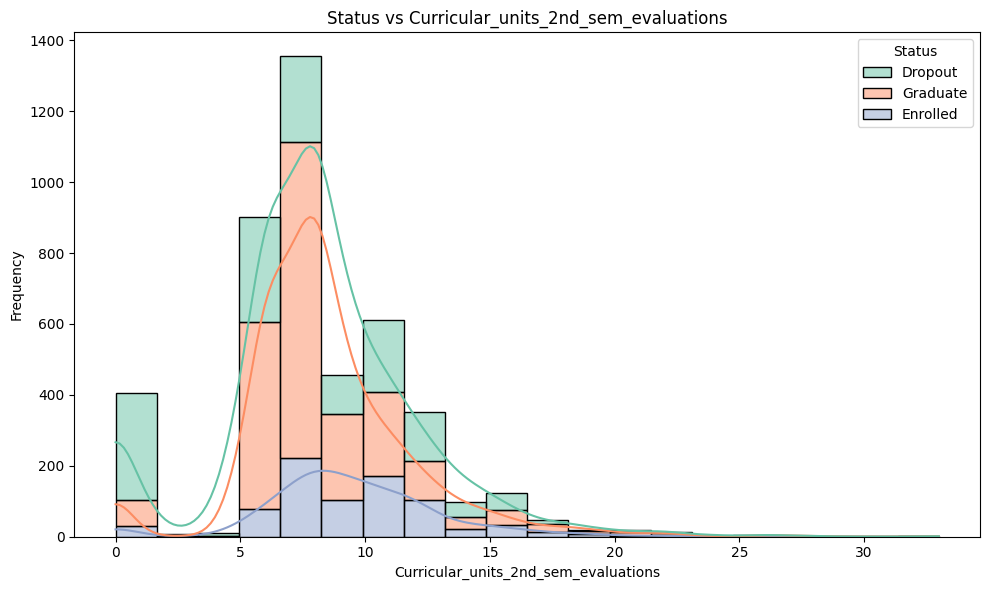

In [ ]:
plot_histogram(df_student_eda, x='Curricular_units_2nd_sem_evaluations', hue='Status')

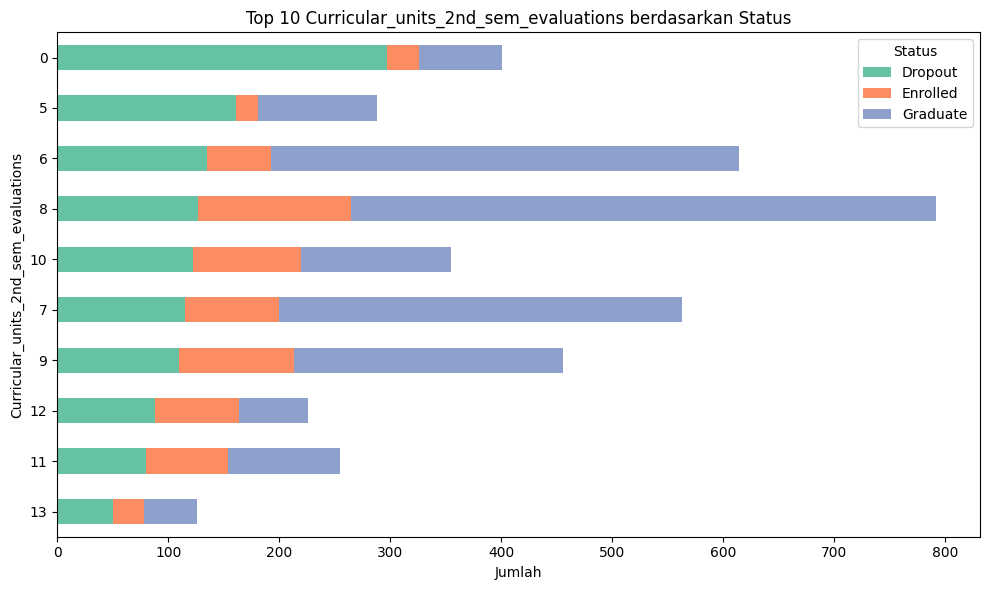

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Curricular_units_2nd_sem_evaluations', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Curricular_units_2nd_sem_evaluations`:**
- Terlihat bahwa tingkat keterlibatan mahasiswa dalam proses penilaian akademik memiliki korelasi dengan status akademik akhir mereka. Mahasiswa yang enrolled menunjukkan jumlah nilai tertinggi, dengan rata-rata 9.44 mata kuliah, disusul oleh graduate dengan rata-rata 8.14, dan yang terendah adalah kelompok dropout dengan 7.17.
- Mahasiswa yang lulus cenderung memiliki jumlah nilai yang lebih tinggi dan terdistribusi lebih merata di kisaran nilai tengah (6–10). Sebaliknya, mahasiswa dropout menunjukkan kecenderungan terakumulasi pada jumlah nilai yang lebih rendah, serta sebaran distribusi yang lebih lebar, yang mengindikasikan ketidakterlibatan atau ketidakkonsistenan dalam mengikuti penilaian akademik.
- Dari nilai kuartil, dropout memiliki Q1–Q3 antara 5 dan 10, sedangkan graduate lebih konsisten antara 6 dan 9. Kelompok enrolled sedikit lebih tinggi secara keseluruhan. Hal ini mengindikasikan bahwa semakin aktif mahasiswa terlibat dalam penilaian akademik semester kedua, semakin besar peluang mereka untuk tetap melanjutkan atau menyelesaikan studi.

**Insight:**
- Jumlah evaluasi semester dua dapat menjadi indikator penting dalam mendeteksi risiko dropout. Rendahnya keterlibatan mahasiswa dalam penilaian bisa mencerminkan masalah komitmen, kesiapan, atau bahkan kendala pribadi/eksternal lainnya. Oleh karena itu, fitur ini sangat layak dipertimbangkan dalam model prediktif dropout, terutama jika digunakan bersamaan dengan fitur akademik lainnya seperti jumlah mata kuliah yang diambil, nilai rata-rata, dan jumlah mata kuliah yang diselesaikan dengan baik.

##### 📌 **MATA KULIAH YANG LULUS DI SEMESTER 2 (Curricular_units_2nd_sem_approved)**


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Curricular_units_2nd_sem_approved' berdasarkan 'Status':
           count  mean   std  min  25%  50%  75%   max
Status                                                
Dropout   1421.0  1.94  2.57  0.0  0.0  0.0  4.0  16.0
Enrolled   794.0  4.06  2.18  0.0  3.0  4.0  5.0  12.0
Graduate  2209.0  6.18  2.27  0.0  5.0  6.0  7.0  20.0


Visualisasi:


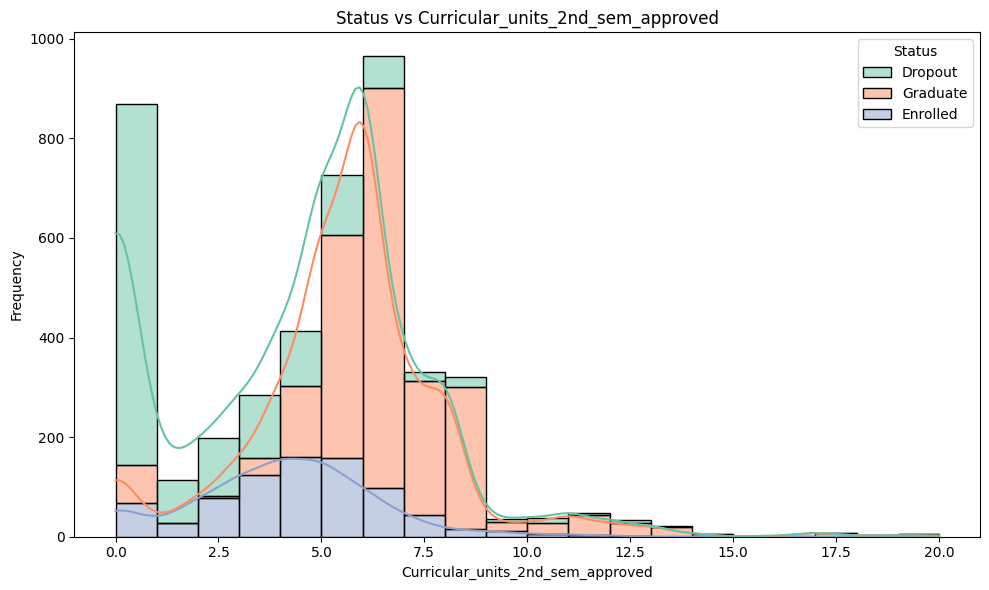

In [ ]:
plot_histogram(df_student_eda, x='Curricular_units_2nd_sem_approved', hue='Status')

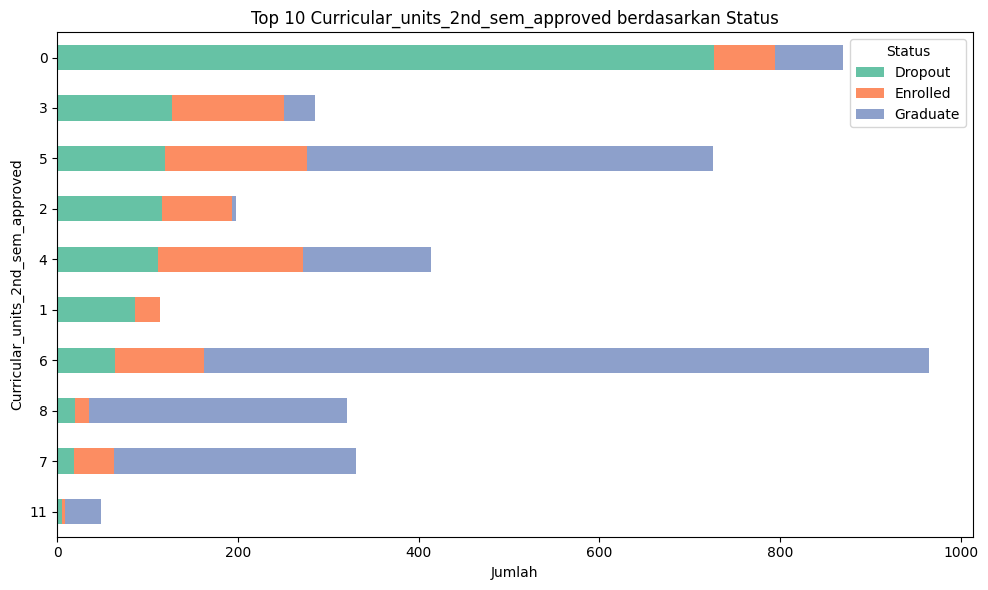

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Curricular_units_2nd_sem_approved', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Curricular_units_2nd_sem_approved`:**
- Ditemukan korelasi yang kuat antara keberhasilan akademik di semester 2 dan status kelulusan mahasiswa. Mahasiswa yang berhasil menyelesaikan studi (graduate) memiliki rata-rata mata kuliah lulus tertinggi, yaitu 6.18 mata kuliah, dengan kuartil 25% dan 75% masing-masing di 5 dan 7 mata kuliah. Di sisi lain, kelompok dropout hanya memiliki rata-rata 1.94 mata kuliah lulus, bahkan nilai median-nya adalah 0, menunjukkan bahwa lebih dari separuh mahasiswa yang dropout tidak meluluskan satu mata kuliah pun di semester dua.
- Distribusi ini juga tergambar dalam visualisasi histogram stacked dan kurva KDE, di mana kelompok dropout terakumulasi di nilai-nilai sangat rendah (khususnya di 0–2), sementara graduate memiliki puncak distribusi di nilai yang jauh lebih tinggi (sekitar 6). Mahasiswa enrolled berada di antara kedua kelompok ini, dengan rata-rata 4.06 mata kuliah lulus dan distribusi yang lebih menyebar namun tetap mendekati graduate.

**Insight:**
- Ketidakmampuan untuk meluluskan mata kuliah di semester kedua merupakan sinyal penting terhadap potensi dropout. Tidak hanya sekadar mengikuti perkuliahan, tetapi keberhasilan dalam menyelesaikan dan lulus dari mata kuliah menjadi indikator kuat terhadap komitmen dan kesiapan akademik mahasiswa.

##### 📌 **RATA-RATA NILAI MATA KULIAH DI SEMESTER 2 (Curricular_units_2nd_sem_grade)**


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Curricular_units_2nd_sem_grade' berdasarkan 'Status':
           count   mean   std  min    25%   50%    75%    max
Status                                                       
Dropout   1421.0   5.90  6.12  0.0   0.00   0.0  11.83  17.71
Enrolled   794.0  11.12  3.60  0.0  11.00  12.0  12.82  17.60
Graduate  2209.0  12.70  2.69  0.0  12.17  13.0  14.00  18.57


Visualisasi:


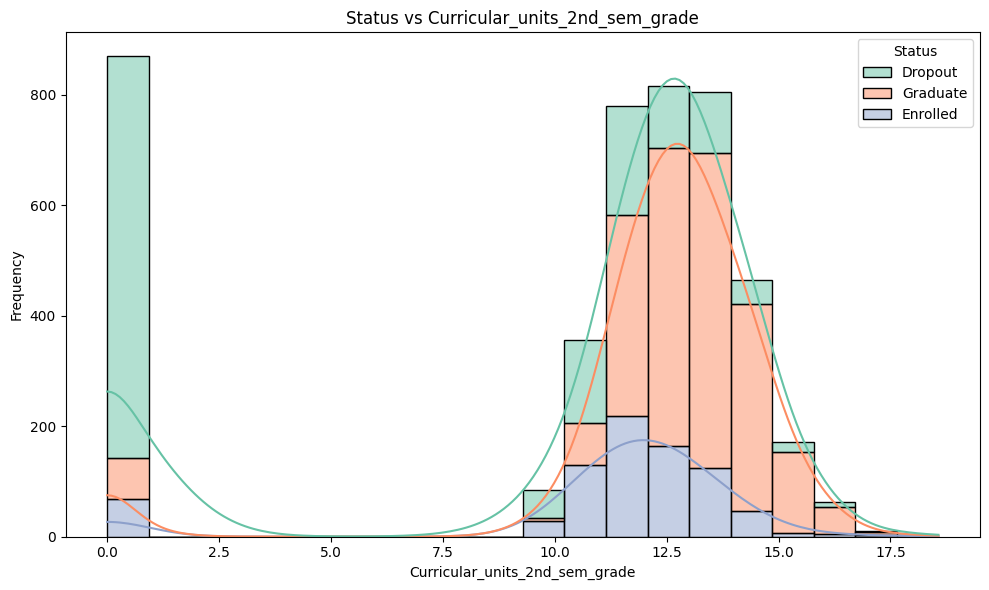

In [ ]:
plot_histogram(df_student_eda, x='Curricular_units_2nd_sem_grade', hue='Status')

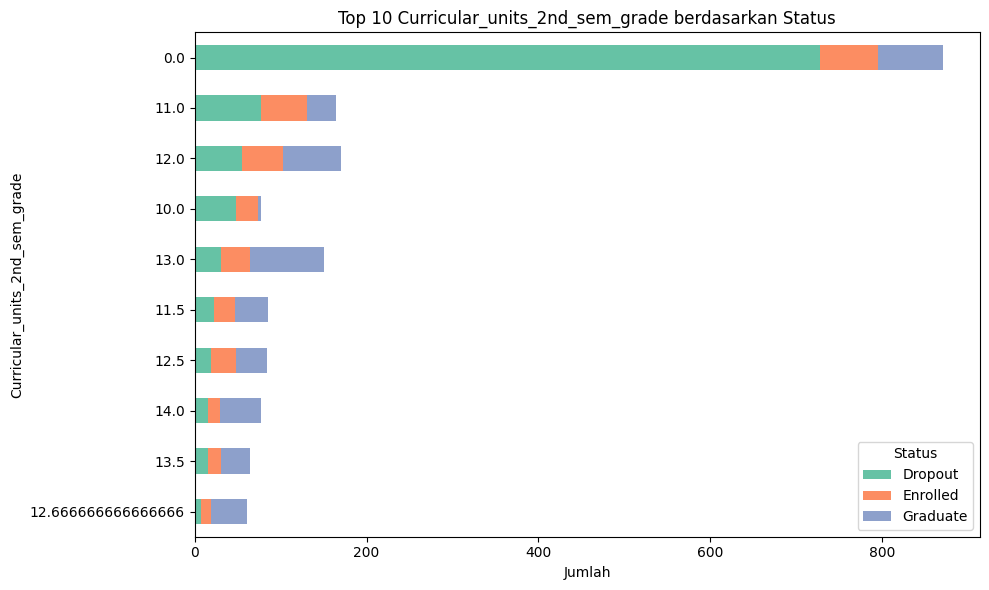

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Curricular_units_2nd_sem_grade', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Curricular_units_2nd_sem_grade`:**
- Adanya hubungan yang kuat antara nilai rata-rata akademik dan kemungkinan dropout mahasiswa. Mahasiswa yang berhasil lulus (graduate) memiliki rata-rata nilai tertinggi, yakni 12.70, dengan distribusi yang cenderung terpusat pada nilai tinggi (kuartil 25% sebesar 12.17 dan kuartil 75% sebesar 14.00). Sebaliknya, kelompok dropout memiliki rata-rata nilai yang sangat rendah, yaitu hanya 5.90, dengan median (nilai tengah) adalah 0.0, yang mengindikasikan bahwa lebih dari separuh mahasiswa yang dropout tidak memperoleh nilai sama sekali atau gagal total pada semester dua.
- Kelompok enrolled berada di antara dua kelompok lainnya, dengan rata-rata 11.12, menunjukkan potensi positif dalam kelanjutan studi, meskipun masih belum setinggi graduate. Distribusi visual dari histogram stacked dan kurva KDE mengonfirmasi bahwa kelompok dropout sangat terkonsentrasi pada nilai-nilai rendah, sementara graduate memiliki distribusi yang jelas memuncak di nilai-nilai yang tinggi.

**Insight:**
- Rata-rata nilai akademik pada semester kedua merupakan indikator kritis terhadap status mahasiswa. Mahasiswa dengan performa akademik yang sangat rendah pada semester dua cenderung tidak melanjutkan studi, baik karena ketidakmampuan akademik maupun motivasi yang menurun. Oleh karena itu, fitur ini sangat penting dalam analisis prediksi dropout dan dapat dimanfaatkan oleh pihak kampus untuk mendeteksi risiko dini serta memberikan dukungan akademik yang diperlukan.

##### 📌 **PENERIMA BEASISWA (Scholarship_holder)**


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Scholarship_holder' berdasarkan 'Status':
         count unique top  freq
Status                         
Dropout   1421      2  No  1287
Enrolled   794      2  No   664
Graduate  2209      2  No  1374


Visualisasi:


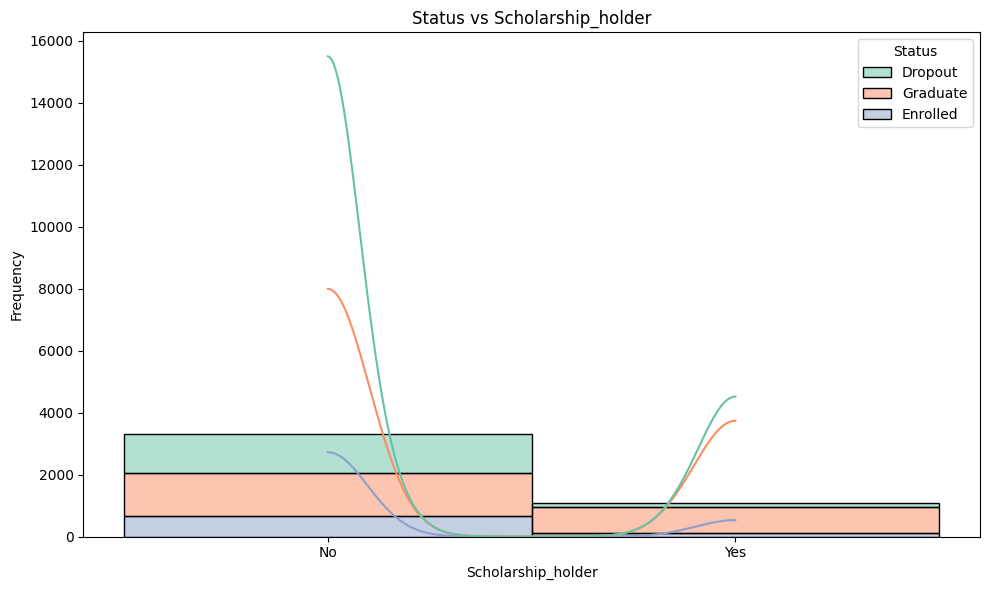

In [ ]:
plot_histogram(df_student_eda, x='Scholarship_holder', hue='Status')

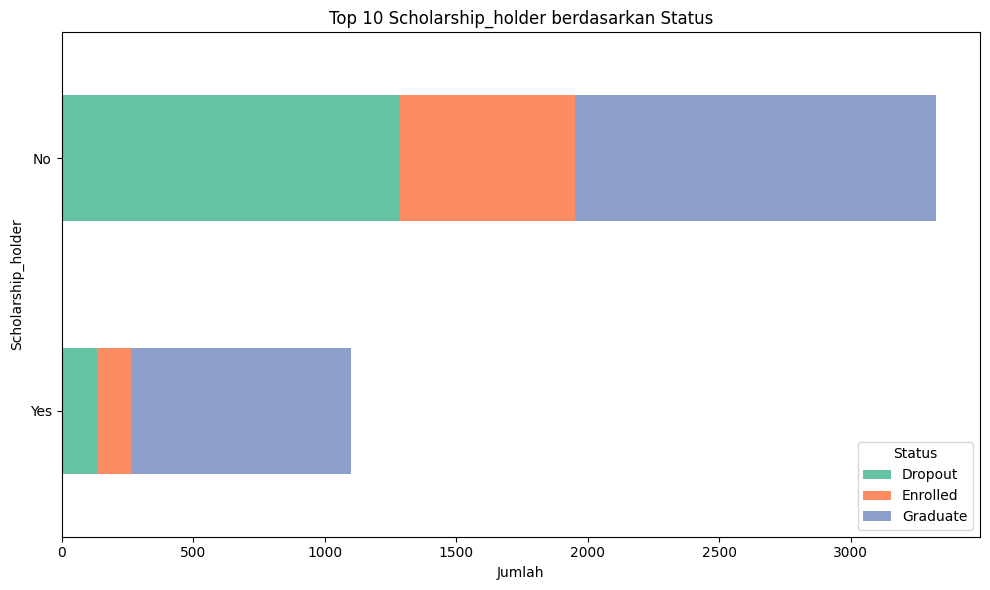

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Scholarship_holder', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Scholarship_holder`:**
- Penerimaan beasiswa berkaitan dengan tingkat dropout yang lebih rendah. Dari data yang tersedia, mayoritas mahasiswa yang dropout tidak menerima beasiswa, yakni sebanyak 1287 dari 1421 mahasiswa (sekitar 90.6%). Sebaliknya, pada kelompok graduate, sebanyak 1374 dari 2209 mahasiswa (sekitar 62.2%) tidak menerima beasiswa, yang berarti sisanya, sekitar 37.8%, merupakan penerima beasiswa—persentase yang relatif lebih tinggi dibanding kelompok dropout.
- Distribusi ini menunjukkan bahwa proporsi penerima beasiswa lebih tinggi pada kelompok mahasiswa yang berhasil menyelesaikan studi, dan lebih rendah pada kelompok yang mengalami dropout. Hal ini dapat diasumsikan bahwa beasiswa berkontribusi positif dalam mendukung keberlangsungan studi mahasiswa, baik melalui bantuan finansial maupun dorongan psikologis untuk mempertahankan prestasi akademik agar tetap memenuhi syarat penerimaan beasiswa.

**Insight:**
- Konsentrasi mahasiswa non-penerima beasiswa lebih besar pada kelompok dropout, sementara penerima beasiswa cenderung terdistribusi pada kelompok graduate dan enrolled. Dengan demikian, status sebagai penerima beasiswa dapat dipertimbangkan sebagai salah satu fitur penting dalam analisis prediktif terhadap risiko dropout mahasiswa, dan membuka peluang bagi institusi untuk mempertimbangkan peningkatan akses beasiswa sebagai strategi pencegahan dropout.

##### 📌 **KEBUTUHAN KHUSUS (Educational_special_needs)**


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Educational_special_needs' berdasarkan 'Status':
           count  mean   std  min  25%  50%  75%  max
Status                                               
Dropout   1421.0  0.01  0.11  0.0  0.0  0.0  0.0  1.0
Enrolled   794.0  0.01  0.12  0.0  0.0  0.0  0.0  1.0
Graduate  2209.0  0.01  0.10  0.0  0.0  0.0  0.0  1.0


Visualisasi:


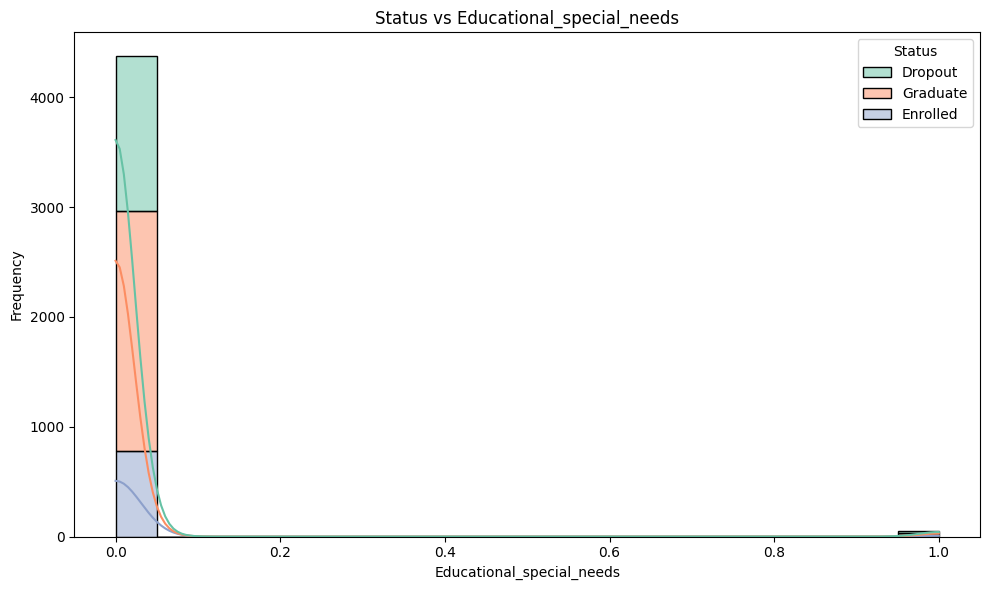

In [ ]:
plot_histogram(df_student_eda, x='Educational_special_needs', hue='Status')

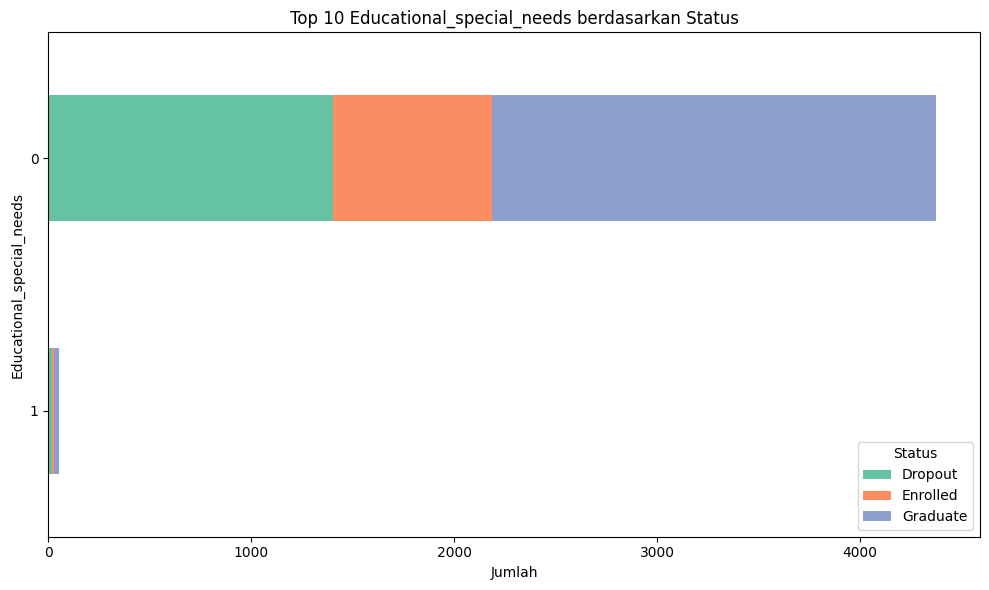

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Educational_special_needs', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Educational_special_needs`:**
- Keberadaan kebutuhan khusus tidak menunjukkan pengaruh yang signifikan terhadap kecenderungan mahasiswa untuk dropout. Nilai rata-rata untuk seluruh kelompok (graduate, dropout, dan enrolled) sama-sama berada di angka 0.01, dengan standar deviasi yang sangat kecil (sekitar 0.10–0.12), yang menunjukkan bahwa proporsi mahasiswa dengan kebutuhan khusus sangat kecil dalam dataset ini.
- Distribusi nilai yang sangat rendah dan minim variasi, serta nilai tengah (median) yang konsisten di 0, mengindikasikan bahwa sebagian besar mahasiswa tidak memiliki kebutuhan khusus, baik di kelompok dropout maupun graduate. Dengan demikian, walaupun penting secara inklusif, faktor kebutuhan khusus belum bisa dianggap sebagai penentu kuat dalam memprediksi risiko dropout dalam konteks dataset ini, setidaknya tanpa informasi tambahan atau ukuran sampel yang lebih besar untuk mahasiswa berkebutuhan khusus.

**Insight:**
- Distribusi yang seragam dan tidak mencolok antara kelompok, yang memperkuat dugaan bahwa variabel ini memiliki kontribusi yang sangat kecil terhadap variasi status mahasiswa. Sebagai catatan, karena jumlah mahasiswa berkebutuhan khusus sangat sedikit, hati-hati diperlukan dalam menarik kesimpulan sebab generalisasi bisa menjadi tidak valid tanpa data yang lebih representatif.

#### **d. Analisis Faktor Ekonomi dan Keuangan**

```
Tujuan:
1. Bagaimana distribusi status mahasiswa (Dropout vs Non-Dropout) berdasarkan kondisi ekonomi dan bentuk kompensasi yang diterima?
2. Apakah terdapat pola atau ketimpangan tertentu dalam faktor-faktor ekonomi atau kompensasi yang berkaitan dengan kemungkinan mahasiswa mengalami dropout?
3. Apakah fitur tertentu pada ekonomi dan keuangan berpotensi sebagai variabel prediktif dalam model machine learning untuk memprediksi risiko dropout?
```

| **Fitur**                 | **Analisis**                                                                                            |
| ------------------------- | ------------------------------------------------------------------------------------------------------- |
| `Tuition_fees_up_to_date` | Apakah mahasiswa yang tidak membayar biaya kuliah tepat waktu lebih berisiko mengalami dropout?         |
| `Debtor`                  | Apakah mahasiswa yang memiliki utang atau tunggakan lebih rentan terhadap dropout?                      |
| `Unemployment_rate`       | Apakah tingkat pengangguran yang tinggi di masyarakat berkorelasi dengan peningkatan dropout mahasiswa? |
| `Inflation_rate`          | Apakah laju inflasi yang tinggi turut memengaruhi tingkat dropout mahasiswa?                            |
| `GDP`                     | Apakah pertumbuhan ekonomi nasional (GDP) memiliki hubungan dengan tren dropout mahasiswa?              |
| **Visualisasi**           | Bar chart dan boxplot untuk membandingkan distribusi dan tren antar variabel                            |


##### 📌 **MENUNGGAK BIAYA KULIAH (Tuition_fees_up_to_date)**


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Tuition_fees_up_to_date' berdasarkan 'Status':
           count  mean   std  min  25%  50%  75%  max
Status                                               
Dropout   1421.0  0.68  0.47  0.0  0.0  1.0  1.0  1.0
Enrolled   794.0  0.95  0.22  0.0  1.0  1.0  1.0  1.0
Graduate  2209.0  0.99  0.11  0.0  1.0  1.0  1.0  1.0


Visualisasi:


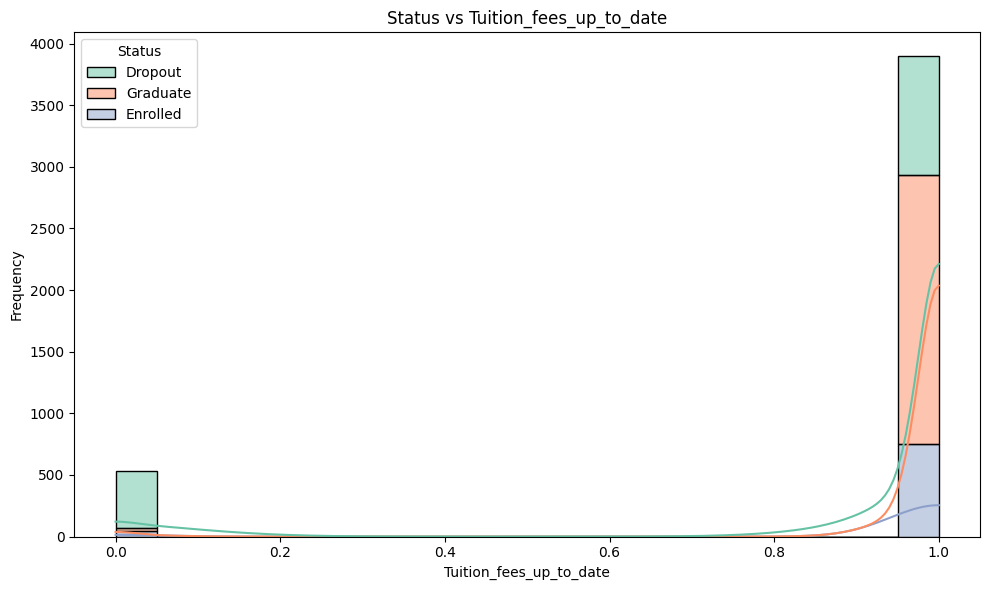

In [ ]:
plot_histogram(df_student_eda, x='Tuition_fees_up_to_date', hue='Status')

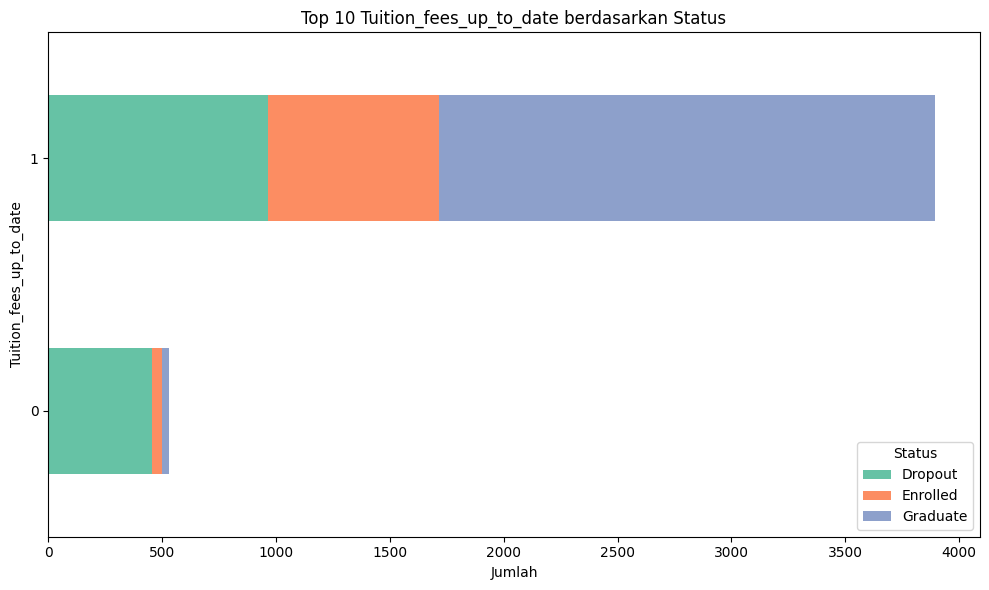

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Tuition_fees_up_to_date', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Tuition_fees_up_to_date`:**
- Keterlambatan atau tunggakan pembayaran biaya kuliah berkorelasi kuat dengan risiko dropout. Dari statistik yang diperoleh, terlihat bahwa mahasiswa dropout memiliki rata-rata keteraturan pembayaran sebesar 0.68, jauh lebih rendah dibandingkan dengan kelompok graduate (0.99) dan enrolled (0.95). Artinya, hanya sekitar 68% mahasiswa yang dropout membayar biaya kuliah tepat waktu, sedangkan hampir semua mahasiswa graduate membayar dengan tertib.
- Selain itu, nilai median pada kelompok dropout tetap 1.0, namun nilai 25%-nya adalah 0.0, yang menunjukkan sebagian besar mahasiswa dropout berada dalam kondisi menunggak atau tidak membayar secara konsisten. Sementara itu, kelompok graduate dan enrolled memiliki distribusi yang sangat sempit, hampir seluruhnya membayar tepat waktu.

**Insight:**
- Penurunan signifikan pada proporsi mahasiswa yang dropout saat pembayaran dilakukan tepat waktu, serta peningkatan risiko dropout pada mahasiswa yang menunggak. Hal ini mengindikasikan bahwa status pembayaran kuliah merupakan salah satu indikator kuat yang dapat digunakan untuk memprediksi kemungkinan dropout, dan perlu mendapat perhatian khusus dalam sistem pemantauan akademik atau keuangan mahasiswa. Upaya intervensi finansial seperti bantuan pembayaran atau program cicilan dapat menjadi strategi preventif yang efektif.

##### 📌 **MEMILIKI HUTANG (Debtor)**


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Debtor' berdasarkan 'Status':
           count  mean   std  min  25%  50%  75%  max
Status                                               
Dropout   1421.0  0.22  0.41  0.0  0.0  0.0  0.0  1.0
Enrolled   794.0  0.11  0.32  0.0  0.0  0.0  0.0  1.0
Graduate  2209.0  0.05  0.21  0.0  0.0  0.0  0.0  1.0


Visualisasi:


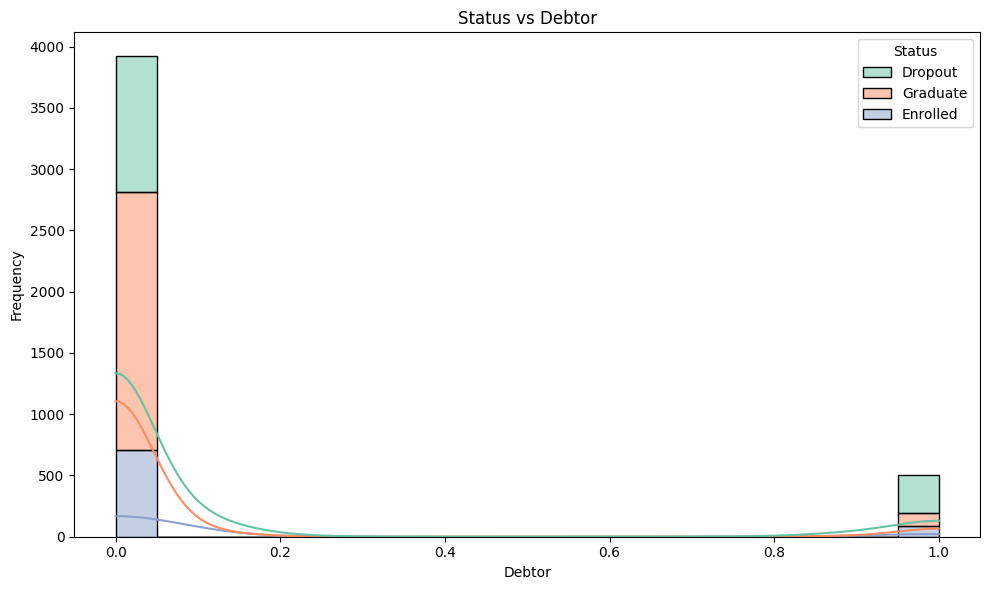

In [ ]:
plot_histogram(df_student_eda, x='Debtor', hue='Status')

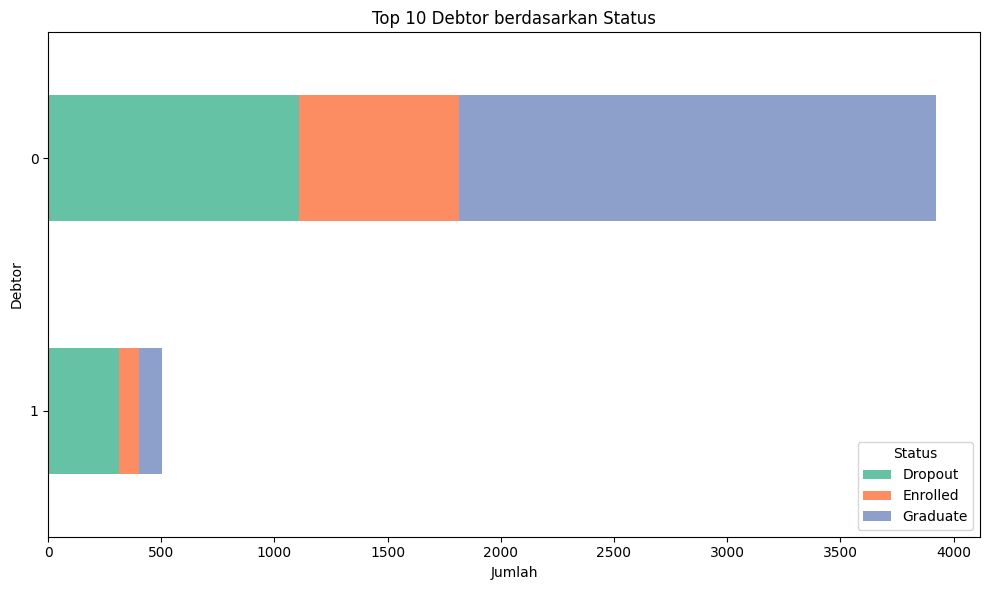

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Debtor', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Debtor`:**
- Adanya korelasi yang cukup kuat antara status mahasiswa yang memiliki utang dengan kemungkinan dropout. Dari ringkasan statistik, terlihat bahwa rata-rata mahasiswa dropout memiliki status utang sebesar 0.22, yang berarti sekitar 22% dari mahasiswa dropout tercatat memiliki utang atau tunggakan pembayaran lain di luar biaya kuliah reguler. Sebagai perbandingan, hanya 11% dari mahasiswa yang masih aktif (enrolled) dan 5% dari mahasiswa yang lulus (graduate) yang memiliki status sebagai debtor.
- Distribusi ini memperkuat dugaan bahwa kondisi finansial yang tidak stabil, tercermin dari keberadaan utang, dapat meningkatkan risiko dropout. Hal ini juga ditunjukkan oleh sebaran nilai yang sangat condong ke angka 0 untuk kelompok graduate dan enrolled, sementara kelompok dropout memiliki sebaran yang lebih luas menuju nilai 1 (memiliki utang).

**Insight:**
- Puncak distribusi mahasiswa dropout lebih tinggi pada kelompok yang memiliki utang dibandingkan dua status lainnya. Ini mengindikasikan bahwa mahasiswa dengan beban finansial tambahan—selain biaya kuliah—lebih rentan menghadapi hambatan dalam melanjutkan studi. Oleh karena itu, faktor utang menjadi variabel penting yang dapat dipertimbangkan dalam sistem deteksi dini dropout, serta dalam perumusan kebijakan dukungan keuangan atau konseling manajemen keuangan mahasiswa.

##### 📌 **TINGKAT PENGANGGURAN (Unemployment_rate)**


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Unemployment_rate' berdasarkan 'Status':
           count   mean   std  min  25%   50%   75%   max
Status                                                   
Dropout   1421.0  11.62  2.77  7.6  9.4  11.1  13.9  16.2
Enrolled   794.0  11.27  2.63  7.6  9.4  11.1  12.7  16.2
Graduate  2209.0  11.64  2.60  7.6  9.4  11.1  13.9  16.2


Visualisasi:


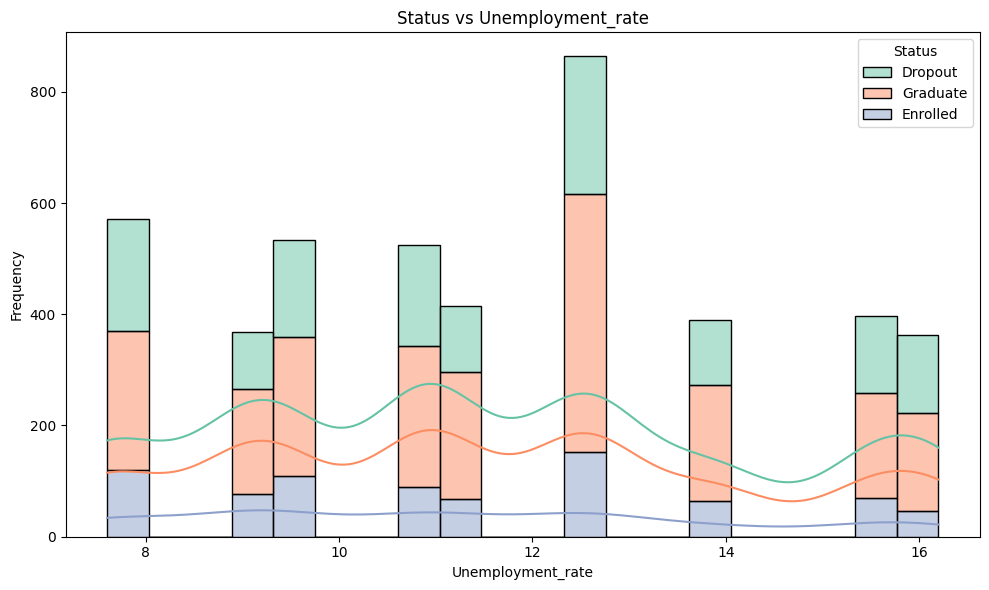

In [ ]:
plot_histogram(df_student_eda, x='Unemployment_rate', hue='Status')

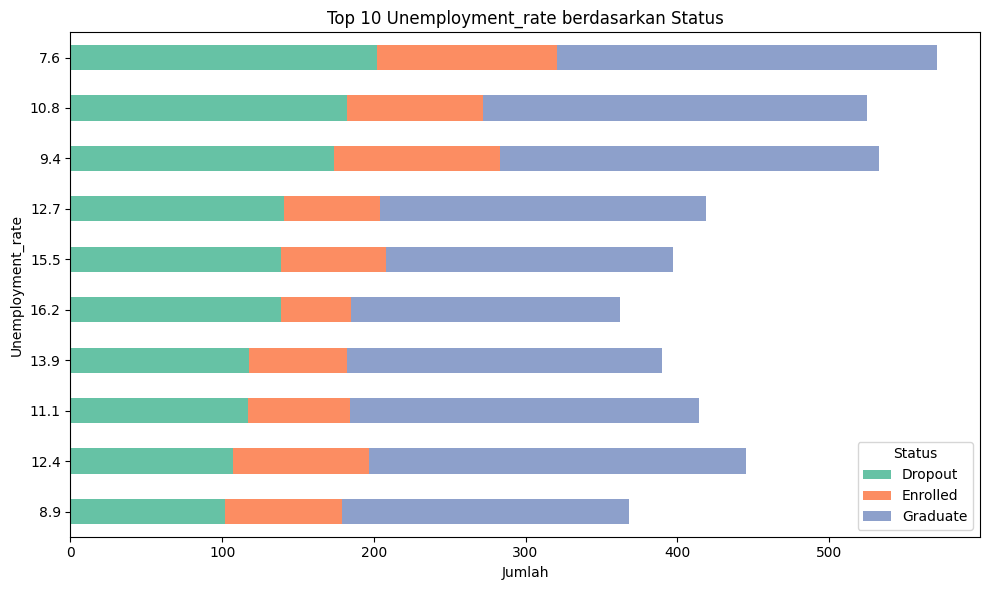

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Unemployment_rate', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Unemployment_rate`:**
- Terlihat bahwa tingkat pengangguran di masyarakat tidak menunjukkan korelasi yang signifikan terhadap kemungkinan mahasiswa mengalami dropout. Rata-rata tingkat pengangguran di wilayah asal mahasiswa yang dropout (11.62%) hampir sama dengan yang lulus (11.64%) dan sedikit lebih tinggi dibandingkan mahasiswa yang masih terdaftar (11.27%). Selain itu, distribusi nilai pada ketiga kelompok status relatif seragam, baik dari sisi nilai minimum, median (50%), maupun maksimum, yang semuanya berkisar antara 7.6 hingga 16.2.
- Kurva distribusi yang tumpang tindih antara ketiga kelompok, menandakan bahwa tingkat pengangguran di daerah asal mahasiswa bukan merupakan faktor pembeda utama antara mahasiswa dropout dan graduate. Artinya, meskipun tingkat pengangguran dapat memengaruhi kondisi sosial ekonomi suatu wilayah secara umum, data ini menunjukkan bahwa pengaruh langsungnya terhadap keputusan mahasiswa untuk melanjutkan atau menghentikan studi tidak terlalu menonjol dalam konteks ini.

**Insight:**
- Tingkat pengangguran di masyarakat lebih tepat dipandang sebagai faktor eksternal makro yang bersifat pelengkap, bukan sebagai variabel utama prediktif untuk risiko dropout mahasiswa dalam model prediktif atau sistem pendukung keputusan.

##### 📌 **TINGKAT LAJU INFLASI (Inflation_rate)**


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'Inflation_rate' berdasarkan 'Status':
           count  mean   std  min  25%  50%  75%  max
Status                                               
Dropout   1421.0  1.28  1.40 -0.8  0.3  1.4  2.6  3.7
Enrolled   794.0  1.21  1.37 -0.8  0.3  1.4  2.6  3.7
Graduate  2209.0  1.20  1.37 -0.8  0.3  0.6  2.6  3.7


Visualisasi:


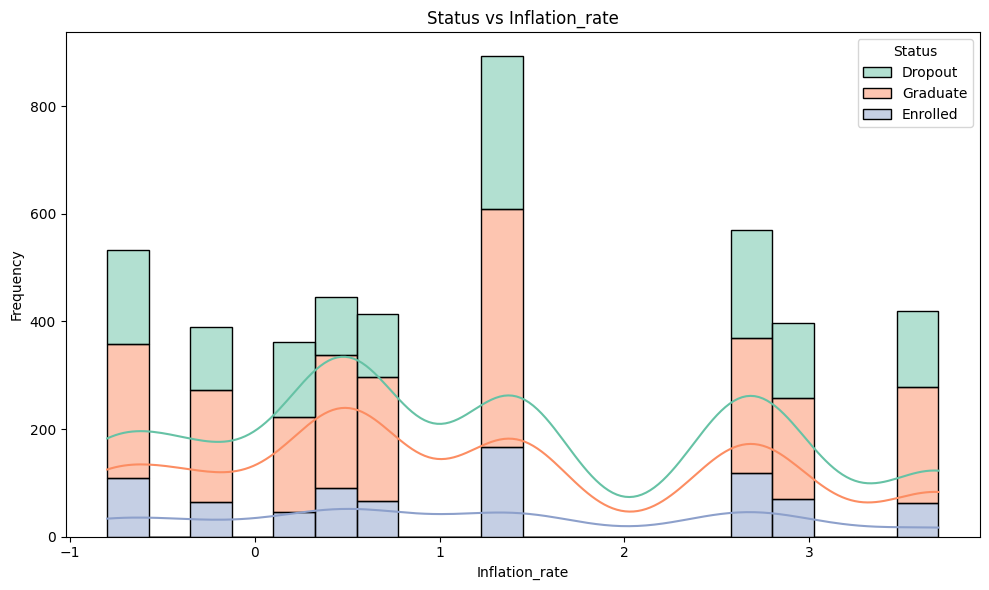

In [ ]:
plot_histogram(df_student_eda, x='Inflation_rate', hue='Status')

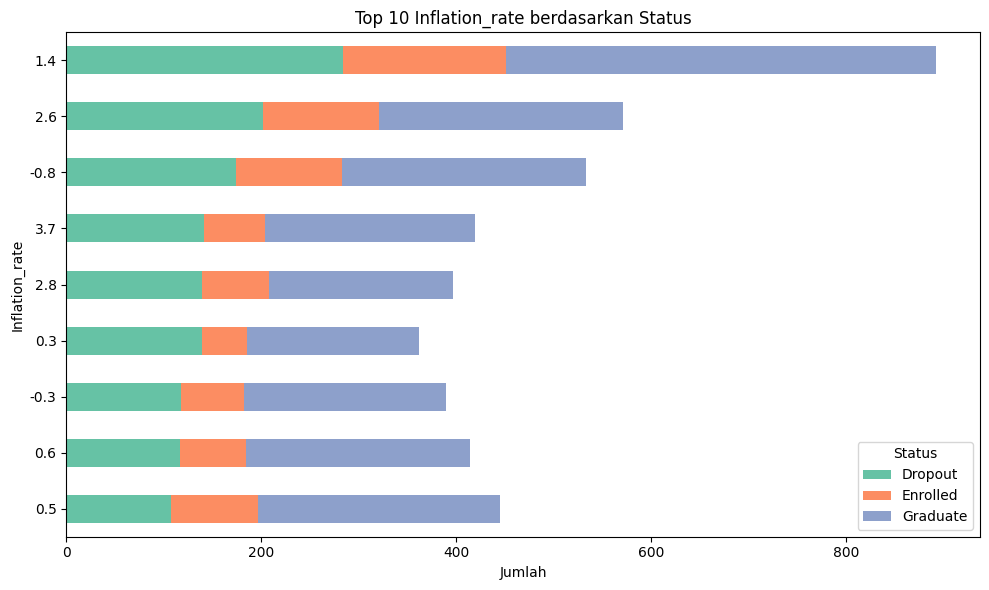

In [ ]:
plot_top_categories_stacked(df_student_eda, 'Inflation_rate', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `Inflation_rate`:**
- Terlihat bahwa laju inflasi di wilayah asal mahasiswa tidak memiliki pengaruh yang mencolok terhadap tingkat dropout. Rata-rata inflasi untuk mahasiswa yang mengalami dropout (1.28%) sedikit lebih tinggi dibandingkan mahasiswa yang lulus (1.20%) dan yang masih terdaftar (1.21%). Namun, perbedaan ini sangat kecil dan tidak cukup signifikan untuk menunjukkan adanya korelasi yang kuat antara inflasi dan status pendidikan mahasiswa.
- Distribusi data pada ketiga kelompok status menunjukkan kesamaan pola, dengan nilai minimum inflasi mencapai -0.8% dan maksimum 3.7% di seluruh kelompok. Nilai median (50%) untuk mahasiswa dropout dan enrolled berada di angka 1.4%, sedangkan mahasiswa graduate sedikit lebih rendah di angka 0.6%, namun perbedaan ini kemungkinan besar tidak substansial secara statistik maupun visual. Visualisasi histogram stacked dan kurva KDE kemungkinan memperlihatkan tumpang tindih distribusi yang tinggi antar kelompok, memperkuat kesimpulan bahwa inflasi bukanlah faktor dominan dalam menentukan risiko dropout.

**Insight:**
- Laju inflasi lebih tepat dipandang sebagai variabel latar eksternal yang dapat memperburuk situasi ekonomi secara umum, namun tidak berperan langsung atau signifikan terhadap keputusan individu mahasiswa untuk melanjutkan atau menghentikan studi. Dalam konteks pemodelan prediktif, variabel ini kemungkinan memiliki kontribusi prediktif yang rendah, dan dapat dijadikan fitur pelengkap jika ingin mengeksplorasi interaksi dengan faktor sosial ekonomi lainnya.

##### 📌 **PERTUMBUHAN EKONOMI NASIONAL (GDP)**


Ringkasan Kategorikal (tanpa filter tambahan)
          Jumlah Sampel  Persentase (%)
Status                                 
Graduate           2209            49.9
Dropout            1421            32.1
Enrolled            794            17.9

Ringkasan Statistik 'GDP' berdasarkan 'Status':
           count  mean   std   min  25%   50%   75%   max
Status                                                   
Dropout   1421.0 -0.15  2.25 -4.06 -1.7  0.32  1.74  3.51
Enrolled   794.0  0.05  2.32 -4.06 -1.7  0.32  1.79  3.51
Graduate  2209.0  0.08  2.26 -4.06 -1.7  0.79  1.79  3.51


Visualisasi:


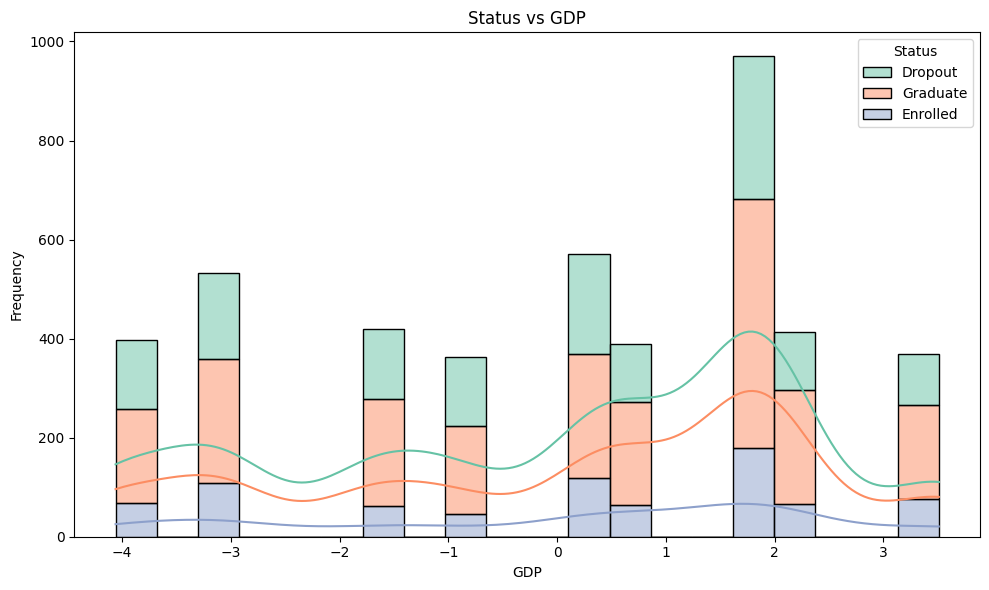

In [ ]:
plot_histogram(df_student_eda, x='GDP', hue='Status')

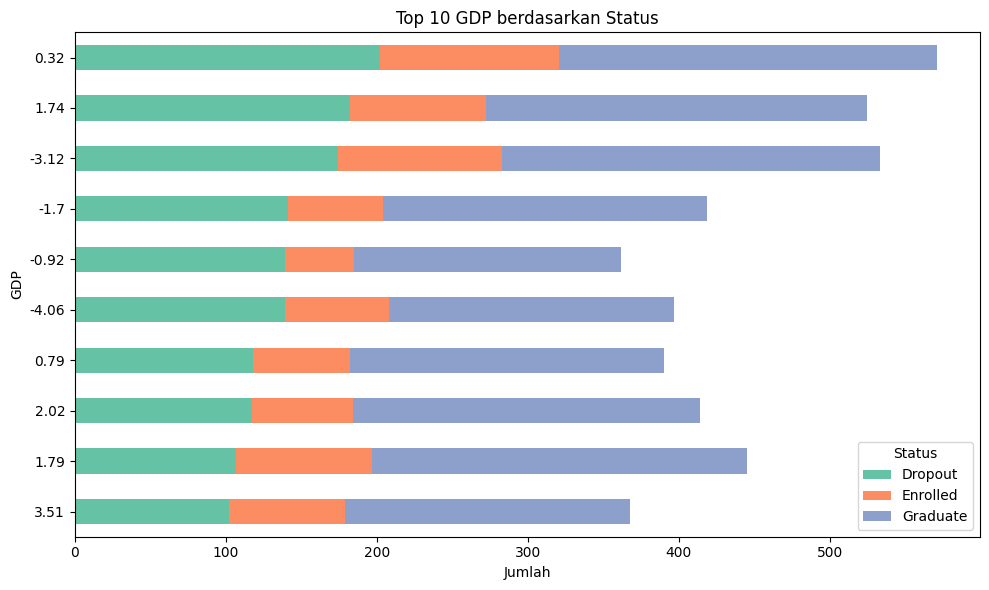

In [ ]:
plot_top_categories_stacked(df_student_eda, 'GDP', hue_column='Status')

>**Berdasarkan hasil ringkasan dan visualisasi histogram bertumpuk dan kurva KDE terhadap fitur `GDP`:**
- Tampaknya tidak terdapat hubungan yang kuat dan langsung antara laju pertumbuhan ekonomi dan tren dropout mahasiswa. Rata-rata GDP untuk mahasiswa yang mengalami dropout adalah -0.15%, sedikit lebih rendah dibandingkan mereka yang masih terdaftar (0.05%) dan yang berhasil lulus (0.08%). Meskipun secara rata-rata mahasiswa dropout berasal dari periode dengan pertumbuhan ekonomi yang sedikit lebih rendah, perbedaannya tergolong kecil dan kemungkinan tidak signifikan secara statistik.
- Distribusi GDP di ketiga kelompok status mahasiswa juga menunjukkan pola yang relatif serupa, dengan nilai minimum GDP sebesar -4.06% dan maksimum 3.51% pada semua kelompok. Median GDP mahasiswa dropout dan enrolled berada di angka 0.32%, sedangkan mahasiswa graduate memiliki median sedikit lebih tinggi yaitu 0.79%, namun secara keseluruhan kurva KDE kemungkinan besar menunjukkan tumpang tindih distribusi antar status.

**Insight:**
- GDP lebih mencerminkan kondisi makroekonomi negara secara umum dan bukan faktor utama yang memengaruhi keputusan individu mahasiswa untuk dropout. Pertumbuhan ekonomi yang rendah mungkin dapat meningkatkan tekanan finansial bagi sebagian keluarga, namun pengaruhnya terhadap dropout cenderung tidak langsung dan dibayangi oleh faktor yang lebih personal seperti performa akademik, keterlambatan pembayaran biaya kuliah, atau kepemilikan utang. Oleh karena itu, dalam konteks model prediktif atau perumusan kebijakan, GDP sebaiknya dianggap sebagai variabel pelengkap, bukan sebagai indikator utama dropout.

### 3.3. Multivariate Analysis

Tujuan: memahami interaksi antar fitur dan korelasi dengan target

- Gunakan heatmap korelasi untuk variabel numerik
- Gunakan pairplot untuk variabel yang saling berpengaruh terhadap dropout
- Gunakan chi-square test atau ANOVA untuk fitur kategorikal vs target

#### Heatmap Korelasi Untuk Variabel Numerik

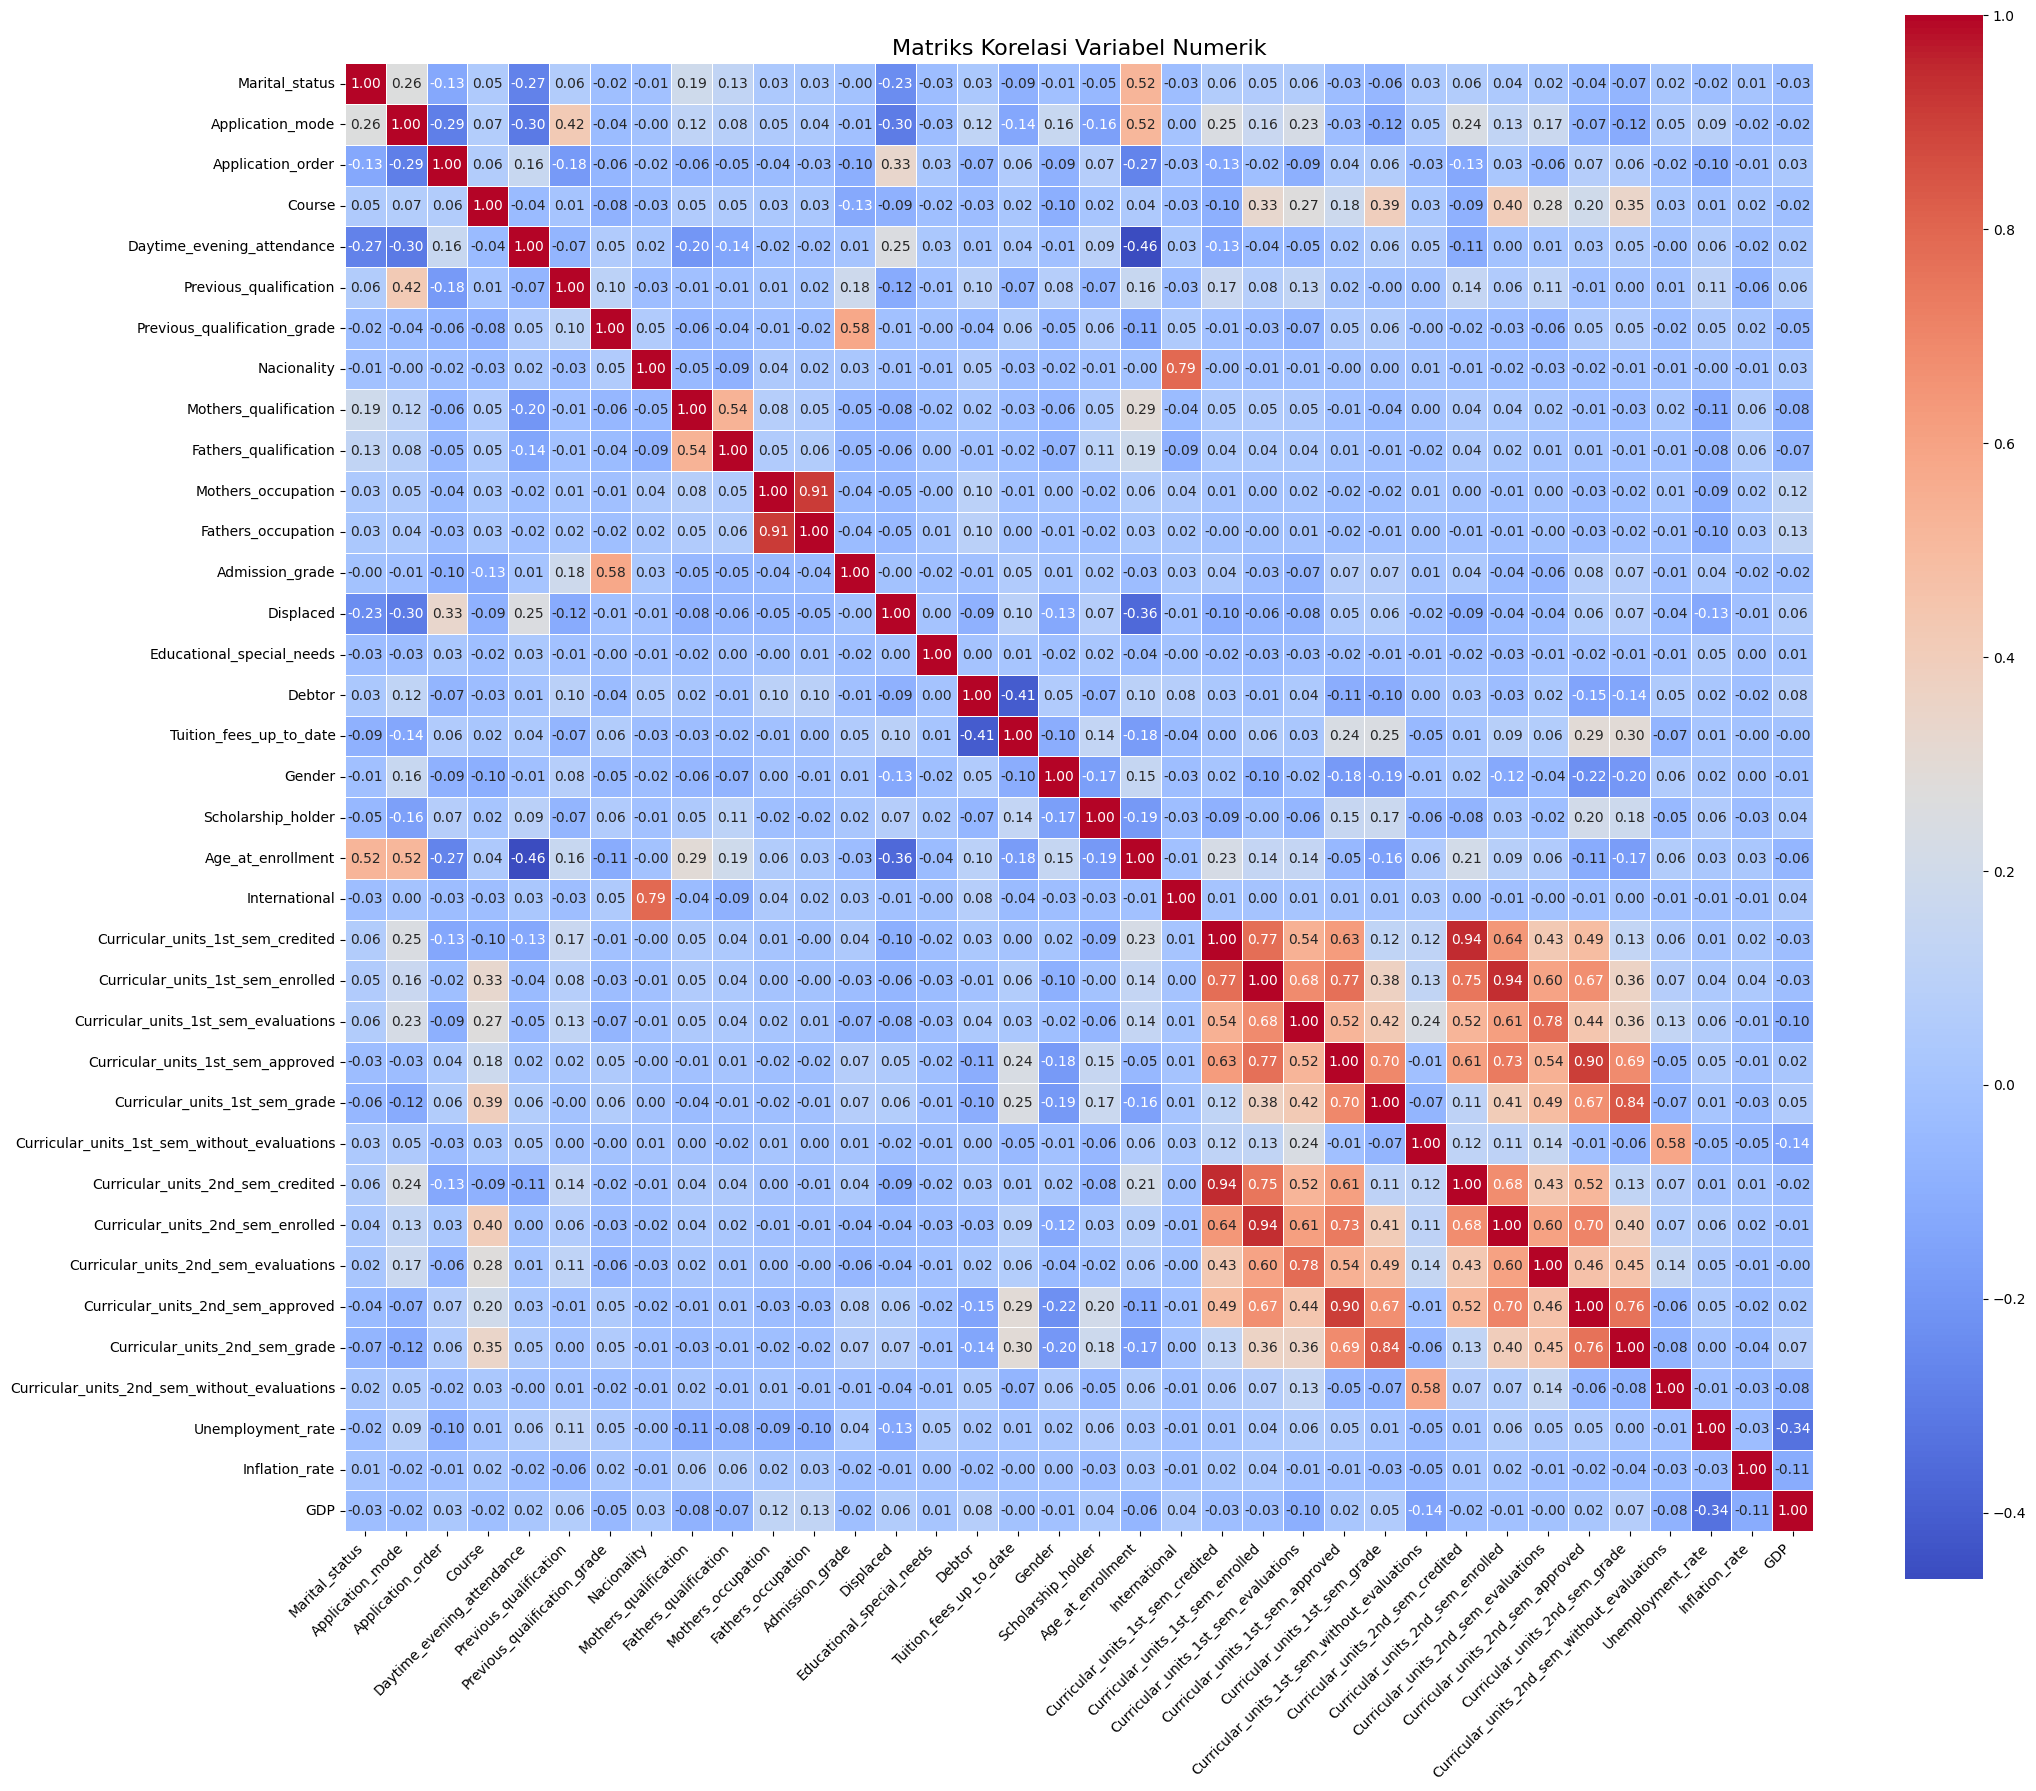

In [ ]:
numerical_columns = df_student.select_dtypes(include=['int64', 'float64']).columns


# Ukuran figure yang besar untuk visibilitas
plt.figure(figsize=(22, 22))

# Korelasi antar variabel numerik
correlation_matrix = df_student[numerical_columns].corr()

# Plot heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,            # Menampilkan nilai korelasi
    fmt=".2f",             # Format angka dua desimal
    cmap='coolwarm',       # Warna gradasi
    linecolor='white',     # Garis antar sel
    linewidths=0.5,        # Ketebalan garis antar sel
    square=True,           # Buat tiap sel berbentuk kotak
    cbar_kws={'shrink': 0.75},  # Ukuran color bar
)

plt.title("Matriks Korelasi Variabel Numerik", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## **4. Data Preparation**

In [5]:
df_student_cleaned = df_student.copy()

### 4.1. Mengubah Nama Kolom

In [6]:
df_student_cleaned.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [7]:
new_column_names = {
    'Marital_status': 'MaritalStatus',
    'Application_mode': 'ApplicationMode',
    'Application_order': 'ApplicationOrder',
    'Course': 'Course',
    'Daytime_evening_attendance': 'DaytimeEveningAttendance',
    'Previous_qualification': 'PreviousQualification',
    'Previous_qualification_grade': 'PreviousQualificationGrade',
    'Nacionality': 'Nationality',
    'Mothers_qualification': 'MothersQualification',
    'Fathers_qualification': 'FathersQualification',
    'Mothers_occupation': 'MothersOccupation',
    'Fathers_occupation': 'FathersOccupation',
    'Admission_grade': 'AdmissionGrade',
    'Displaced': 'Displaced',
    'Educational_special_needs': 'EducationalSpecialNeeds',
    'Debtor': 'Debtor',
    'Tuition_fees_up_to_date': 'TuitionFeesUpToDate',
    'Gender': 'Gender',
    'Scholarship_holder': 'ScholarshipHolder',
    'Age_at_enrollment': 'AgeAtEnrollment',
    'International': 'International',
    'Curricular_units_1st_sem_credited': 'CurricularUnits1stSemCredited',
    'Curricular_units_1st_sem_enrolled': 'CurricularUnits1stSemEnrolled',
    'Curricular_units_1st_sem_evaluations': 'CurricularUnits1stSemEvaluations',
    'Curricular_units_1st_sem_approved': 'CurricularUnits1stSemApproved',
    'Curricular_units_1st_sem_grade': 'CurricularUnits1stSemGrade',
    'Curricular_units_1st_sem_without_evaluations': 'CurricularUnits1stSemWithoutEvaluations',
    'Curricular_units_2nd_sem_credited': 'CurricularUnits2ndSemCredited',
    'Curricular_units_2nd_sem_enrolled': 'CurricularUnits2ndSemEnrolled',
    'Curricular_units_2nd_sem_evaluations': 'CurricularUnits2ndSemEvaluations',
    'Curricular_units_2nd_sem_approved': 'CurricularUnits2ndSemApproved',
    'Curricular_units_2nd_sem_grade': 'CurricularUnits2ndSemGrade',
    'Curricular_units_2nd_sem_without_evaluations': 'CurricularUnits2ndSemWithoutEvaluations',
    'Unemployment_rate': 'UnemploymentRate',
    'Inflation_rate': 'InflationRate',
    'GDP': 'GDP',
    'Target': 'Target'
}

df_student_cleaned = df_student_cleaned.rename(columns=new_column_names)
df_student_cleaned.columns

Index(['MaritalStatus', 'ApplicationMode', 'ApplicationOrder', 'Course',
       'DaytimeEveningAttendance', 'PreviousQualification',
       'PreviousQualificationGrade', 'Nationality', 'MothersQualification',
       'FathersQualification', 'MothersOccupation', 'FathersOccupation',
       'AdmissionGrade', 'Displaced', 'EducationalSpecialNeeds', 'Debtor',
       'TuitionFeesUpToDate', 'Gender', 'ScholarshipHolder', 'AgeAtEnrollment',
       'International', 'CurricularUnits1stSemCredited',
       'CurricularUnits1stSemEnrolled', 'CurricularUnits1stSemEvaluations',
       'CurricularUnits1stSemApproved', 'CurricularUnits1stSemGrade',
       'CurricularUnits1stSemWithoutEvaluations',
       'CurricularUnits2ndSemCredited', 'CurricularUnits2ndSemEnrolled',
       'CurricularUnits2ndSemEvaluations', 'CurricularUnits2ndSemApproved',
       'CurricularUnits2ndSemGrade', 'CurricularUnits2ndSemWithoutEvaluations',
       'UnemploymentRate', 'InflationRate', 'GDP', 'Status'],
      dtype='object

### 4.2. Mengubah Tipe Data

In [8]:
categorical_columns = [
    'MaritalStatus',
    'ApplicationMode',
    'Course',
    'DaytimeEveningAttendance',
    'PreviousQualification',
    'Nationality',
    'MothersQualification',
    'FathersQualification',
    'MothersOccupation',
    'FathersOccupation',
    'Displaced',
    'EducationalSpecialNeeds',
    'Debtor',
    'TuitionFeesUpToDate',
    'Gender',
    'ScholarshipHolder',
    'International',
    'Status'
]

numerical_columns = ['ApplicationOrder', 'PreviousQualificationGrade', 'AdmissionGrade',
                     'AgeAtEnrollment', 'CurricularUnits1stSemCredited',
                     'CurricularUnits1stSemEnrolled', 'CurricularUnits1stSemEvaluations',
                     'CurricularUnits1stSemApproved', 'CurricularUnits1stSemGrade',
                     'CurricularUnits1stSemWithoutEvaluations',
                     'CurricularUnits2ndSemCredited', 'CurricularUnits2ndSemEnrolled',
                     'CurricularUnits2ndSemEvaluations', 'CurricularUnits2ndSemApproved',
                     'CurricularUnits2ndSemGrade', 'CurricularUnits2ndSemWithoutEvaluations',
                     'UnemploymentRate', 'InflationRate', 'GDP'
]

# Ubah tipe data menjadi kategorikal
df_student_cleaned[categorical_columns] = df_student_cleaned[categorical_columns].astype('category')
# Ubah tipe data menjadi numerikal
df_student_cleaned[numerical_columns] = df_student_cleaned[numerical_columns].astype('int')

In [9]:
df_student_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   MaritalStatus                            4424 non-null   category
 1   ApplicationMode                          4424 non-null   category
 2   ApplicationOrder                         4424 non-null   int64   
 3   Course                                   4424 non-null   category
 4   DaytimeEveningAttendance                 4424 non-null   category
 5   PreviousQualification                    4424 non-null   category
 6   PreviousQualificationGrade               4424 non-null   int64   
 7   Nationality                              4424 non-null   category
 8   MothersQualification                     4424 non-null   category
 9   FathersQualification                     4424 non-null   category
 10  MothersOccupation                   

In [ ]:
df_student_cleaned.select_dtypes(include=['int']).columns

Index(['ApplicationOrder', 'Previous_qualification_grade', 'AdmissionGrade',
       'AgeAtEnrollment', 'CurricularUnits1stSemCredited',
       'CurricularUnits1stSemEnrolled', 'CurricularUnits1stSemEvaluations',
       'CurricularUnits1stSemApproved', 'CurricularUnits1stSemGrade',
       'CurricularUnits1stSemWithoutEvaluations',
       'CurricularUnits2ndSemCredited', 'CurricularUnits2ndSemEnrolled',
       'CurricularUnits2ndSemEvaluations', 'CurricularUnits2ndSemApproved',
       'CurricularUnits2ndSemGrade', 'CurricularUnits2ndSemWithoutEvaluations',
       'UnemploymentRate', 'InflationRate', 'GDP'],
      dtype='object')

In [ ]:
df_student_cleaned.select_dtypes(include=['category']).columns

Index(['MaritalStatus', 'ApplicationMode', 'Course',
       'DaytimeEveningAttendance', 'PreviousQualification', 'Nationality',
       'MothersQualification', 'FathersQualification', 'MothersOccupation',
       'FathersOccupation', 'Displaced', 'EducationalSpecialNeeds', 'Debtor',
       'TuitionFeesUpToDate', 'Gender', 'ScholarshipHolder', 'International',
       'Status'],
      dtype='object')

In [ ]:
df_student_cleaned.to_csv("data/data_student_cleaned.csv", index=False)

### 4.3. Data Preparation Untuk Dashboard

In [ ]:
df_student_dashboard = df_student_cleaned.copy()

In [ ]:
# Helper function untuk mengganti nilai numerik dengan label deskriptif
def replace_values(column, replacement_dict):
    return df_student_dashboard[column].replace(replacement_dict)

# Daftar kolom yang memerlukan konversi dan dictionary untuk mengganti nilainya
replacement_mappings = {
    'MaritalStatus': {
        1: 'Single',
        2: 'Married',
        3: 'Widower',
        4: 'Divorced',
        5: 'Facto Union',
        6: 'Legally Separated'
    },
    'ApplicationMode' : {
        1: '1st Phase - General Contingent',
        2: 'Ordinance No. 612/93',
        5: '1st Phase - Special Contingent (Azores Island)',
        7: 'Holders of Other Higher Courses',
        10: 'Ordinance No. 854-B/99',
        15: 'International Student (Bachelor)',
        16: '1st Phase - Special Contingent (Madeira Island)',
        17: '2nd Phase - General Contingent',
        18: '3rd Phase - General Contingent',
        26: 'Ordinance No. 533-A/99, Item B2 (Different Plan)',
        27: 'Ordinance No. 533-A/99, Item B3 (Other Institution)',
        39: 'Over 23 Years Old',
        42: 'Transfer',
        43: 'Change of Course',
        44: 'Technological Specialization Diploma Holders',
        51: 'Change of Institution/Course',
        53: 'Short Cycle Diploma Holders',
        57: 'Change of Institution/Course (International)'
    },
    'Course': {
        33: 'Biofuel Production Technologies',
        171: 'Animation and Multimedia Design',
        8014: 'Social Service (evening attendance)',
        9003: 'Agronomy',
        9070: 'Communication Design',
        9085: 'Veterinary Nursing',
        9119: 'Informatics Engineering',
        9130: 'Equinculture',
        9147: 'Management',
        9238: 'Social Service',
        9254: 'Tourism',
        9500: 'Nursing',
        9556: 'Oral Hygiene',
        9670: 'Advertising and Marketing Management',
        9773: 'Journalism and Communication',
        9853: 'Basic Education',
        9991: 'Management (evening attendance)'
    },
    'Nationality': {
        1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian', 13: 'Dutch',
        14: 'English', 17: 'Lithuanian', 21: 'Angolan', 22: 'Cape Verdean',
        24: 'Guinean', 25: 'Mozambican', 26: 'Santomean', 32: 'Turkish',
        41: 'Brazilian', 62: 'Romanian', 100: 'Moldova (Republic of)',
        101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban',
        109: 'Colombian'
    },
    'PreviousQualification': {
          1: 'Secondary Education - 12th Year of Schooling or Eq.',
          2: "Higher Education - Bachelor's Degree",
          3: 'Higher Education - Degree',
          4: "Higher Education - Master's",
          5: 'Higher Education - Doctorate',
          6: 'Frequency of Higher Education',
          9: '12th Year of Schooling - Not Completed',
          10: '11th Year of Schooling - Not Completed',
          11: '7th Year (Old)',
          12: 'Other - 11th Year of Schooling',
          13: '2nd Year Complementary High School Course',
          14: '10th Year of Schooling',
          15: '10th Year of Schooling - Not Completed',
          18: 'General Commerce Course',
          19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
          20: 'Complementary High School Course',
          22: 'Technical - Professional Course',
          25: 'Complementary High School Course - Not Concluded',
          26: '7th Year of Schooling',
          27: '2nd Cycle of the General High School Course',
          29: '9th Year of Schooling - Not Completed',
          30: '8th Year of Schooling',
          31: 'General Course of Administration and Commerce',
          33: 'Supplementary Accounting and Administration',
          34: 'Unknown',
          35: "Can't Read or Write",
          36: 'Can Read Without Having a 4th Year of Schooling',
          37: 'Basic Education 1st Cycle (4th/5th Year) or Equiv.',
          38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
          39: 'Technological Specialization Course',
          40: 'Higher Education - Degree (1st Cycle)',
          41: 'Specialized Higher Studies Course',
          42: 'Professional Higher Technical Course',
          43: 'Higher Education - Master (2nd Cycle)',
          44: 'Higher Education - Doctorate (3rd Cycle)'
    },
    'MothersQualification': {
        1: 'Secondary Education - 12th Year of Schooling or Eq.',
        2: 'Higher Education - Bachelor\'s Degree',
        3: 'Higher Education - Degree',
        4: 'Higher Education - Master\'s',
        5: 'Higher Education - Doctorate',
        6: 'Frequency of Higher Education',
        9: '12th Year of Schooling - Not Completed',
        10: '11th Year of Schooling - Not Completed',
        11: '7th Year (Old)',
        12: 'Other - 11th Year of Schooling',
        14: '10th Year of Schooling',
        18: 'General commerce course',
        19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
        22: 'Technical-professional course',
        26: '7th year of schooling',
        27: '2nd cycle of the general high school course',
        29: '9th Year of Schooling - Not Completed',
        30: '8th year of schooling',
        34: 'Unknown',
        35: 'Can\'t read or write',
        36: 'Can read without having a 4th year of schooling',
        37: 'Basic education 1st cycle (4th/5th year) or equiv.',
        38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
        39: 'Technological specialization course',
        40: 'Higher education - degree (1st cycle)',
        41: 'Specialized higher studies course',
        42: 'Professional higher technical course',
        43: 'Higher Education - Master (2nd cycle)',
        44: 'Higher Education - Doctorate (3rd cycle)'
    },
    'MothersOccupation': {
        0: 'Student', 1: 'Legislative Power and Executive Bodies',
        2: 'Specialists in Intellectual and Scientific Activities',
        3: 'Intermediate Level Technicians and Professions',
        4: 'Administrative staff',
        5: 'Personal Services, Security and Safety Workers and Sellers',
        6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
        7: 'Skilled Workers in Industry, Construction and Craftsmen',
        8: 'Installation and Machine Operators and Assembly Workers',
        9: 'Unskilled Workers',
        10: 'Armed Forces Professions',
        90: 'Other Situation',
        99: '(blank)',
        122: 'Health professionals',
        123: 'Teachers',
        125: 'Specialists in ICT',
        131: 'Intermediate level science and engineering technicians',
        132: 'Intermediate level technicians of health',
        134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
        141: 'Office workers, secretaries and data processing operators',
        143: 'Data, accounting, statistical, financial services and registry-related operators',
        144: 'Other administrative support staff',
        151: 'Personal service workers',
        152: 'Sellers',
        153: 'Personal care workers and the like',
        171: 'Skilled construction workers, except electricians',
        173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans',
        175: 'Workers in food processing, woodworking, clothing and other industries',
        191: 'Cleaning workers',
        192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
        193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
        194: 'Meal preparation assistants'
    },
    'FathersQualification': {
        1: 'Secondary Education - 12th Year of Schooling or Eq.',
        2: 'Higher Education - Bachelor\'s Degree',
        3: 'Higher Education - Degree',
        4: 'Higher Education - Master\'s',
        5: 'Higher Education - Doctorate',
        6: 'Frequency of Higher Education',
        9: '12th Year of Schooling - Not Completed',
        10: '11th Year of Schooling - Not Completed',
        11: '7th Year (Old)',
        12: 'Other - 11th Year of Schooling',
        13: '2nd year complementary high school course',
        14: '10th Year of Schooling',
        18: 'General commerce course',
        19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
        20: 'Complementary High School Course',
        22: 'Technical-professional course',
        25: 'Complementary High School Course - not concluded',
        26: '7th year of schooling',
        27: '2nd cycle of the general high school course',
        29: '9th Year of Schooling - Not Completed',
        30: '8th year of schooling',
        31: 'General Course of Administration and Commerce',
        33: 'Supplementary Accounting and Administration',
        34: 'Unknown',
        35: 'Can\'t read or write',
        36: 'Can read without having a 4th year of schooling',
        37: 'Basic education 1st cycle (4th/5th year) or equiv.',
        38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
        39: 'Technological specialization course',
        40: 'Higher education - degree (1st cycle)',
        41: 'Specialized higher studies course',
        42: 'Professional higher technical course',
        43: 'Higher Education - Master (2nd cycle)',
        44: 'Higher Education - Doctorate (3rd cycle)'
    },
    'FathersOccupation': {
        0: 'Student',
        1: 'Legislative Power and Executive Bodies',
        2: 'Specialists in Intellectual and Scientific Activities',
        3: 'Intermediate Level Technicians and Professions',
        4: 'Administrative staff',
        5: 'Personal Services, Security and Safety Workers and Sellers',
        6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
        7: 'Skilled Workers in Industry, Construction and Craftsmen',
        8: 'Installation and Machine Operators and Assembly Workers',
        9: 'Unskilled Workers',
        10: 'Armed Forces Professions',
        90: 'Other Situation',
        99: '(blank)',
        101: 'Armed Forces Officers',
        102: 'Armed Forces Sergeants',
        103: 'Other Armed Forces personnel',
        112: 'Directors of administrative and commercial services',
        114: 'Hotel, catering, trade and other services directors',
        121: 'Specialists in the physical sciences, mathematics, engineering and related techniques',
        122: 'Health professionals',
        123: 'Teachers',
        124: 'Specialists in finance, accounting, administrative organization, public and commercial relations',
        131: 'Intermediate level science and engineering technicians and professions',
        132: 'Intermediate level technicians of health',
        134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
        135: 'Information and communication technology technicians',
        141: 'Office workers, secretaries in general and data processing operators',
        143: 'Data, accounting, statistical, financial services and registry-related operators',
        144: 'Other administrative support staff',
        151: 'Personal service workers',
        152: 'Sellers',
        153: 'Personal care workers and the like',
        154: 'Protection and security services personnel',
        161: 'Market-oriented farmers and skilled agricultural and animal production workers',
        163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence',
        171: 'Skilled construction workers and the like, except electricians',
        172: 'Skilled workers in metallurgy, metalworking and similar',
        174: 'Skilled workers in electricity and electronics',
        175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
        181: 'Fixed plant and machine operators',
        182: 'Assembly workers',
        183: 'Vehicle drivers and mobile equipment operators',
        192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
        193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
        194: 'Meal preparation assistants',
        195: 'Street vendors (except food) and street service providers'
    },
    'DaytimeEveningAttendance': {
        0: 'Evening',
        1: 'Daytime'
    },
    'Gender': {
        1: 'Male',
        0: 'Female'
    },
    'ScholarshipHolder': {
        1: 'Yes',
        0: 'No'
    },
    'Displaced': {
        1: 'Yes',
        0: 'No'
    },
    'International': {
        1: 'Yes',
        0: 'No'
    }
}

# Terapkan fungsi replace_values pada kolom-kolom yang relevan
for col, mapping in replacement_mappings.items():
    df_student_dashboard[col] = replace_values(col, mapping)

# Daftar kolom numerik yang sebenarnya bersifat kategorikal
categorical_columns = ['MaritalStatus', 'Course', 'Nationality', 'PreviousQualification', 'MothersQualification',
                       'FathersQualification', 'MothersOccupation', 'FathersOccupation',
                       'Gender', 'ScholarshipHolder', 'International']

# Ubah kolom-kolom tersebut menjadi tipe data 'category'
for col in categorical_columns:
    df_student_dashboard[col] = df_student_dashboard[col].astype('category')

In [ ]:
df_student_dashboard.head()

MaritalStatus                   ApplicationMode  ApplicationOrder  \
0        Single    2nd Phase - General Contingent                 5   
1        Single  International Student (Bachelor)                 1   
2        Single    1st Phase - General Contingent                 5   
3        Single    2nd Phase - General Contingent                 2   
4       Married                 Over 23 Years Old                 1   

                                Course DaytimeEveningAttendance  \
0      Animation and Multimedia Design                  Daytime   
1                              Tourism                  Daytime   
2                 Communication Design                  Daytime   
3         Journalism and Communication                  Daytime   
4  Social Service (evening attendance)                  Evening   

                               PreviousQualification  \
0  Secondary Education - 12th Year of Schooling o...   
1  Secondary Education - 12th Year of Schooling o...   
2  Secondary Education - 12th Year of Schooling o...   
3  Secondary Education - 12th Year of Schooling o...   
4  Secondary Education - 12th Year of Schooling o...   

   PreviousQualificationGrade Nationality  \
0                         122  Portuguese   
1                         160  Portuguese   
2                         122  Portuguese   
3                         122  Portuguese   
4                         100  Portuguese   

                                MothersQualification  \
0  Basic Education 3rd Cycle (9th/10th/11th Year)...   
1  Secondary Education - 12th Year of Schooling o...   
2  Basic education 1st cycle (4th/5th year) or eq...   
3  Basic Education 2nd Cycle (6th/7th/8th Year) o...   
4  Basic education 1st cycle (4th/5th year) or eq...   

                                FathersQualification  \
0                     Other - 11th Year of Schooling   
1                          Higher Education - Degree   
2  Basic education 1st cycle (4th/5th year) or eq...   
3  Basic education 1st cycle (4th/5th year) or eq...   
4  Basic Education 2nd Cycle (6th/7th/8th Year) o...   

                                   MothersOccupation  \
0  Personal Services, Security and Safety Workers...   
1     Intermediate Level Technicians and Professions   
2                                  Unskilled Workers   
3  Personal Services, Security and Safety Workers...   
4                                  Unskilled Workers   

                                FathersOccupation  AdmissionGrade Displaced  \
0                               Unskilled Workers             127       Yes   
1  Intermediate Level Technicians and Professions             142       Yes   
2                               Unskilled Workers             124       Yes   
3  Intermediate Level Technicians and Professions             119       Yes   
4                               Unskilled Workers             141        No   

  EducationalSpecialNeeds Debtor TuitionFeesUpToDate  Gender  \
0                       0      0                   1    Male   
1                       0      0                   0    Male   
2                       0      0                   0    Male   
3                       0      0                   1  Female   
4                       0      0                   1  Female   

  ScholarshipHolder  AgeAtEnrollment International  \
0                No               20            No   
1                No               19            No   
2                No               19            No   
3                No               20            No   
4                No               45            No   

   CurricularUnits1stSemCredited  CurricularUnits1stSemEnrolled  \
0                              0                              0   
1                              0                              6   
2                              0                              6   
3                              0                              6   
4                              0 

In [ ]:
df_student_dashboard.to_csv("data/data_student_dashboard.csv", index=False)

#### Menghubungkan Metabase dengan Supabase DB

In [ ]:
from sqlalchemy import create_engine

# Ganti sesuai konfigurasi kamu
user = "postgres.pwcnisxzqjdyzllxvgbt"  # Format `user configuration` -> `DatabaseName.ProjectID`
password = "bpdssubmission02"              # Ganti dengan password dari Supabase DB -> `bpds-submission2`
host = "aws-0-ap-southeast-1.pooler.supabase.com"
port = 6543
database = "postgres"

# Format connection string
URL = f"postgresql://{user}:{password}@{host}:{port}/{database}"

# Buat engine
engine = create_engine(URL)

# Kirim DataFrame ke tabel 'students_performance_data'
df_student_dashboard.to_sql('students_performance_data', engine, if_exists='replace', index=False)

9

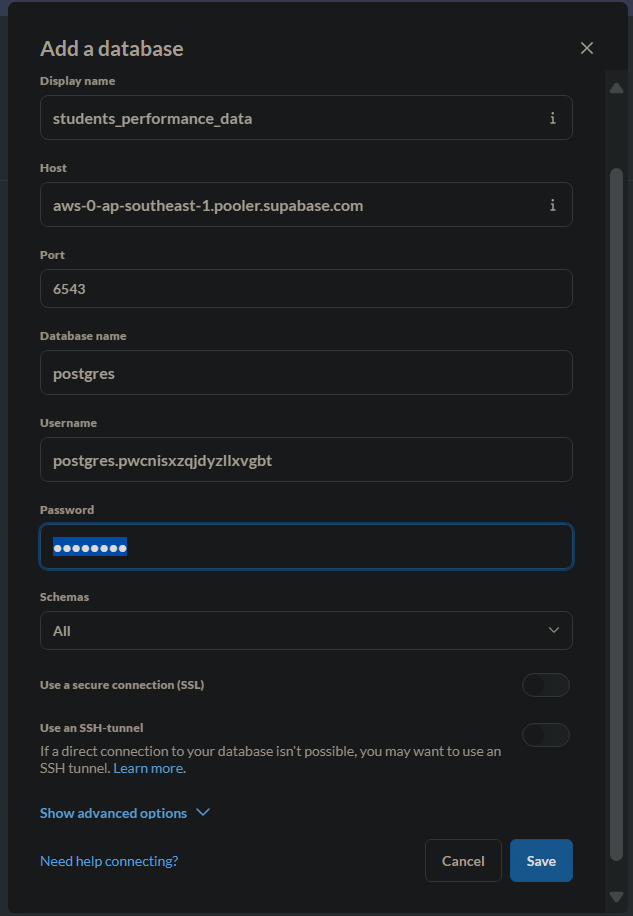

#### Menyesuaikan Data Schema

In [ ]:
df_student_dashboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   MaritalStatus                            4424 non-null   category
 1   ApplicationMode                          4424 non-null   category
 2   ApplicationOrder                         4424 non-null   int64   
 3   Course                                   4424 non-null   category
 4   DaytimeEveningAttendance                 4424 non-null   category
 5   PreviousQualification                    4424 non-null   category
 6   PreviousQualificationGrade               4424 non-null   int64   
 7   Nationality                              4424 non-null   category
 8   MothersQualification                     4424 non-null   category
 9   FathersQualification                     4424 non-null   category
 10  MothersOccupation                   

| Kolom                                   | Tipe Data Metabase | Keterangan                                 |
| --------------------------------------- | ------------------ | ------------------------------------------ |
| MaritalStatus                           | Category           | Status pernikahan                          |
| ApplicationMode                         | Category           | Jalur pendaftaran                          |
| ApplicationOrder                        | Quantity           | Urutan pilihan                             |
| Course                                  | Category           | Program studi                              |
| DaytimeEveningAttendance                | Category           | Siang/Malam                                |
| PreviousQualification                   | Category           | Jenjang pendidikan terakhir                |
| PreviousQualificationGrade              | Score              | Nilai masuk sebelumnya                     |
| Nationality                             | Category           | Negara                                     |
| MothersQualification                    | Category           | Pendidikan ibu                             |
| FathersQualification                    | Category           | Pendidikan ayah                            |
| MothersOccupation                       | Category           | Pekerjaan ibu                              |
| FathersOccupation                       | Category           | Pekerjaan ayah                             |
| AdmissionGrade                          | Score              | Nilai ujian masuk                          |
| Displaced                               | Category           | Terdampak (Ya/Tidak)                       |
| EducationalSpecialNeeds                 | Category           | Berkebutuhan khusus (Ya/Tidak)             |
| Debtor                                  | Category           | Tunggakan (Ya/Tidak)                       |
| TuitionFeesUpToDate                     | Category           | Status pembayaran                          |
| Gender                                  | Category           | Laki-laki/Perempuan                        |
| ScholarshipHolder                       | Category           | Penerima beasiswa (Ya/Tidak)               |
| AgeAtEnrollment                         | Quantity           | Usia saat daftar                           |
| International                           | Category           | Mahasiswa internasional (Ya/Tidak)         |
| CurricularUnits1stSemCredited           | Quantity           | SKS diakui semester 1                      |
| CurricularUnits1stSemEnrolled           | Quantity           | SKS diambil semester 1                     |
| CurricularUnits1stSemEvaluations        | Quantity           | Evaluasi semester 1                        |
| CurricularUnits1stSemApproved           | Quantity           | Lulus semester 1                           |
| CurricularUnits1stSemGrade              | Score              | Nilai rata-rata semester 1                 |
| CurricularUnits1stSemWithoutEvaluations | Quantity           | SKS tanpa evaluasi semester 1              |
| CurricularUnits2ndSemCredited           | Quantity           | SKS diakui semester 2                      |
| CurricularUnits2ndSemEnrolled           | Quantity           | SKS diambil semester 2                     |
| CurricularUnits2ndSemEvaluations        | Quantity           | Evaluasi semester 2                        |
| CurricularUnits2ndSemApproved           | Quantity           | Lulus semester 2                           |
| CurricularUnits2ndSemGrade              | Score              | Nilai rata-rata semester 2                 |
| CurricularUnits2ndSemWithoutEvaluations | Quantity           | SKS tanpa evaluasi semester 2              |
| UnemploymentRate                        | Percentage         | Tingkat pengangguran                       |
| InflationRate                           | Percentage         | Inflasi                                    |
| GDP                                     | Percentage         | Pertumbuhan ekonomi (GDP)                  |
| Status                                  | Category           | Target prediksi: Drop Out / Tidak Drop Out |


### 4.4. Data Preparation Untuk Prototype Sistem Machine Learning

In [10]:
df_student_ml = df_student_cleaned.copy()

In [11]:
df_student_ml['Status'].value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

#### Filter Hanya 2 Kelas Status - Dropout & Graduate (Tidak Dropout)

In [12]:
# Hapus baris dengan status 'Enrolled' (kelas ke-3 yang tidak digunakan)
df_student_ml = df_student_ml[df_student_ml['Status'] != 'Enrolled']

print(np.unique(df_student_ml['Status']))

['Dropout' 'Graduate']


In [13]:
df_student_ml['Status'].value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled       0
Name: count, dtype: int64

⚠️ Penyebab Utama
Label 'Enrolled' masih terdeteksi karena kolom Status bertipe data kategori (category dtype) dan nilai 'Enrolled' masih tersimpan di kategori, meskipun barisnya sudah dihapus.

Cek sendiri dengan:

In [14]:
print(df_student_ml['Status'].dtype)

category


Kalau hasilnya category, maka itulah alasannya.

✅ Solusi: Hapus kategori yang tidak lagi digunakan
Gunakan .cat.remove_unused_categories() untuk membersihkan nilai 'Enrolled' dari metadata kolom kategori:

In [15]:
df_student_ml['Status'] = df_student_ml['Status'].cat.remove_unused_categories()

df_student_ml['Status'].value_counts()

Status
Graduate    2209
Dropout     1421
Name: count, dtype: int64

💡 Kenapa Ini Terjadi?
Pandas category menyimpan kategori terdaftar bahkan jika tidak ada lagi baris dengan nilai itu. Jadi value_counts() akan tetap menampilkannya sebagai 0 kecuali kamu buang manual dengan .cat.remove_unused_categories().

🔁 Alternatif Solusi Lain (pakai string biasa):
Kalau kamu tidak butuh category dtype, ubah saja jadi string/objek biasa:

```python
df_student_ml['Status'] = df_student_ml['Status'].astype(str)
```
Tapi jika kamu ingin efisiensi dan label encoding, tetap gunakan kategori, asal bersihkan dengan benar.

#### Menyimpan Data Hasil Preprocessing

In [ ]:
df_student_ml.to_csv("data/data_student_preprocessed.csv", index=False)

In [ ]:
df_student_ml.columns

Index(['MaritalStatus', 'ApplicationMode', 'ApplicationOrder', 'Course',
       'DaytimeEveningAttendance', 'PreviousQualification',
       'Previous_qualification_grade', 'Nationality', 'MothersQualification',
       'FathersQualification', 'MothersOccupation', 'FathersOccupation',
       'AdmissionGrade', 'Displaced', 'EducationalSpecialNeeds', 'Debtor',
       'TuitionFeesUpToDate', 'Gender', 'ScholarshipHolder', 'AgeAtEnrollment',
       'International', 'CurricularUnits1stSemCredited',
       'CurricularUnits1stSemEnrolled', 'CurricularUnits1stSemEvaluations',
       'CurricularUnits1stSemApproved', 'CurricularUnits1stSemGrade',
       'CurricularUnits1stSemWithoutEvaluations',
       'CurricularUnits2ndSemCredited', 'CurricularUnits2ndSemEnrolled',
       'CurricularUnits2ndSemEvaluations', 'CurricularUnits2ndSemApproved',
       'CurricularUnits2ndSemGrade', 'CurricularUnits2ndSemWithoutEvaluations',
       'UnemploymentRate', 'InflationRate', 'GDP', 'Status'],
      dtype='obje

#### Encoding Fitur Kategorikal

In [16]:
df_student_encoded = df_student_ml.copy()

In [17]:
df_student_encoded.select_dtypes(include=['category']).columns

Index(['MaritalStatus', 'ApplicationMode', 'Course',
       'DaytimeEveningAttendance', 'PreviousQualification', 'Nationality',
       'MothersQualification', 'FathersQualification', 'MothersOccupation',
       'FathersOccupation', 'Displaced', 'EducationalSpecialNeeds', 'Debtor',
       'TuitionFeesUpToDate', 'Gender', 'ScholarshipHolder', 'International',
       'Status'],
      dtype='object')

In [18]:
# List kolom kategorikal yang perlu di-encode
categorical_columns = ['MaritalStatus', 'ApplicationMode', 'Course', 'DaytimeEveningAttendance', 'PreviousQualification', 'Nationality',
                       'MothersQualification', 'FathersQualification', 'MothersOccupation', 'FathersOccupation', 'Displaced',
                       'EducationalSpecialNeeds', 'Debtor', 'TuitionFeesUpToDate', 'Gender', 'ScholarshipHolder', 'International', 'Status']
encoders = {}

for col in categorical_columns:
    # Buat instance LabelEncoder
    le = LabelEncoder()
    # Encode kolom kategorikal
    df_student_encoded[col] = le.fit_transform(df_student_encoded[col])
    encoders[col] = le

joblib.dump(encoders, 'models/label_encoders.pkl')  # ✅ simpan sebagai dict

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
print(df_student_encoded[['MaritalStatus', 'ApplicationMode', 'Course', 'DaytimeEveningAttendance', 'PreviousQualification', 'Nationality',
                       'MothersQualification', 'FathersQualification', 'MothersOccupation', 'FathersOccupation', 'Displaced',
                       'EducationalSpecialNeeds', 'Debtor', 'TuitionFeesUpToDate', 'Gender', 'ScholarshipHolder', 'International', 'Status']])

      MaritalStatus  ApplicationMode  Course  DaytimeEveningAttendance  \
0                 0                7       1                         1   
1                 0                5      10                         1   
2                 0                0       4                         1   
3                 0                7      14                         1   
4                 1               11       2                         0   
...             ...              ...     ...                       ...   
4419              0                0      14                         1   
4420              0                0      14                         1   
4421              0                0      11                         1   
4422              0                0       8                         1   
4423              0                4      14                         1   

      PreviousQualification  Nationality  MothersQualification  \
0                         0            0     

In [19]:
df_student_encoded['Status'].value_counts()

Status
1    2209
0    1421
Name: count, dtype: int64

#### Menentukan Fitur dan Target

In [ ]:
df_student_encoded.columns

Index(['MaritalStatus', 'ApplicationMode', 'ApplicationOrder', 'Course',
       'DaytimeEveningAttendance', 'PreviousQualification',
       'Previous_qualification_grade', 'Nationality', 'MothersQualification',
       'FathersQualification', 'MothersOccupation', 'FathersOccupation',
       'AdmissionGrade', 'Displaced', 'EducationalSpecialNeeds', 'Debtor',
       'TuitionFeesUpToDate', 'Gender', 'ScholarshipHolder', 'AgeAtEnrollment',
       'International', 'CurricularUnits1stSemCredited',
       'CurricularUnits1stSemEnrolled', 'CurricularUnits1stSemEvaluations',
       'CurricularUnits1stSemApproved', 'CurricularUnits1stSemGrade',
       'CurricularUnits1stSemWithoutEvaluations',
       'CurricularUnits2ndSemCredited', 'CurricularUnits2ndSemEnrolled',
       'CurricularUnits2ndSemEvaluations', 'CurricularUnits2ndSemApproved',
       'CurricularUnits2ndSemGrade', 'CurricularUnits2ndSemWithoutEvaluations',
       'UnemploymentRate', 'InflationRate', 'GDP', 'Status'],
      dtype='obje

In [20]:
selected_features = ['MothersQualification', 'FathersQualification',
                     'MothersOccupation', 'FathersOccupation',
                     'CurricularUnits1stSemCredited', 'CurricularUnits1stSemEnrolled',
                     'CurricularUnits1stSemEvaluations', 'CurricularUnits1stSemApproved',
                     'CurricularUnits1stSemGrade', 'CurricularUnits2ndSemCredited',
                     'CurricularUnits2ndSemEnrolled', 'CurricularUnits2ndSemEvaluations',
                     'CurricularUnits2ndSemApproved', 'CurricularUnits2ndSemGrade']

# Gunakan hanya fitur yang dipilih
X = df_student_encoded[selected_features]

# Pisahkan target
y = df_student_encoded['Status']

#### Splitting Data

In [21]:
# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print("Training set shape:")
print(f"X_train={X_train.shape}")
print(f"y_train={y_train.shape} \n")
print("Test set shape:")
print(f"X_train={X_test.shape}")
print(f"y_train={y_test.shape}")

Training set shape:
X_train=(2722, 14)
y_train=(2722,) 

Test set shape:
X_train=(908, 14)
y_train=(908,)


In [22]:
print(f'Jumlah total data:: {len(X)}')
print(f'Jumlah data latih: {len(X_train)}')
print(f'Jumlah data test: {len(X_test)}')

Jumlah total data:: 3630
Jumlah data latih: 2722
Jumlah data test: 908


In [23]:
print(y_train.value_counts())

Status
1    1656
0    1066
Name: count, dtype: int64


In [24]:
print(np.unique(y_train))
print(y_train.shape, X_train.shape)

[0 1]
(2722,) (2722, 14)


#### Normalisasi Data

In [25]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **5. Model Development**

In [26]:
def evaluate_model(y_true, y_pred, model_name="Model", train_accuracy=None, target_names=None):
    """
    Menampilkan evaluasi lengkap: Confusion Matrix, classification report, dan metrik evaluasi.

    Parameters:
    - y_true: array-like, label sebenarnya
    - y_pred: array-like, label hasil prediksi
    - model_name: str, nama model (default: "Model")
    - train_accuracy: float, akurasi pada data latih (opsional)
    - target_names: list of str, nama label untuk classification report
    """
    # Metode evaluasi
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    print(f"🛑 EVALUASI MODEL {model_name.upper()}")
    print("=" * 60)
    print(f"Accuracy : {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall   : {recall:.2f}")
    print(f"F1 Score : {f1:.2f}\n")

    print(f"🛑 CLASSIFICATION REPORT")
    print("=" * 60)
    print(classification_report(y_true, y_pred, target_names=target_names))
    print("=" * 60)
    if train_accuracy is not None:
        print(f"*{model_name.upper()} - Akurasi pada data latih: {train_accuracy:.4f}")
    print(f"*{model_name.upper()} - Akurasi pada data uji: {accuracy:.4f}")
    print("=" * 60)
    print("\n")
    print("Visualisasi:")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(6, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(ax=ax, cmap='Blues', colorbar=True)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.tight_layout()
    plt.show()

### Pemilihan Model Menggunakan LazyClassifier

Pada tahap awal pemodelan, LazyClassifier, sebuah metode otomatis digunakan untuk membandingkan performa beberapa algoritma klasifikasi secara cepat dan efisien. Dengan memasukkan data training dan testing, LazyClassifier mengevaluasi banyak model sekaligus berdasarkan metrik seperti akurasi, balanced accuracy, ROC AUC, dan F1 Score.

In [ ]:
clf = LazyClassifier()
models, predicts = clf.fit(X_train, X_test, y_train, y_test)

print(models.sort_values(by="Accuracy", ascending=False))

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1656, number of negative: 1066
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 292
[LightGBM] [Info] Number of data points in the train set: 2722, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.608376 -> initscore=0.440492
[LightGBM] [Info] Start training from score 0.440492
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.90               0.88     0.88      0.89   
RandomForestClassifier             0.89               0.88     0.88      0.89   
LogisticRegression                 0.89               0.88     0.88      0.89   
ExtraTreesClassifier               0.89    

Hasil evaluasi menunjukkan bahwa `model XGBClassifier memperoleh akurasi tertinggi yaitu 0.90`, diikuti oleh RandomForestClassifier, LogisticRegression, dan ExtraTreesClassifier dengan akurasi mendekati 0.89. Hal ini mengindikasikan `XGBClassifier sebagai kandidat model utama` untuk tahap pengembangan berikutnya.

### Modeling & Evaluation

In [27]:
from xgboost import XGBClassifier

# Latih model dengan data tanpa SMOTE
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

🛑 EVALUASI MODEL XGBCLASSIFIER
Accuracy : 0.90
Precision: 0.90
Recall   : 0.90
F1 Score : 0.89

🛑 CLASSIFICATION REPORT
              precision    recall  f1-score   support

     Dropout       0.90      0.82      0.86       355
    Graduate       0.89      0.94      0.92       553

    accuracy                           0.90       908
   macro avg       0.90      0.88      0.89       908
weighted avg       0.90      0.90      0.89       908

*XGBCLASSIFIER - Akurasi pada data latih: 0.9835
*XGBCLASSIFIER - Akurasi pada data uji: 0.8954


Visualisasi:


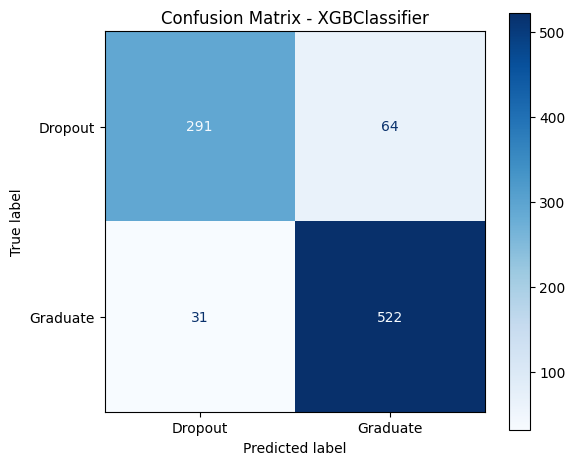

In [28]:
y_pred_xgb = model_xgb.predict(X_test)

evaluate_model(
    y_true=y_test,
    y_pred=y_pred_xgb,
    model_name="XGBClassifier",
    train_accuracy=model_xgb.score(X_train, y_train),
    target_names=['Dropout', 'Graduate']
)

Setelah memilih XGBClassifier sebagai model utama, kami melatih dan mengevaluasinya lebih mendalam. Hasil evaluasi pada data testing antara lain akurasi mencapai 90%, dengan precision dan recall yang seimbang di angka sekitar 0.90.

Model menunjukkan performa yang kuat dan seimbang dalam mengklasifikasikan mahasiswa yang dropout maupun yang lulus (graduate).

- Dari `322` mahasiswa yang benar-benar dropout, model berhasil mendeteksi 291 di antaranya (recall tinggi terhadap kelas dropout).
- Sementara dari `586` mahasiswa yang lulus, model berhasil mengklasifikasikan 522 dengan benar.

Hal ini menunjukkan bahwa model memiliki kemampuan deteksi yang baik terhadap kasus dropout, yang sangat penting untuk intervensi dini oleh pihak institusi.

### Konversi Model

In [ ]:
os.makedirs("models", exist_ok=True)

# Simpan scaler
joblib.dump(scaler, 'models/scaler.pkl')

# Simpan model
with open('models/model_xgboost.pkl', 'wb') as f:
    pickle.dump(model_xgb, f)
joblib.dump(model_xgb, 'models/model_xgboost.joblib')

['models/model_xgboost.joblib']

In [ ]:
!pip freeze > requirements.txt

## **6. Rekomendasi Action Items**

Berikut beberapa rekomendasi strategis berdasarkan hasil analisis dan prediksi:

1. Implementasi Sistem Deteksi Dini Dropout

   - Gunakan model prediktif yang telah dikembangkan untuk mengidentifikasi mahasiswa berisiko tinggi sejak awal perkuliahan.
   - Integrasikan sistem ini ke dalam dashboard akademik atau sistem informasi mahasiswa.

2. Pendampingan Akademik untuk Mahasiswa Berisiko

   - Prioritaskan mahasiswa dengan capaian akademik rendah di semester pertama untuk mendapatkan pendampingan intensif.
   - Sediakan program remedial dan bimbingan studi secara berkala.

3. Penguatan Dukungan Finansial

   - Evaluasi dan perluas jangkauan beasiswa untuk kelompok mahasiswa berisiko tinggi dropout karena faktor ekonomi.
   - Buat mekanisme monitoring bagi mahasiswa dengan tunggakan pembayaran kuliah.

4. Monitoring Performa Berdasarkan Program Studi

   - Lakukan evaluasi berkala pada program studi dengan tingkat dropout tinggi.
   - Koordinasikan antara pihak akademik dan manajemen program studi untuk meninjau kurikulum, beban studi, dan metode pengajaran.

5. Optimalkan Dashboard untuk Pengambilan Keputusan

   - Gunakan dashboard Metabase sebagai alat monitoring rutin oleh dosen wali, manajer akademik, dan bagian kemahasiswaan.
   - Latih pengguna dalam membaca insight dan mengimplementasikan strategi berbasis visualisasi data.

6. Intervensi Sosial dan Kesejahteraan Mahasiswa

   - Sediakan layanan konseling, sesi motivasi, serta forum komunikasi dua arah dengan mahasiswa.
   - Dorong kegiatan sosial dan komunitas yang dapat meningkatkan keterlibatan mahasiswa di lingkungan kampus.

7. Evaluasi Semester Awal Sebagai Indikator Kunci

   - Fokuskan perhatian pada performa mahasiswa dalam dua semester pertama sebagai indikator dropout paling kuat.
   - Terapkan sistem pelaporan dini bagi mahasiswa yang tidak memenuhi syarat akademik minimum.

Dengan menerapkan strategi-strategi ini, Jaya Jaya Institut dapat secara signifikan menekan angka dropout, meningkatkan keberhasilan studi, dan menciptakan lingkungan akademik yang lebih inklusif, adaptif, dan berkelanjutan.

## **7. Keterkaitan dengan Business Understanding**

**`Problem Statements:`**

- **Apa saja faktor utama yang berkontribusi terhadap keputusan mahasiswa untuk berhenti studi?**

  → Melalui eksplorasi data dan visualisasi interaktif dalam dashboard, proyek ini berhasil mengungkapkan bahwa:
  - Mahasiswa yang memiliki jumlah matkul lulus rendah di semester 1 dan 2 lebih rentan mengalami dropout.
  - Faktor non-akademik seperti status pembayaran uang kuliah, kepemilikan beasiswa, dan kondisi sosial (seperti "displaced student") juga berkontribusi terhadap risiko dropout.
  - Jurusan tertentu memiliki tingkat dropout yang lebih tinggi, menandakan kemungkinan beban studi atau dukungan akademik yang tidak merata.

- **Bagaimana karakteristik sosial, ekonomi, akademik, dan demografis memengaruhi kemungkinan mahasiswa melakukan dropout?**

  → Dashboard dan analisis korelasi fitur mengungkapkan bahwa:
  - Mahasiswa tanpa beasiswa atau yang belum melunasi uang kuliah menunjukkan dropout rate lebih tinggi.
  - Faktor demografis seperti usia masuk kuliah dan jenis kelamin memiliki distribusi yang relatif seimbang, namun tetap perlu dipantau.
  - Performa akademik seperti nilai semester dan jumlah mata kuliah lulus merupakan indikator paling kuat dalam memprediksi dropout.

- **Strategi pemantauan apa yang dapat digunakan untuk membantu pihak institusi dalam mengidentifikasi tren dropout secara visual dan informatif?**

  → Dashboard interaktif yang dibangun menggunakan Metabase memungkinkan:
  - Pemantauan visual terhadap distribusi status mahasiswa (Graduate, Dropout, Enrolled),
  - Perbandingan performa akademik per jurusan,
  - Pemahaman hubungan antara faktor keuangan dan risiko dropout,
  - Penyajian metrik rata-rata seperti nilai semester, usia saat masuk, dan distribusi gender per status.
  
  Visualisasi ini membantu tim akademik mengambil keputusan berbasis data dan tidak hanya bergantung pada intuisi.

- **Bagaimana model machine learning dapat digunakan untuk memprediksi risiko dropout mahasiswa secara akurat dan praktis?**

  → Model prediktif berbasis algoritma XGBoost yang dikembangkan berhasil:
  - Menghasilkan akurasi tinggi (90%),
  - Mendeteksi mahasiswa berisiko dropout dengan recall dan precision seimbang,
  - Diimplementasikan dalam bentuk prototype Streamlit yang siap digunakan langsung oleh pihak institusi untuk intervensi dini.

**`Goals:`**

- ✅ Mampu mengidentifikasi faktor-faktor utama yang berkontribusi terhadap risiko dropout mahasiswa di Jaya Jaya Institut, seperti performa akademik di semester awal, status pembayaran kuliah, dan status sosial-ekonomi mahasiswa.
- ✅ Berhasil mengembangkan dashboard interaktif menggunakan Metabase yang menampilkan tren dan indikator performa mahasiswa secara visual dan informatif, mencakup distribusi status mahasiswa, performa per program studi, serta faktor keuangan dan beasiswa.
- ✅ Berhasil mengembangkan model machine learning berbasis algoritma XGBoost yang dapat memprediksi kemungkinan seorang mahasiswa mengalami dropout sejak dini dengan akurasi tinggi, serta dapat digunakan dalam sistem deteksi dini (early warning).
- ✅ Memberikan rekomendasi tindakan strategis (actionable insights) kepada pihak institusi berdasarkan hasil analisis dan prediksi, seperti pendampingan akademik, dukungan finansial, dan monitoring mahasiswa berisiko tinggi secara berkelanjutan.


**`Solution Statements:`**

- **Dashboard Dropout Interaktif dikembangkan menggunakan visualisasi data yang menampilkan distribusi status mahasiswa, performa akademik, status pembayaran kuliah, kepemilikan beasiswa, dan faktor sosial-demografis lainnya.**

  → Hasil analisis visual memberikan gambaran komprehensif kepada pihak akademik dan manajemen institusi mengenai kondisi mahasiswa serta kelompok yang berisiko tinggi mengalami dropout. Dashboard ini mendukung pemantauan tren dan pengambilan keputusan berbasis data.

- **Model Prediktif Dropout dibangun menggunakan algoritma klasifikasi (XGBoost), dengan input dari fitur-fitur penting seperti jumlah mata kuliah yang lulus, nilai semester, status keuangan, serta latar belakang orang tua.**

  → Evaluasi performa model menggunakan metrik akurasi, precision, recall, F1-score, dan confusion matrix menunjukkan bahwa model mampu mengidentifikasi mahasiswa berisiko tinggi secara efektif. Hasil prediksi yang andal ini memungkinkan institusi melakukan intervensi dini secara tepat sasaran terhadap mahasiswa yang membutuhkan dukungan akademik atau finansial.

## **8. Conclusion**

Proyek ini berhasil menjawab tantangan utama yang dihadapi oleh Jaya Jaya Institut dalam menekan angka dropout mahasiswa yang tinggi, melalui pendekatan berbasis data yang menyeluruh dan aplikatif.

1. Pemahaman Mendalam terhadap Penyebab Dropout
  - Analisis data historis menunjukkan bahwa rendahnya performa akademik di semester awal, tunggakan pembayaran kuliah, ketiadaan beasiswa, serta latar belakang sosial-ekonomi tertentu merupakan faktor dominan yang berkontribusi terhadap dropout mahasiswa.
  - Temuan ini memberikan dasar yang kuat bagi manajemen akademik untuk menyusun kebijakan intervensi berbasis data (evidence-based academic policy), seperti pemberian beasiswa tambahan, bimbingan akademik intensif, dan pendampingan sosial.

2. Visualisasi yang Mendorong Insight Akademik
  - Dashboard interaktif yang dikembangkan melalui Metabase memungkinkan tim akademik untuk memantau tren dan distribusi mahasiswa secara real-time berdasarkan status kelulusan, jurusan, kondisi keuangan, hingga capaian akademik.
  - Visualisasi ini memberikan pemahaman intuitif terhadap kelompok mahasiswa yang berisiko tinggi dropout dan membantu institusi dalam mengalokasikan sumber daya secara lebih tepat sasaran.

3. Model Prediktif untuk Intervensi Dini
  - Model machine learning yang dibangun menggunakan XGBoost Classifier menunjukkan akurasi tinggi dalam memprediksi risiko dropout berdasarkan 14 fitur penting, seperti jumlah mata kuliah lulus, nilai semester, dan kondisi sosial-ekonomi.
  - Hal ini memungkinkan pihak institusi untuk tidak hanya memahami masalah secara retrospektif, tetapi juga melakukan intervensi dini (early warning system) terhadap mahasiswa berisiko tinggi sebelum keputusan dropout terjadi.

4. Strategi Tindakan Nyata dan Terukur
  - Berdasarkan hasil analisis, disusun serangkaian rekomendasi strategis seperti: peningkatan dukungan keuangan, pendampingan akademik semester awal, perluasan akses beasiswa, serta integrasi sistem prediksi ke dalam proses monitoring akademik harian.
  - Rekomendasi ini bersifat praktis sekaligus strategis, yang dapat langsung diterapkan oleh bagian kemahasiswaan, dosen wali, dan tim akademik.

Dengan menggabungkan eksplorasi data, dashboard visual interaktif, dan model prediktif berbasis machine learning, proyek ini tidak hanya menjawab pertanyaan bisnis utama dari institusi, tetapi juga menghadirkan solusi konkret yang siap diimplementasikan. Ke depannya, sistem ini dapat dikembangkan lebih lanjut sebagai bagian dari sistem informasi akademik, guna mendukung retensi mahasiswa yang berkelanjutan, serta peningkatan kualitas layanan dan akreditasi institusi secara menyeluruh.